In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import shap

import pickle

import tensorflow.compat.v1 as tf
tf.disable_eager_execution()
tf.logging.set_verbosity(tf.logging.ERROR)

import warnings
warnings.filterwarnings('ignore')

from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder

from aif360.sklearn.preprocessing import Reweighing, ReweighingMeta, FairAdapt, LearnedFairRepresentations
from aif360.sklearn.inprocessing import AdversarialDebiasing, ExponentiatedGradientReduction, GridSearchReduction
from aif360.sklearn.postprocessing import CalibratedEqualizedOdds, RejectOptionClassifier, PostProcessingMeta, RejectOptionClassifierCV
from aif360.sklearn.datasets import fetch_adult
from aif360.sklearn.metrics import disparate_impact_ratio, average_odds_error, generalized_fpr
from aif360.sklearn.metrics import generalized_fnr, difference

2023-03-01 16:30:56.570401: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-01 16:30:56.757609: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-01 16:30:59.424918: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-01 16:30:59.425045: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] 

# Importance: Public Coverage

In [2]:
def dothings(X_df, model, name):
    
    def f(df):
        return model.predict(df)
    
    explainer = shap.Explainer(f, X_df)
    shap_values = explainer(X_df.sample(n=500))
    
    clist = list(X_df.columns)
    features = {}
    for i in range(len(clist)):
        fname = clist[i]
        item = fname.split('_')[0]
        if item not in features:
            features[item]=[]
        features[item].append(i)
    newshap = {}
    for k in features:
        nshap = []
        for x in shap_values.values:
            val = 0
            for i in features[k]:
                val+= x[i]
            nshap.append(val)
        newshap[k] = nshap
    new_shap_values = list(zip(*newshap.values()))
    shap_values.values = np.array(new_shap_values)
    shap_values.feature_names = list(features.keys())
    
    f = open('SavedShap/'+name+'.pkl','wb')
    pickle.dump(shap_values,f)
    f.close()
    
    shap.plots.bar(shap_values,max_display=18)
    
    
def dothings2(X_df, model, name):
    
    def f(df):
        df = df.set_index(['SEX_Male'], drop = False)
        return model.predict(df)
    
    explainer = shap.Explainer(f, X_df)
    shap_values = explainer(X_df.sample(n=500))
    
    clist = list(X_df.columns)
    features = {}
    for i in range(len(clist)):
        fname = clist[i]
        item = fname.split('_')[0]
        if item not in features:
            features[item]=[]
        features[item].append(i)
    newshap = {}
    for k in features:
        nshap = []
        for x in shap_values.values:
            val = 0
            for i in features[k]:
                val+= x[i]
            nshap.append(val)
        newshap[k] = nshap
    new_shap_values = list(zip(*newshap.values()))
    shap_values.values = np.array(new_shap_values)
    shap_values.feature_names = list(features.keys())
    
    f = open('SavedShap/'+name+'.pkl','wb')
    pickle.dump(shap_values,f)
    f.close()
    
    shap.plots.bar(shap_values,max_display=18)
    
    
def dothings3(X_df, model, name):
    
    def f(df):
        df = df.set_index(['sex_Male'], drop = False)
        return model.predict(df)
    
    explainer = shap.Explainer(f, X_df)
    shap_values = explainer(X_df.sample(n=500))
    
    clist = list(X_df.columns)
    features = {}
    for i in range(len(clist)):
        fname = clist[i]
        item = fname.split('_')[0]
        if item not in features:
            features[item]=[]
        features[item].append(i)
    newshap = {}
    for k in features:
        nshap = []
        for x in shap_values.values:
            val = 0
            for i in features[k]:
                val+= x[i]
            nshap.append(val)
        newshap[k] = nshap
    new_shap_values = list(zip(*newshap.values()))
    shap_values.values = np.array(new_shap_values)
    shap_values.feature_names = list(features.keys())
    
    f = open('SavedShap/'+name+'.pkl','wb')
    pickle.dump(shap_values,f)
    f.close()
    
    shap.plots.bar(shap_values,max_display=18)

Permutation explainer: 501it [00:21, 15.68it/s]                                 


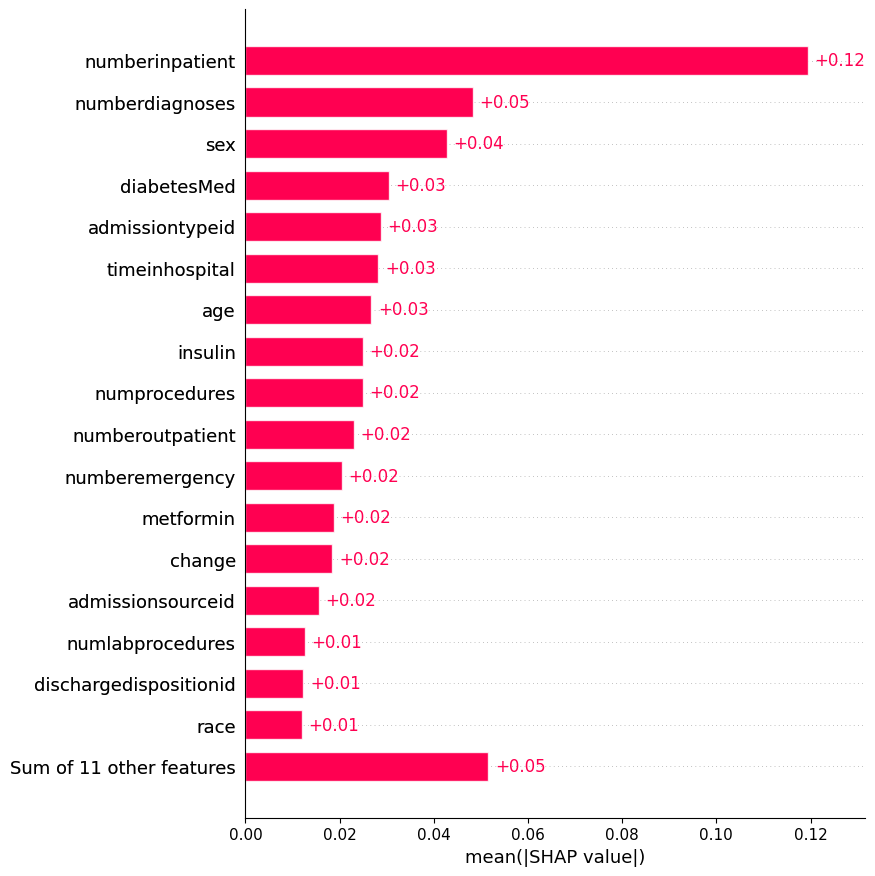

Permutation explainer: 501it [06:23,  1.27it/s]                                 


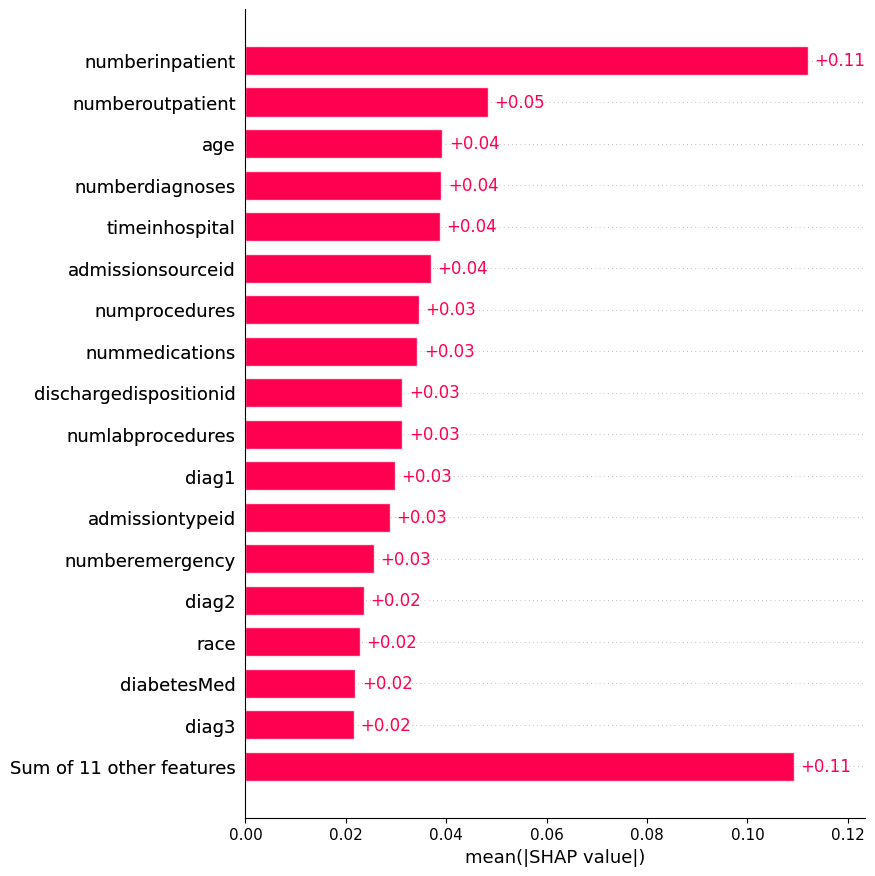

Permutation explainer: 501it [00:33,  9.94it/s]                                 


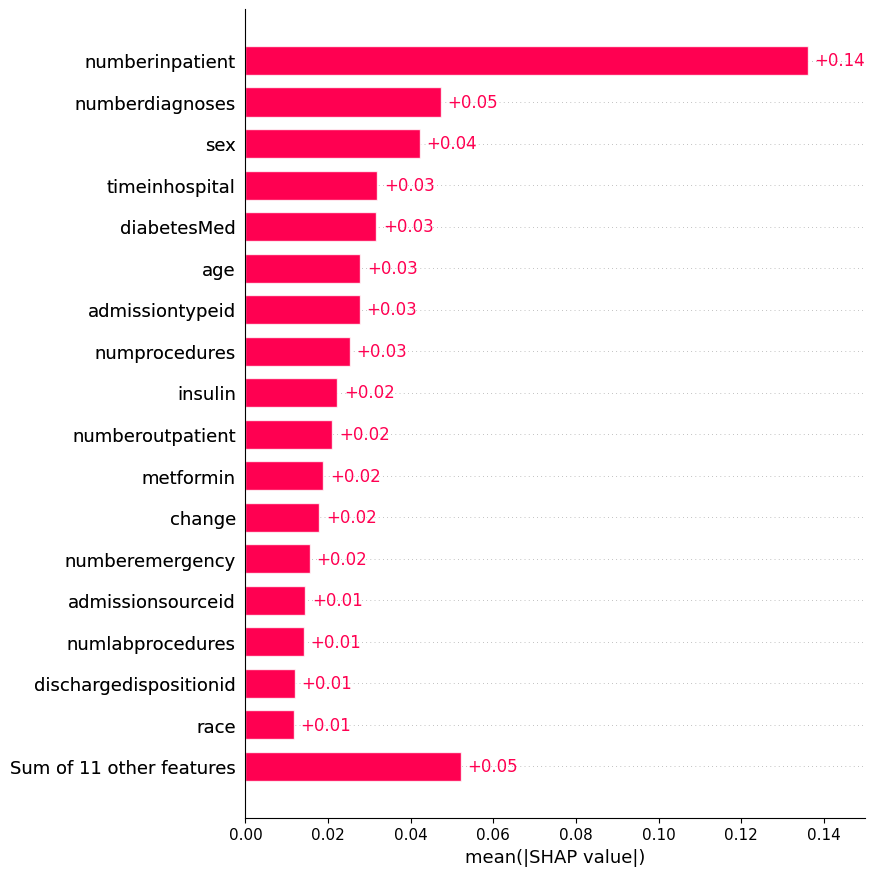

Permutation explainer: 501it [00:22, 12.76it/s]                                 


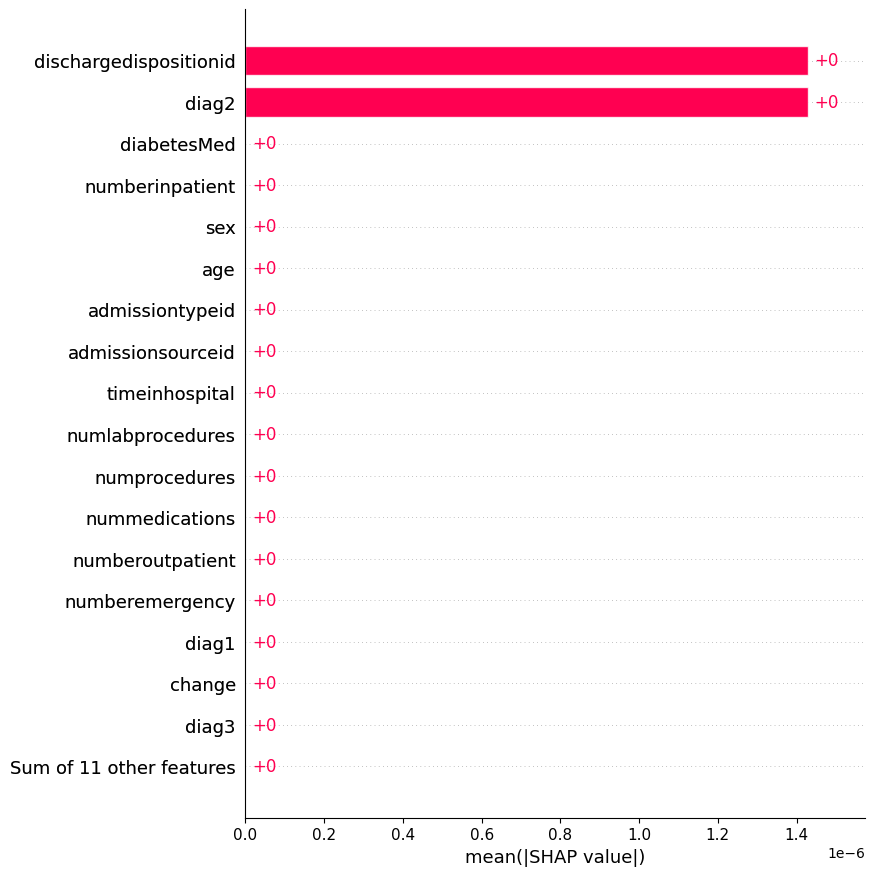

2023-03-01 16:39:21.107031: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-01 16:39:25.253210: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 46192 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:b1:00.0, compute capability: 8.6
2023-03-01 16:39:25.253851: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 46192 MB memory:  -> device: 1, name: NVIDIA RTX A6000, pci bus id: 0000:d9:00.0, compute capability: 8.6
2023-03-01 16:39:25.718245: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:357] MLIR V1 optimization pass is not e

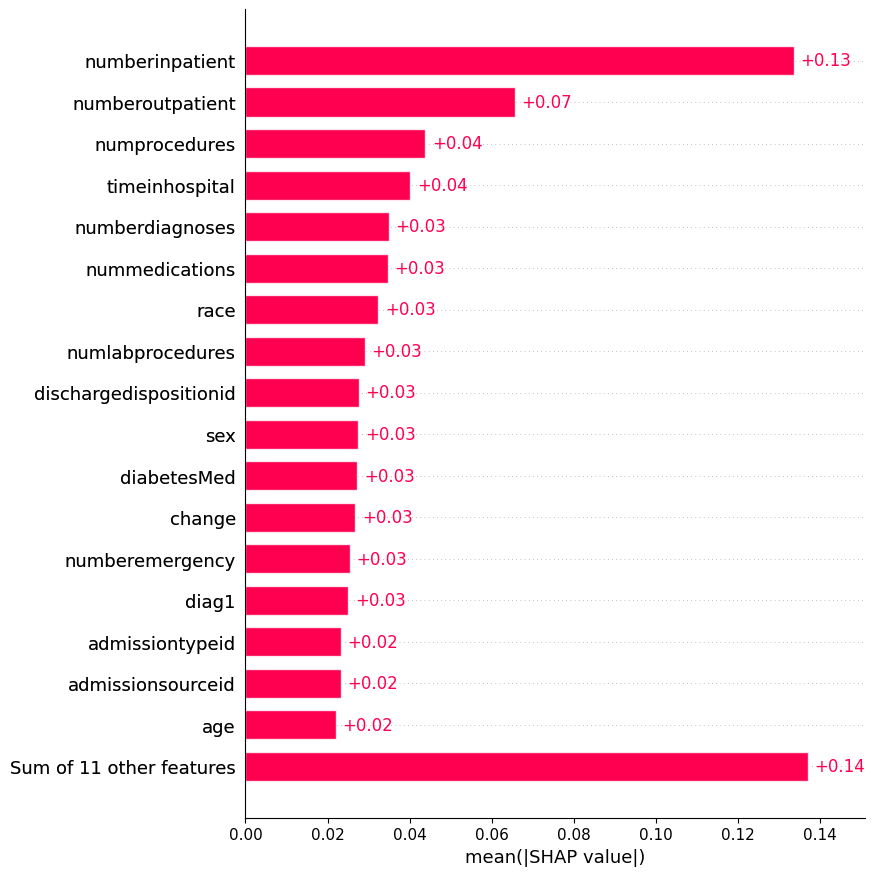

Permutation explainer: 501it [01:00,  6.55it/s]                                 


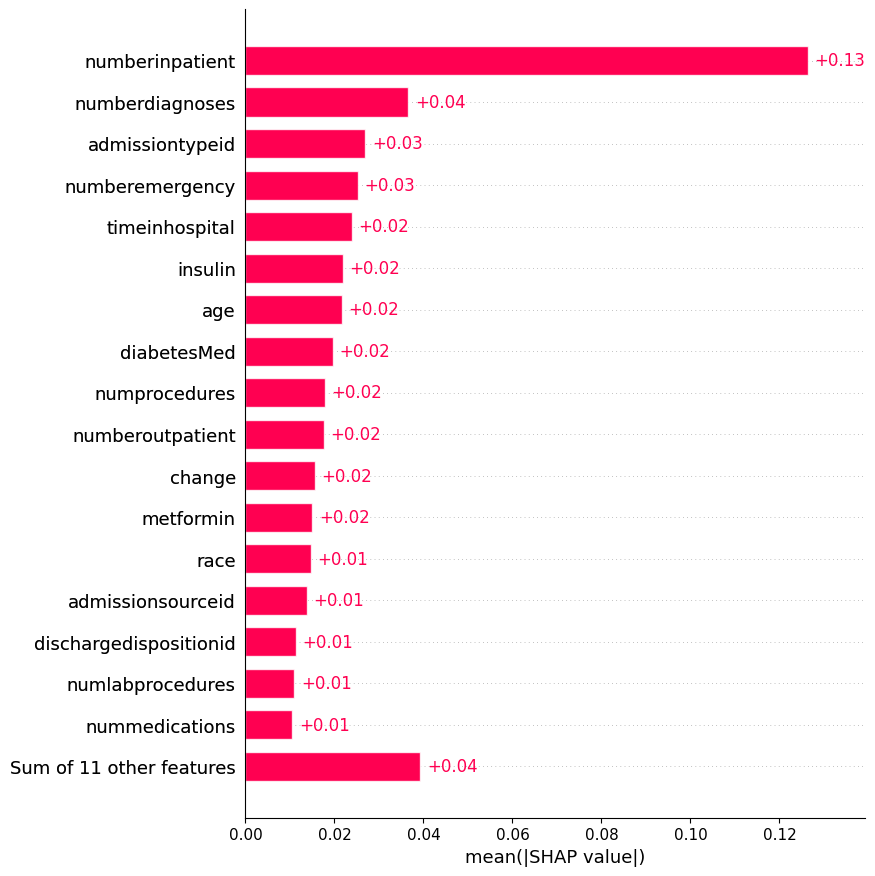

Permutation explainer: 501it [00:24, 13.29it/s]                                 


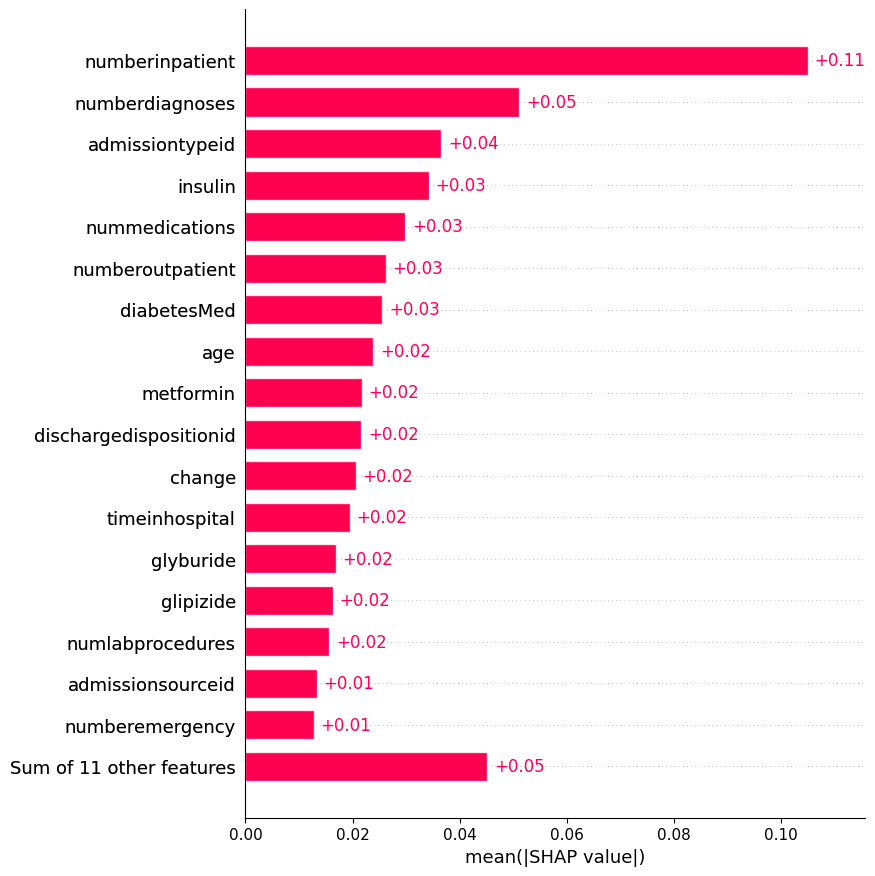

Permutation explainer: 501it [04:03,  1.99it/s]                                 


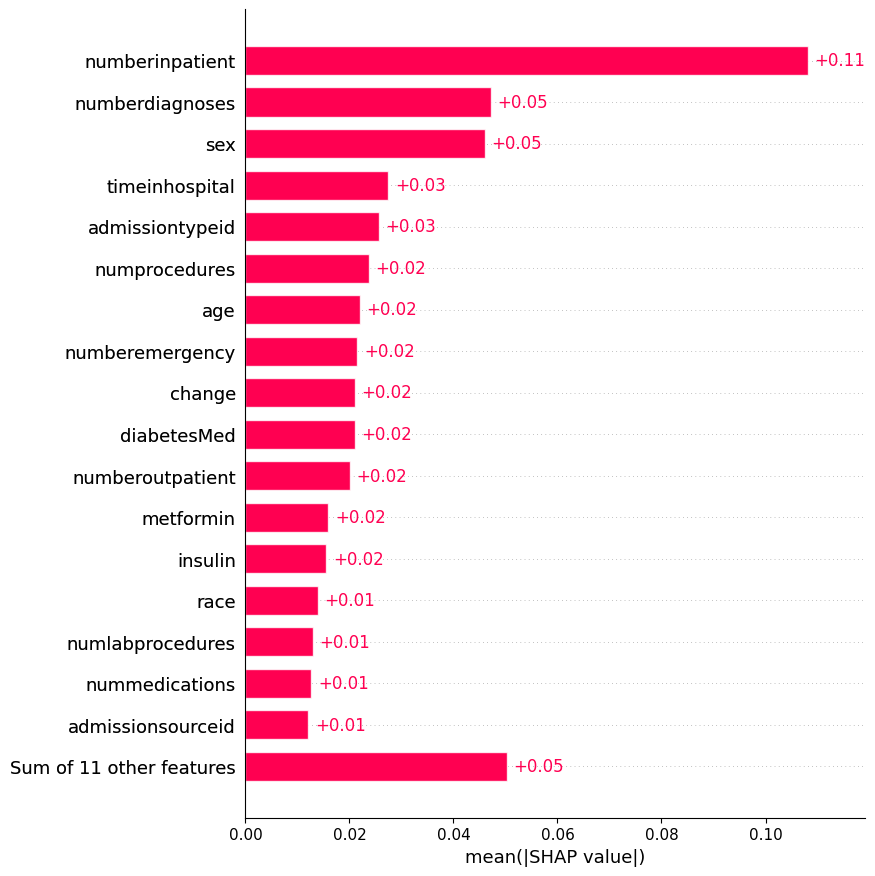

Permutation explainer: 501it [00:51,  7.69it/s]                                 


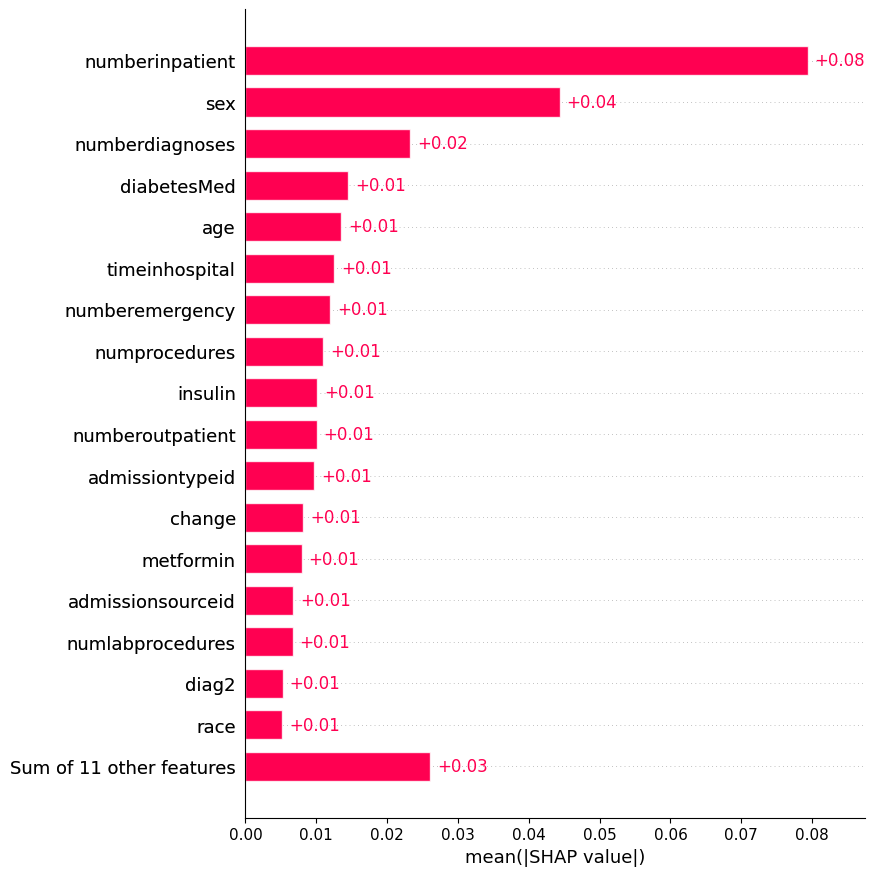

Permutation explainer: 501it [00:15, 11.71it/s]                                 


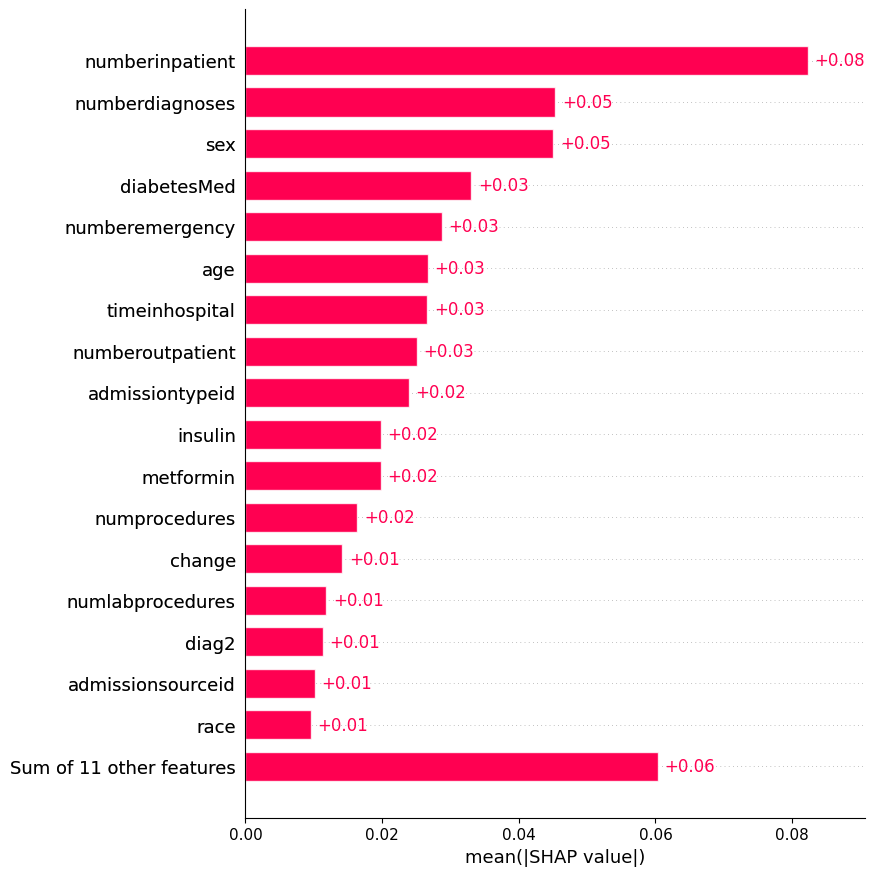

Permutation explainer: 501it [06:25,  1.26it/s]                                 


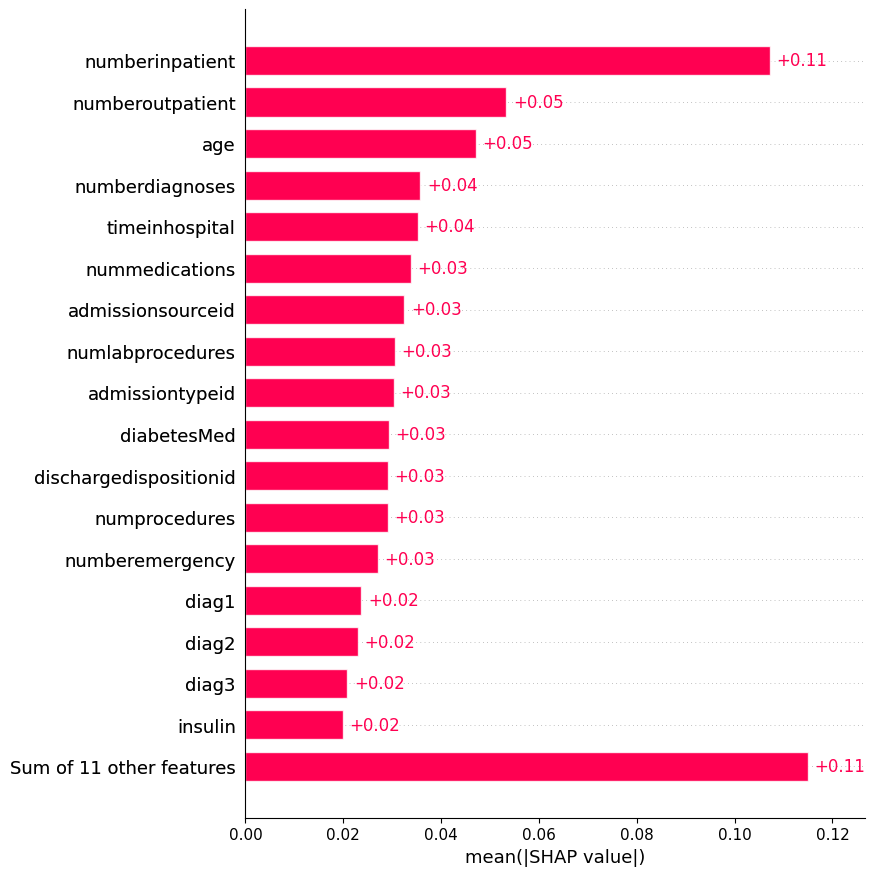

Permutation explainer: 501it [00:20, 11.69it/s]                                 


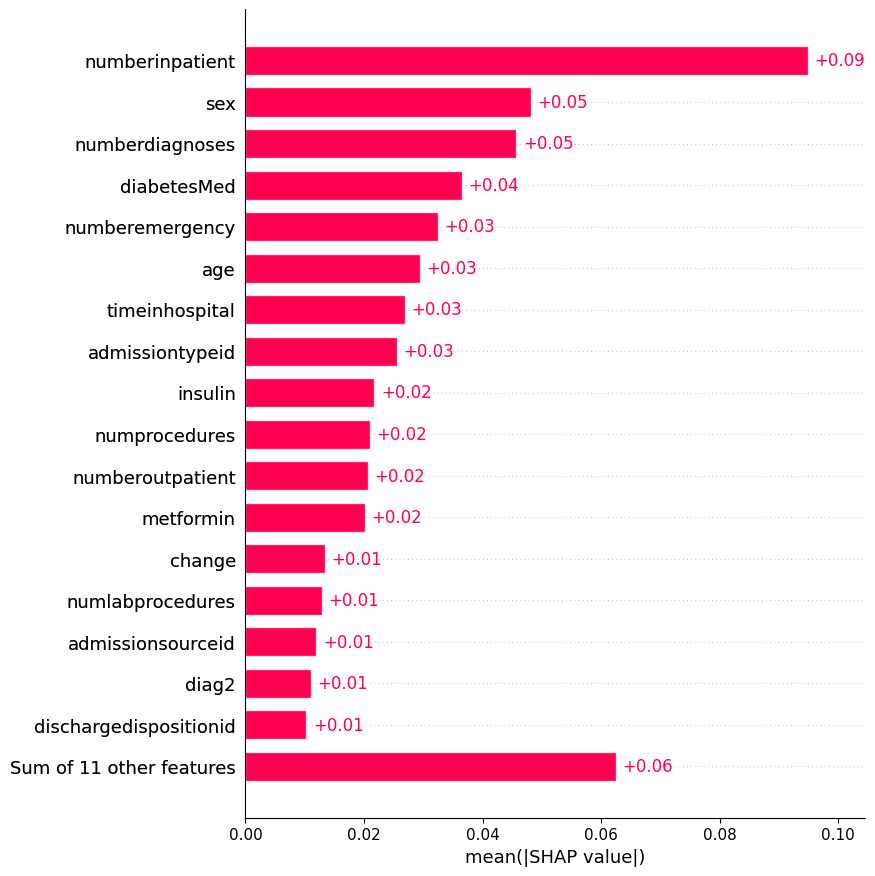

Permutation explainer: 501it [00:13,  9.78it/s]                                 


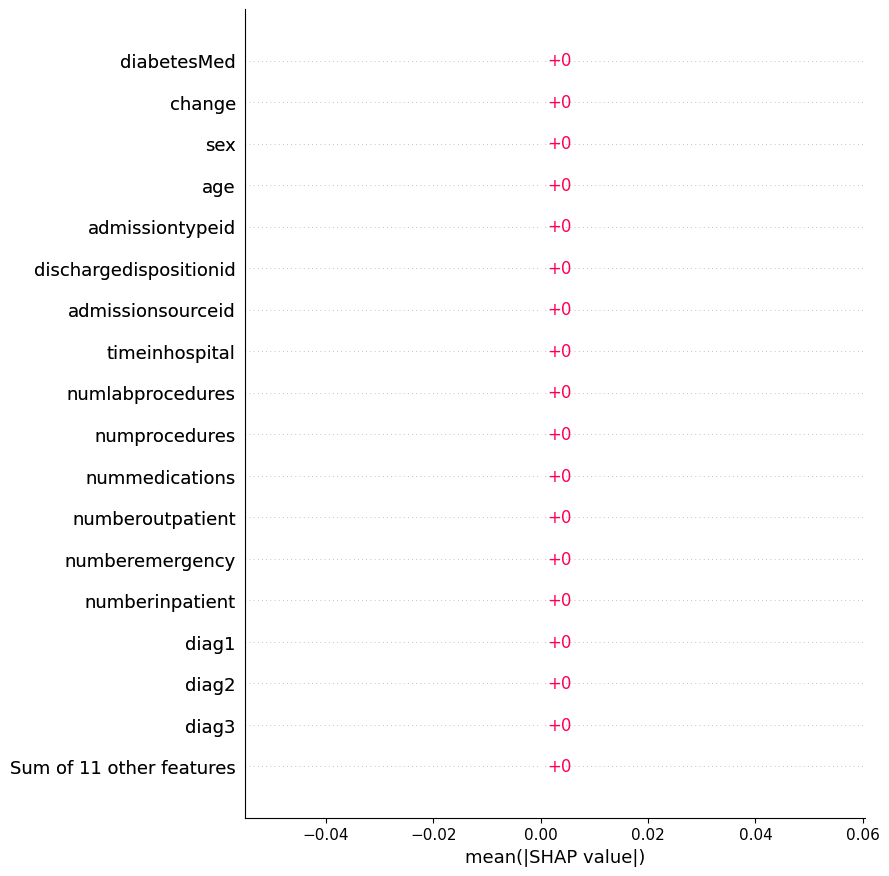

2023-03-01 17:02:12.944042: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 46192 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:b1:00.0, compute capability: 8.6
2023-03-01 17:02:12.944279: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 46192 MB memory:  -> device: 1, name: NVIDIA RTX A6000, pci bus id: 0000:d9:00.0, compute capability: 8.6
Permutation explainer: 501it [01:58,  3.89it/s]                                 


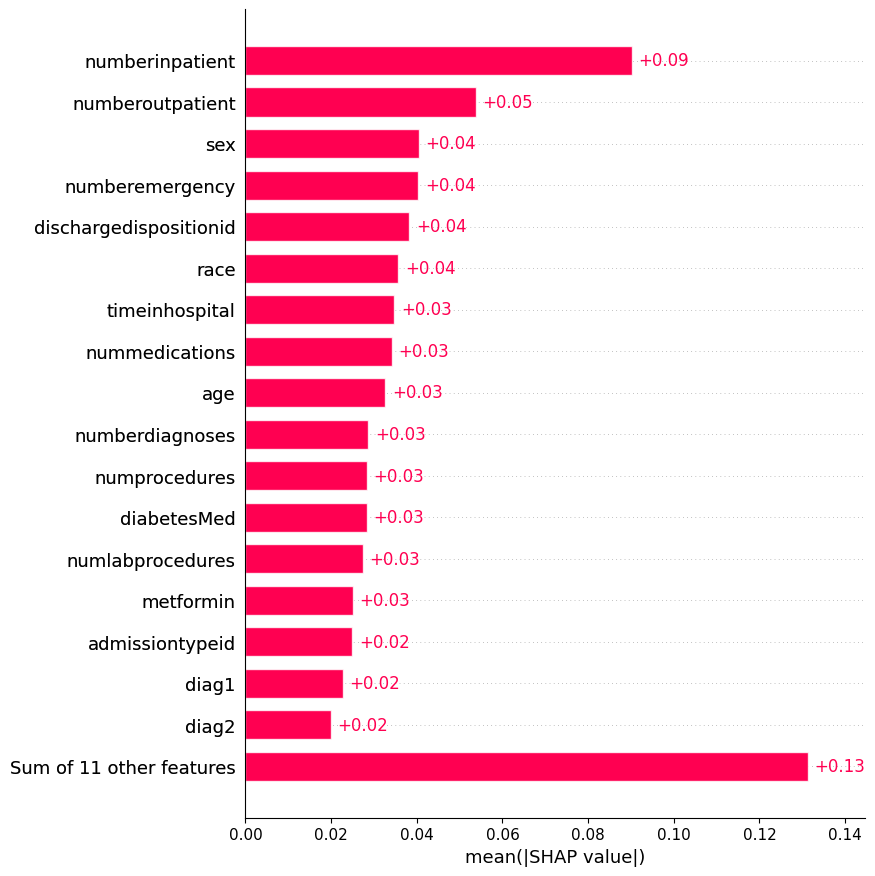

Permutation explainer: 501it [00:40,  9.36it/s]                                 


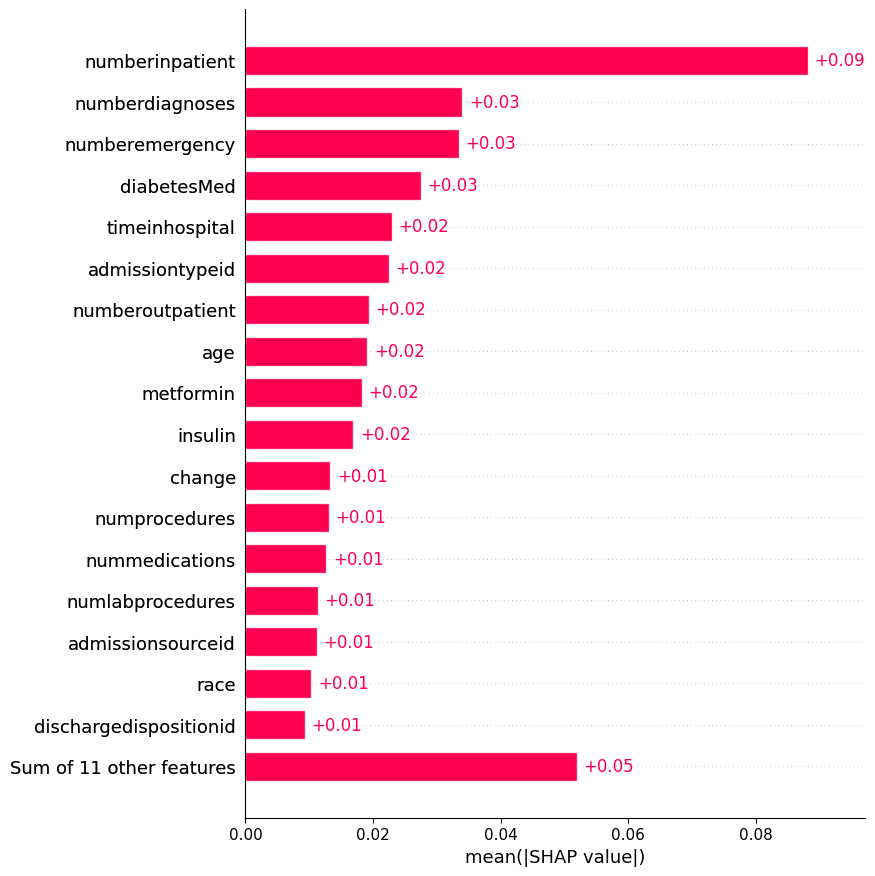

Permutation explainer: 501it [00:23, 14.18it/s]                                 


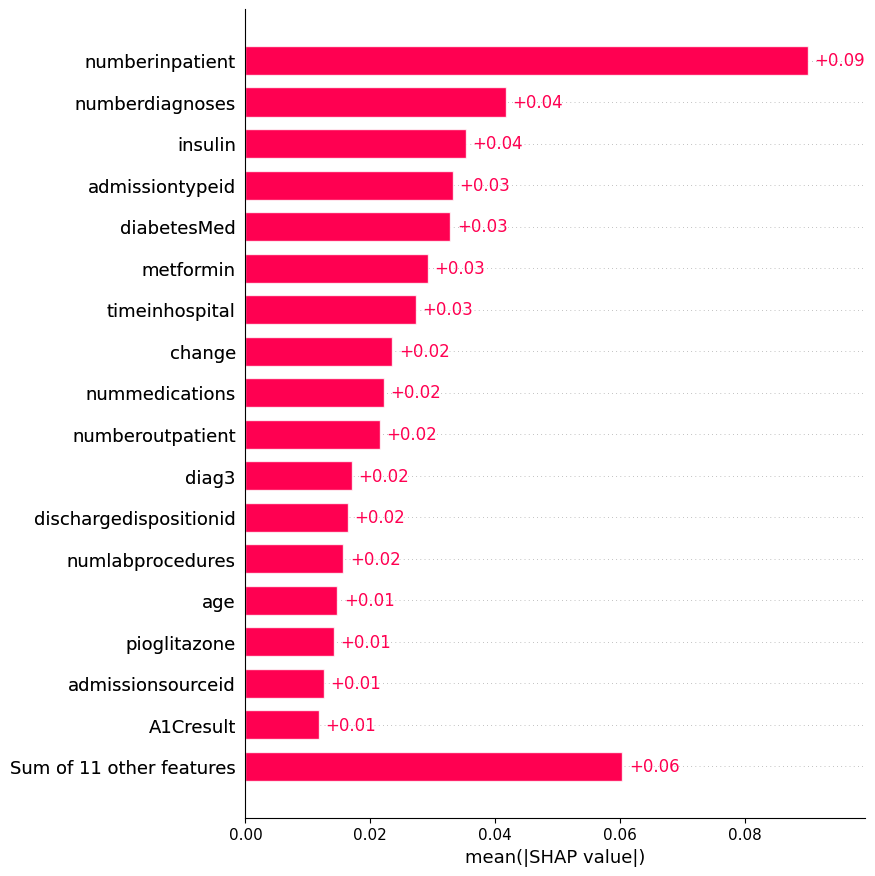

Permutation explainer: 501it [02:58,  2.62it/s]                                 


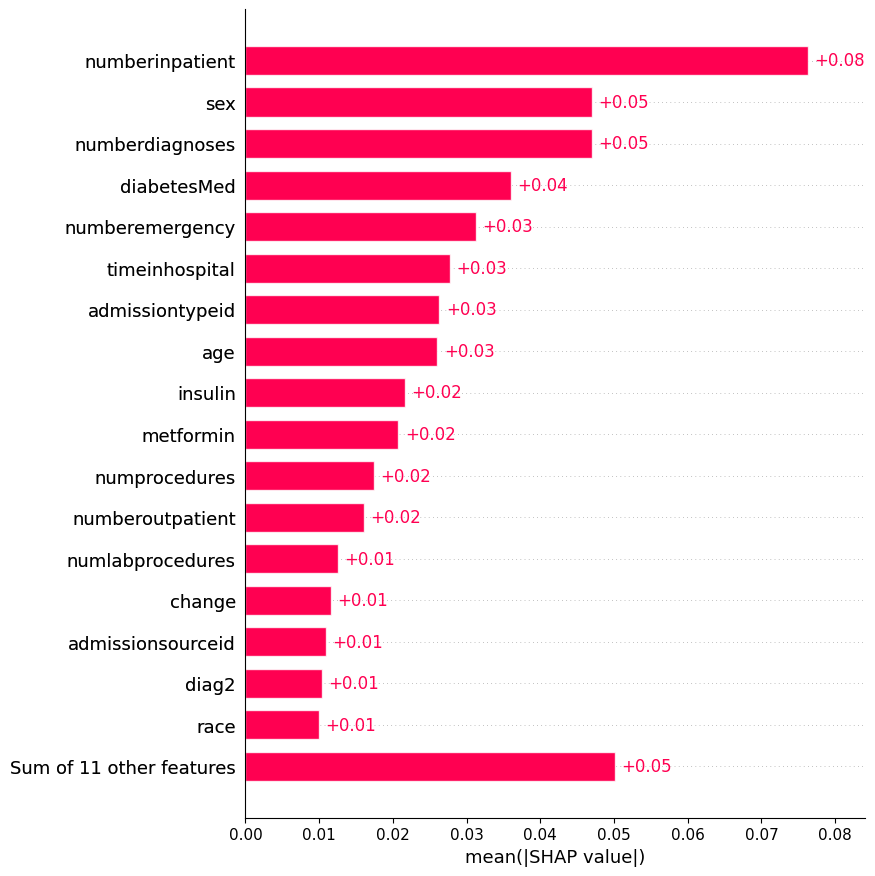

Permutation explainer: 501it [00:28, 11.73it/s]                                 


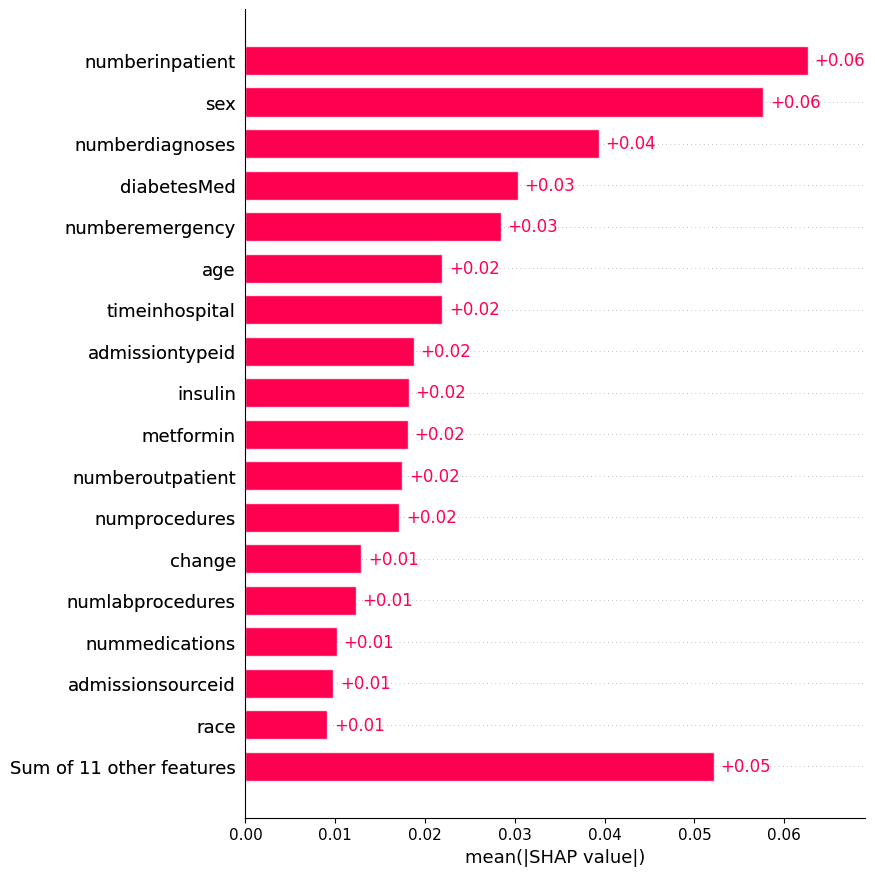

Permutation explainer: 501it [00:19, 11.46it/s]                                 


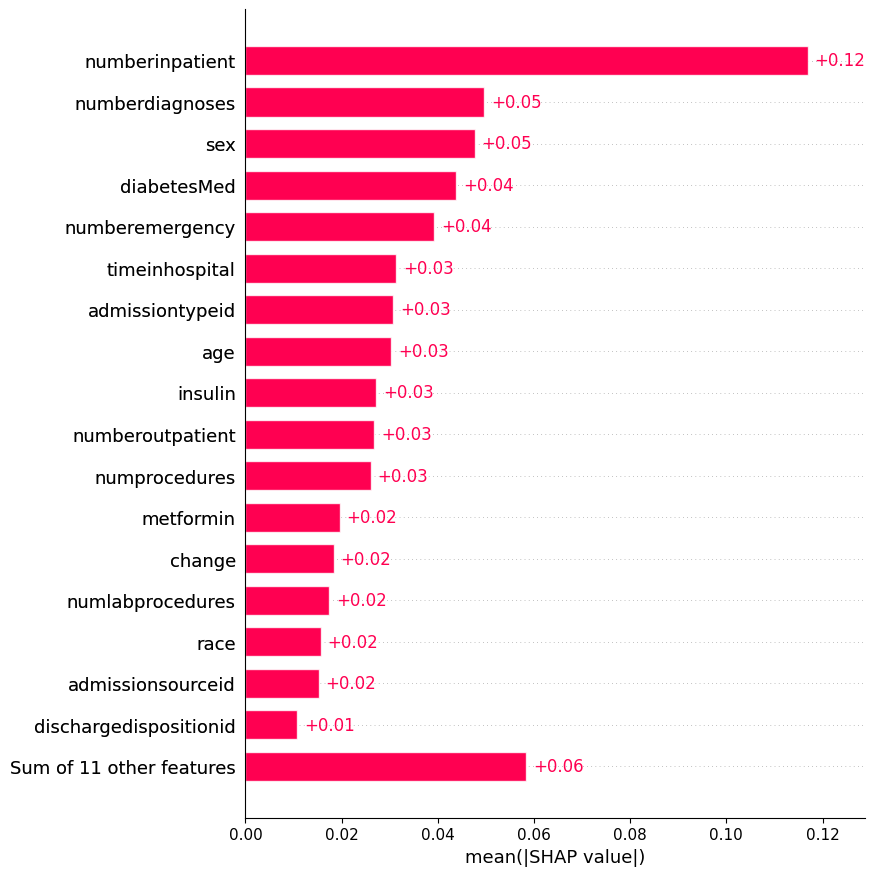

Permutation explainer: 501it [05:30,  1.47it/s]                                 


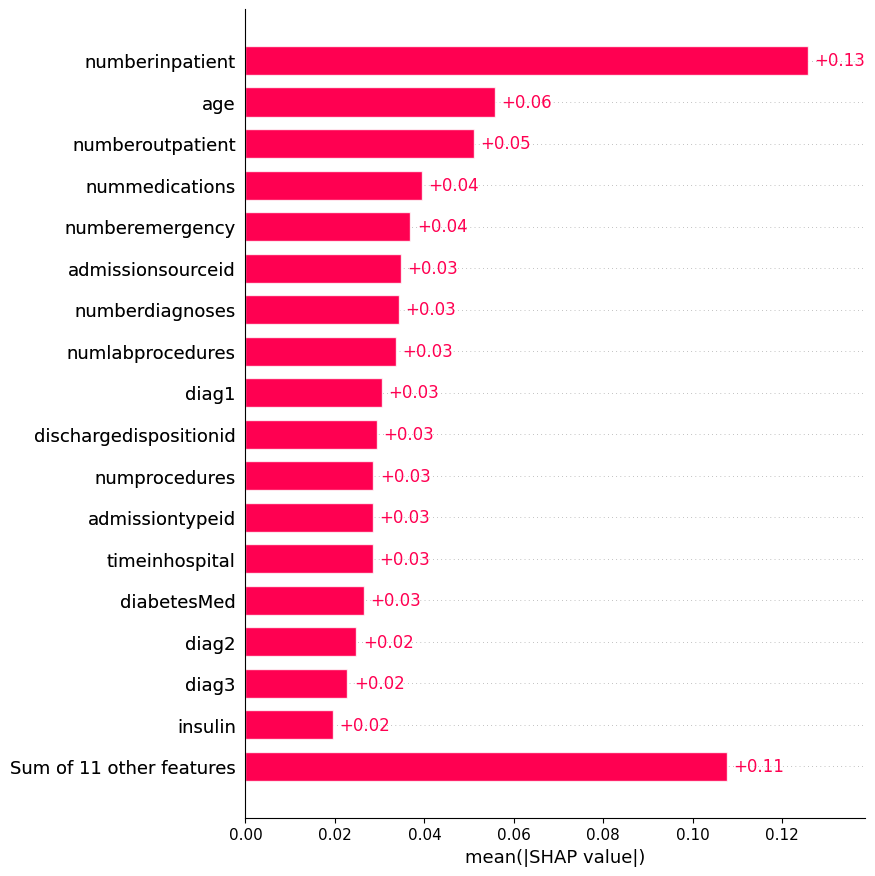

Permutation explainer: 501it [00:10,  3.44it/s]                                 


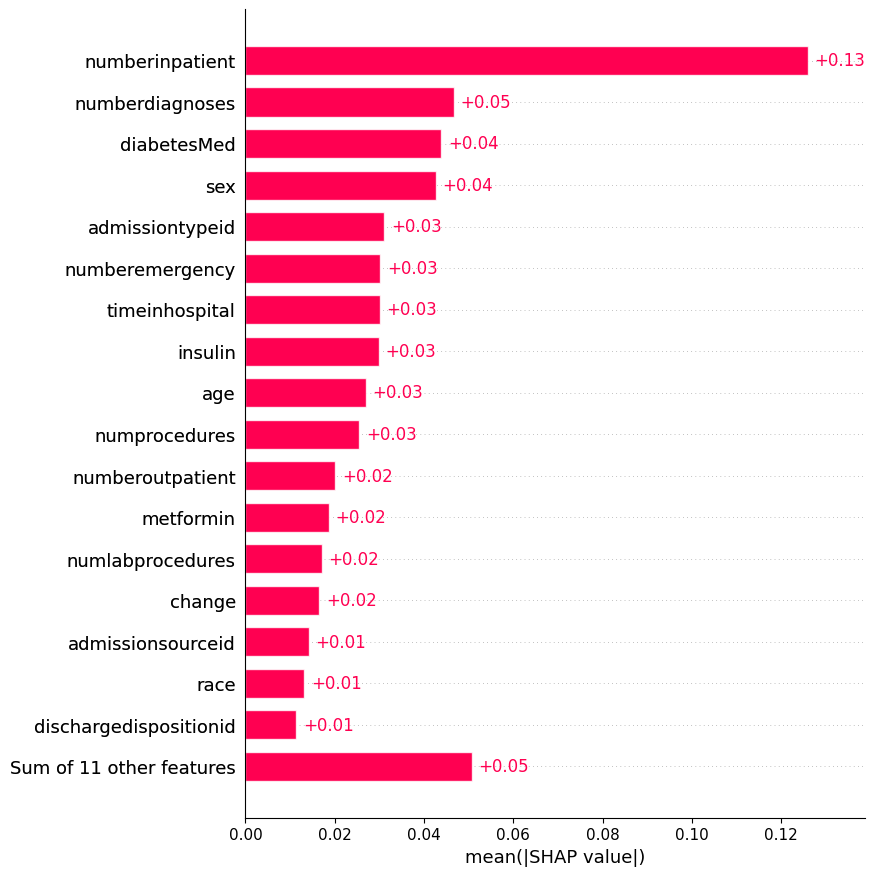

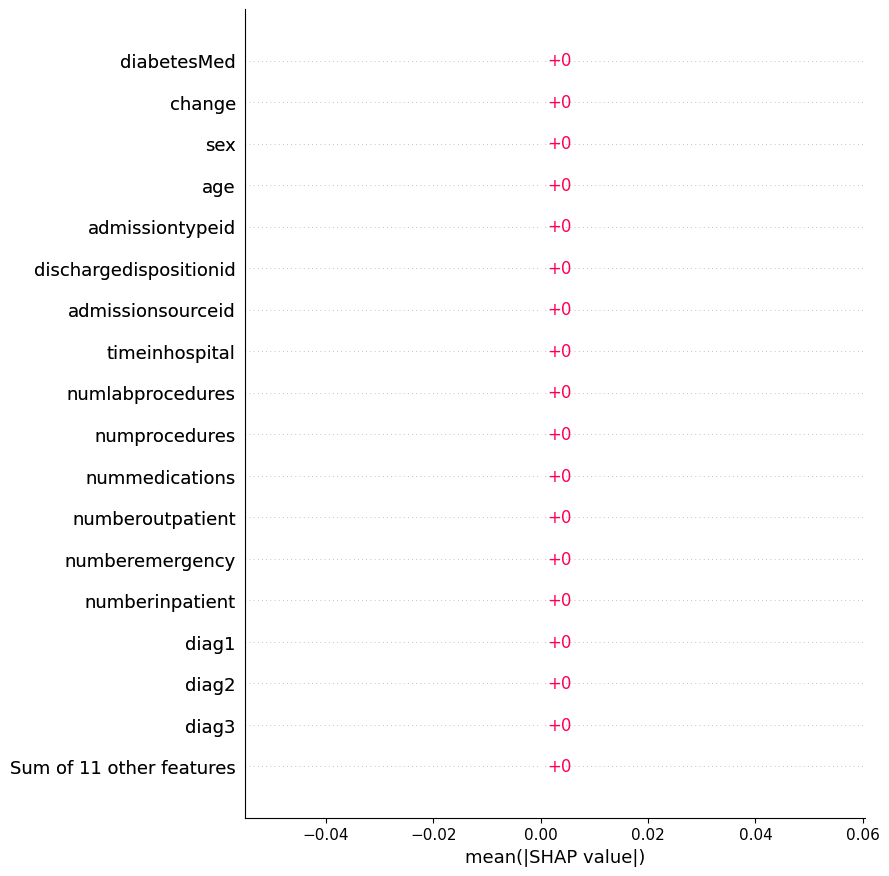

2023-03-01 17:19:10.720972: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 46192 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:b1:00.0, compute capability: 8.6
2023-03-01 17:19:10.721238: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 46192 MB memory:  -> device: 1, name: NVIDIA RTX A6000, pci bus id: 0000:d9:00.0, compute capability: 8.6
Permutation explainer: 501it [02:11,  3.46it/s]                                 


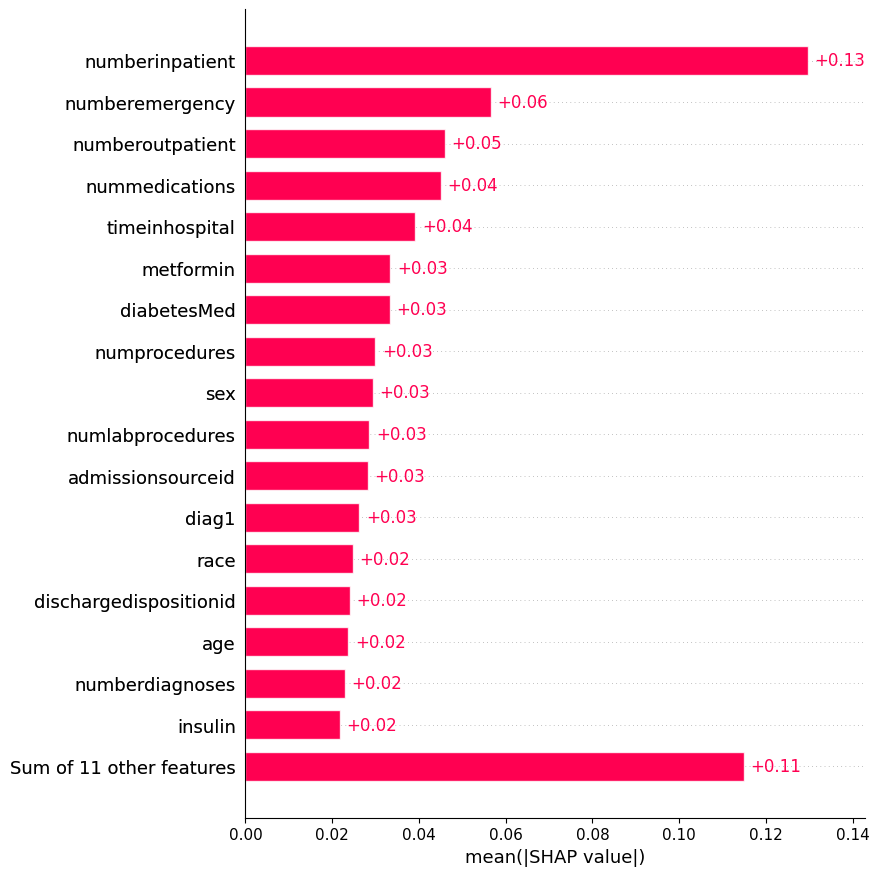

Permutation explainer: 501it [00:28, 10.46it/s]                                 


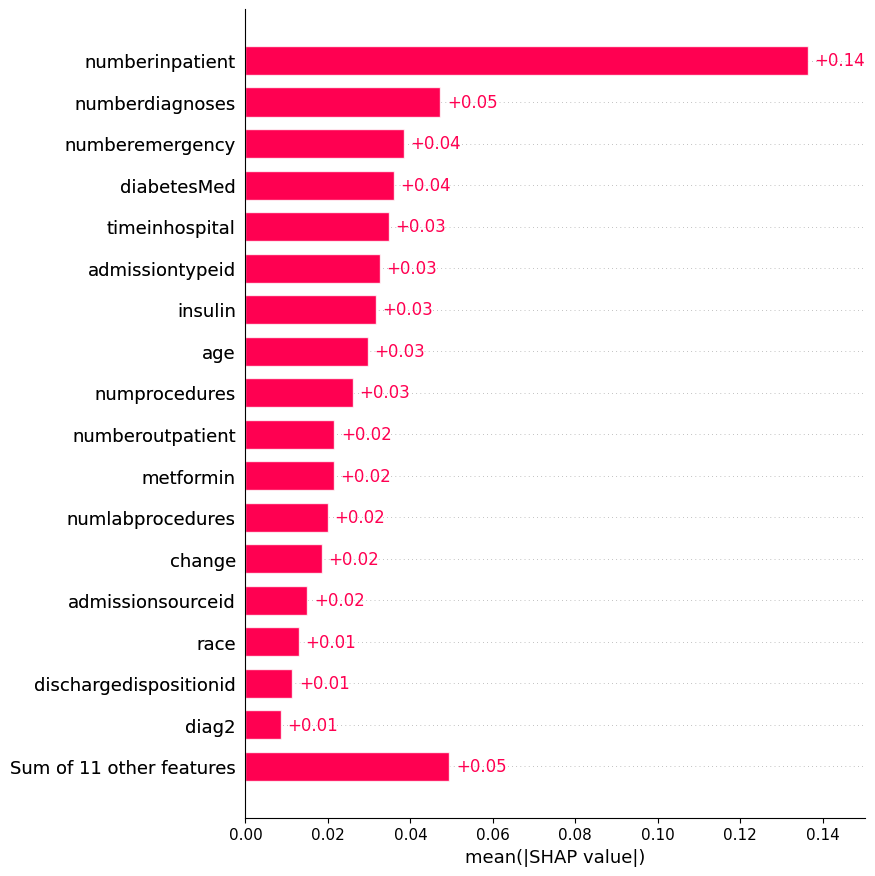

Permutation explainer: 501it [00:15, 10.77it/s]                                 


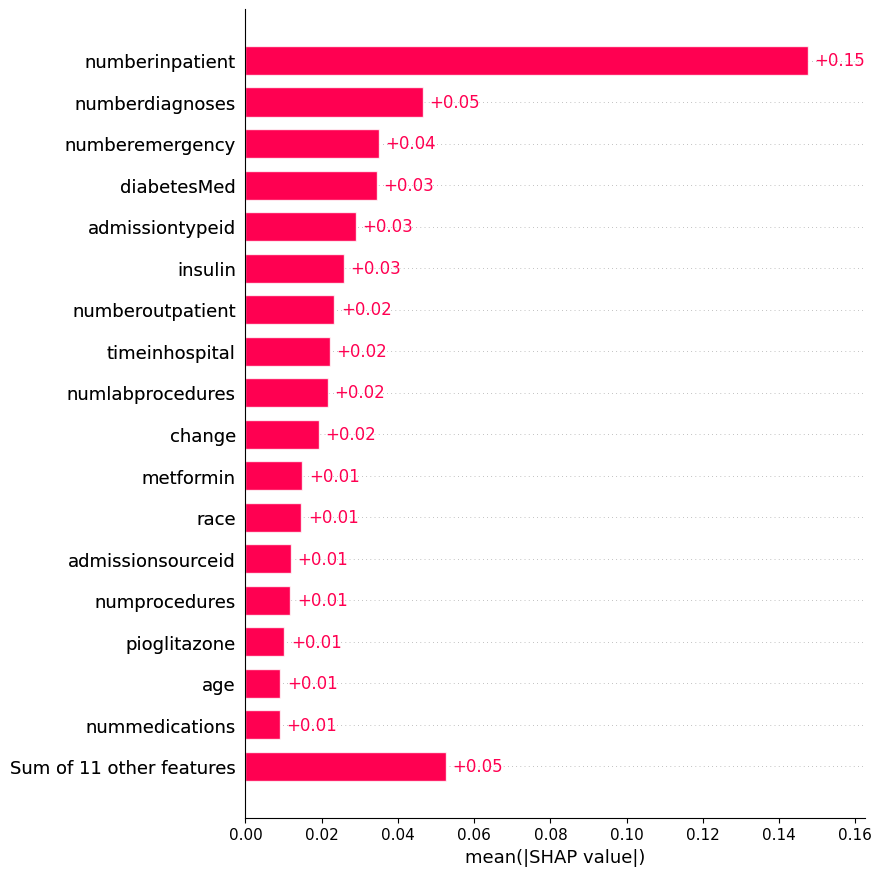

Permutation explainer: 501it [05:17,  1.53it/s]                                 


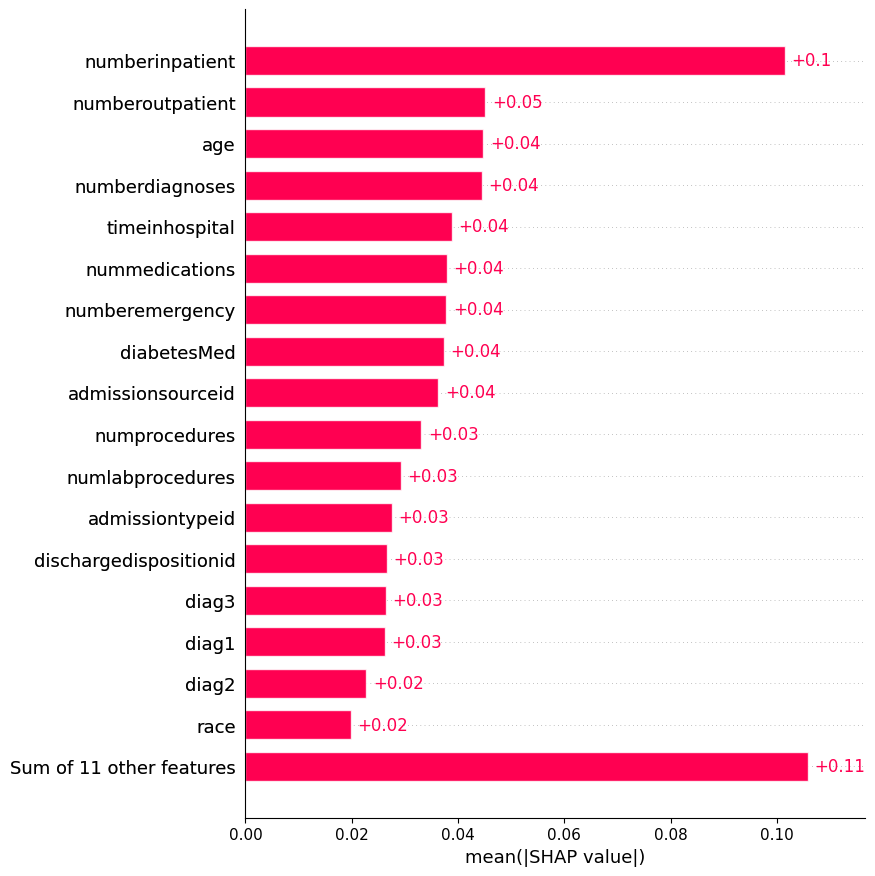

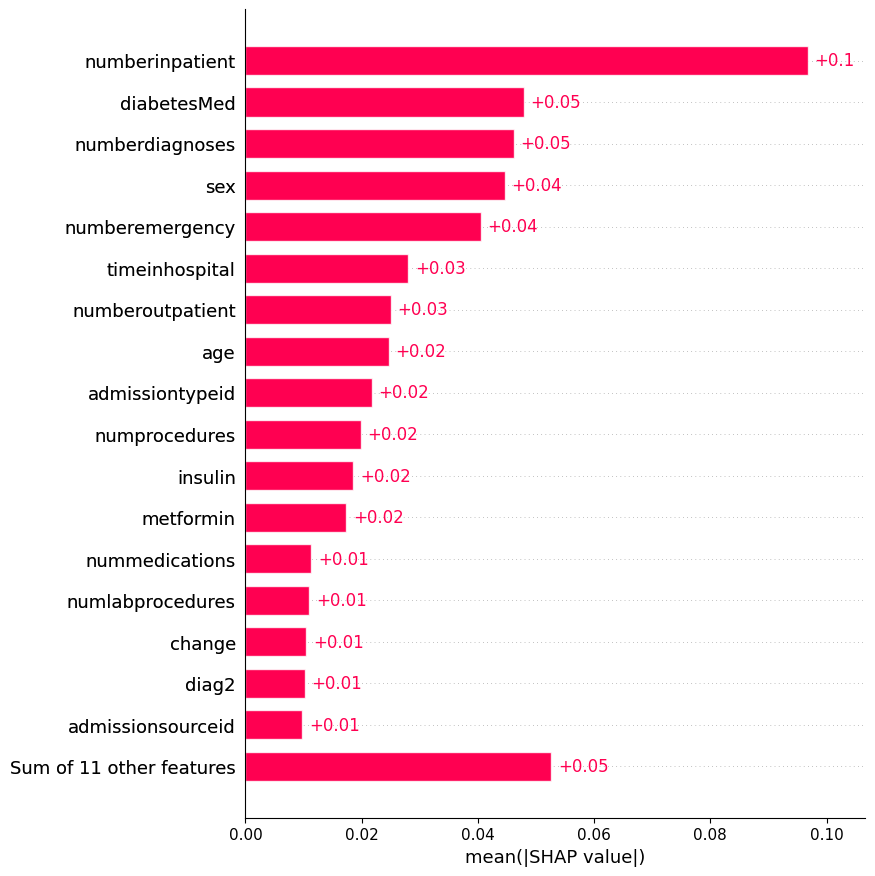

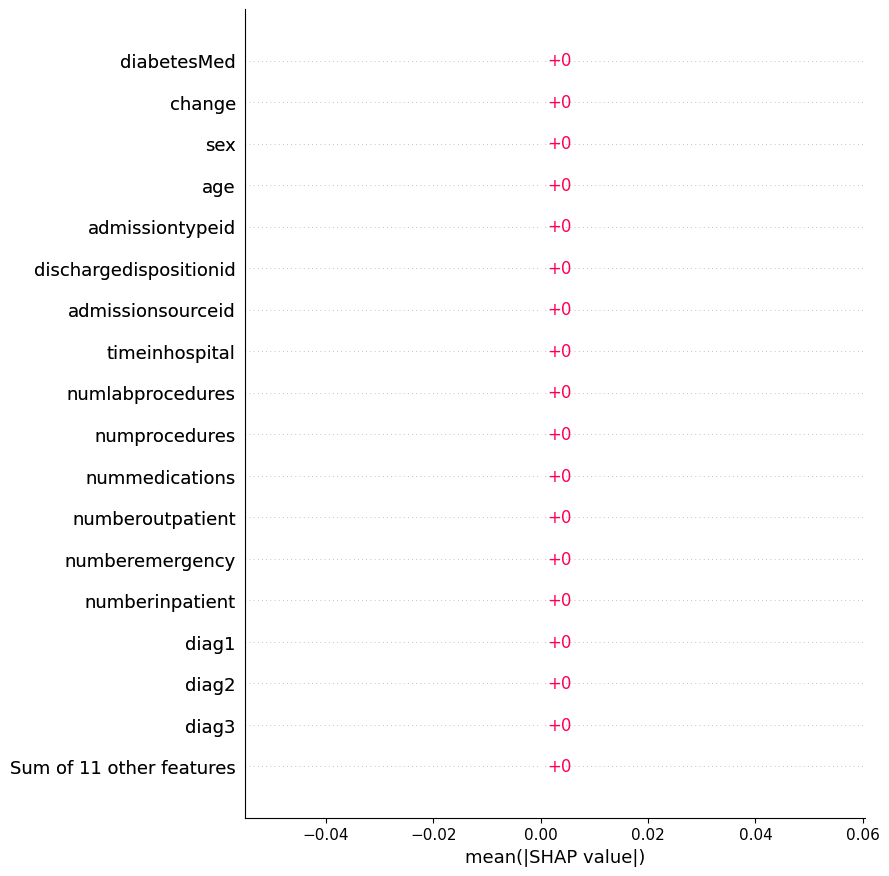

2023-03-01 17:52:03.536490: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 46192 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:b1:00.0, compute capability: 8.6
2023-03-01 17:52:03.536697: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 46192 MB memory:  -> device: 1, name: NVIDIA RTX A6000, pci bus id: 0000:d9:00.0, compute capability: 8.6
Permutation explainer: 501it [02:19,  3.32it/s]                                 


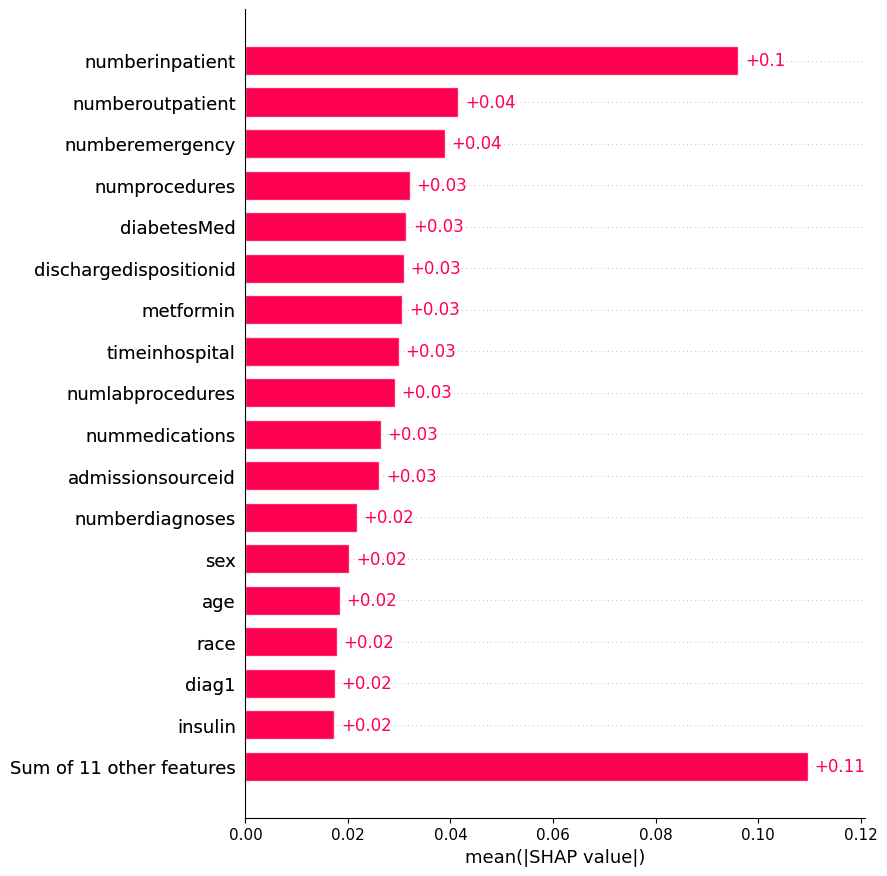

Permutation explainer: 501it [00:24, 11.86it/s]                                 


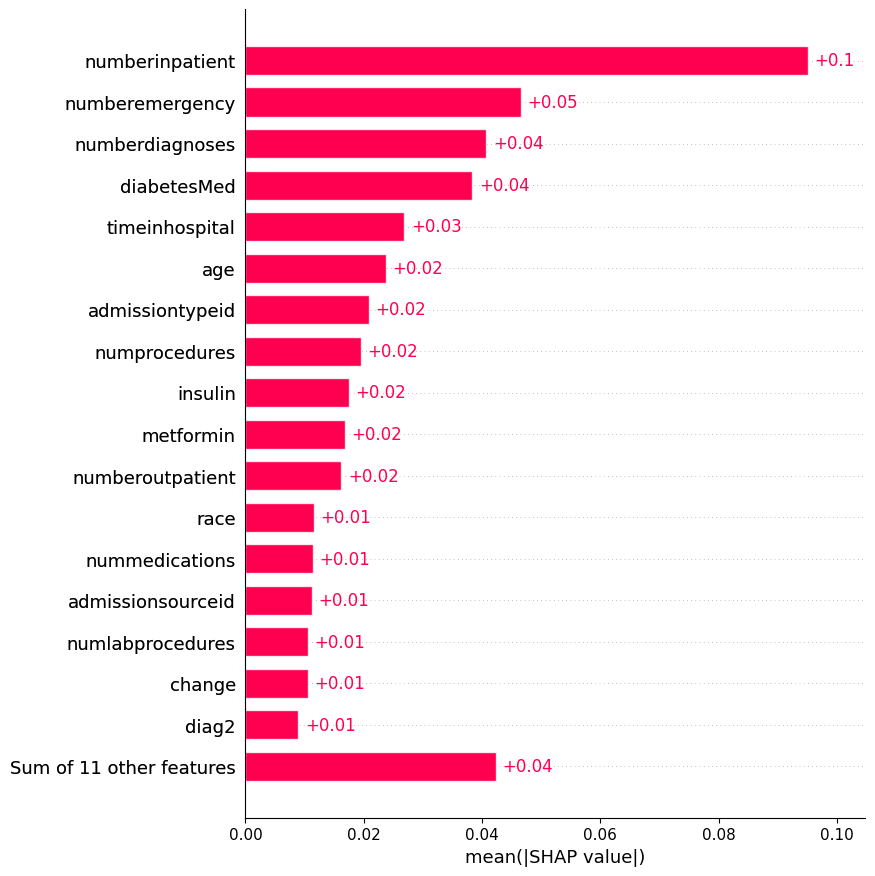

Permutation explainer: 501it [00:12,  6.27it/s]                                 


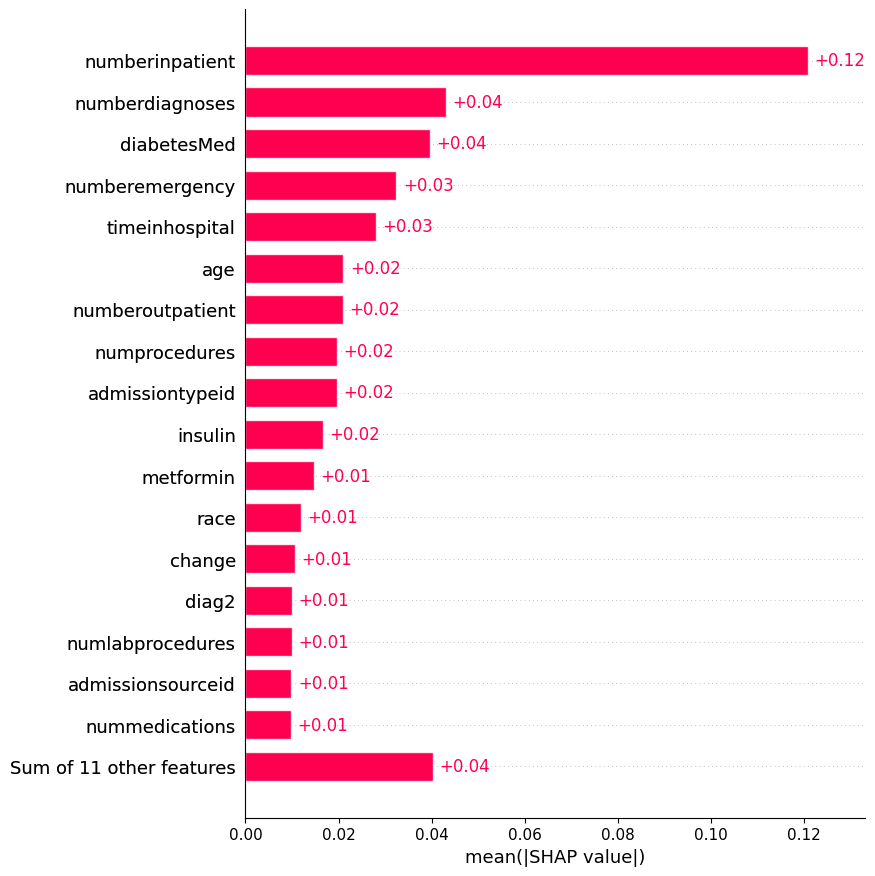

Permutation explainer: 501it [02:00,  3.63it/s]                                 


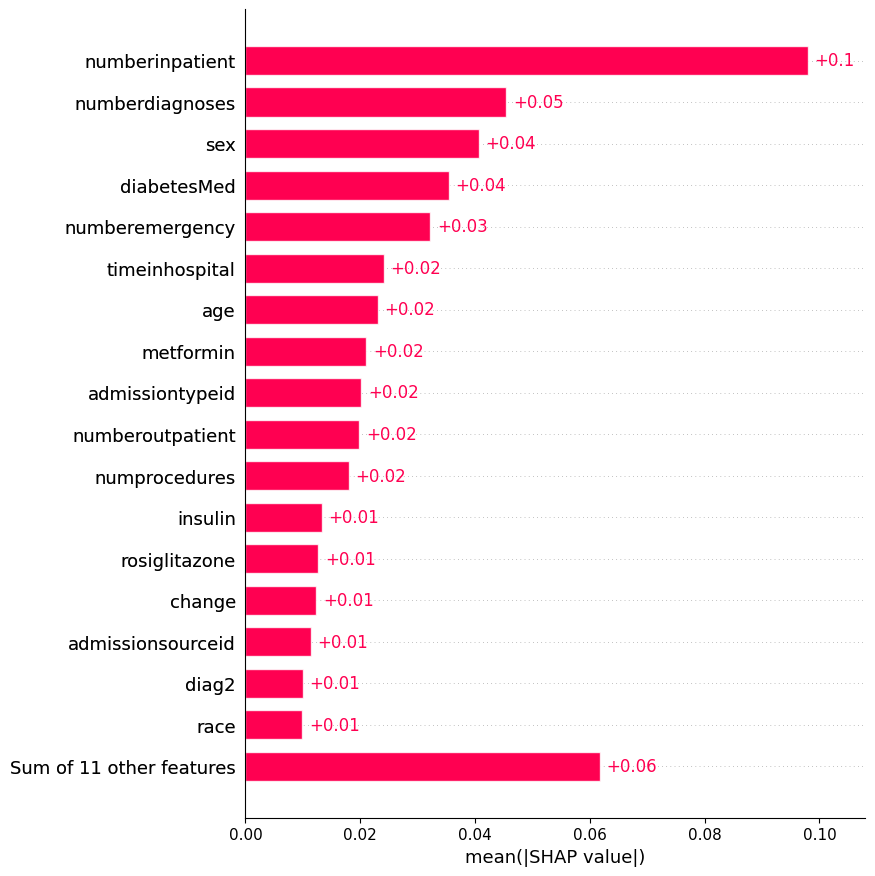

Permutation explainer: 501it [00:23, 12.21it/s]                                 


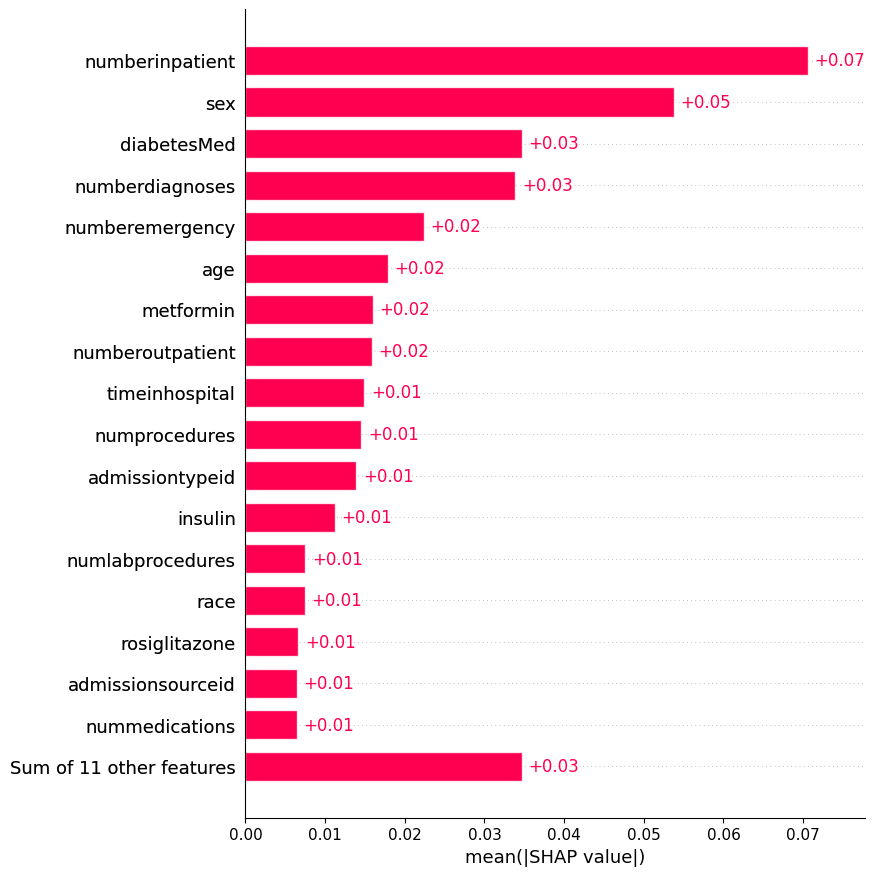

In [3]:
paths = {0:'data/datasets/diabetes/',
         0.2:'data/datasets/diabetes/synthetic/gender_flip_labels0.2_version0/',
         0.4:'data/datasets/diabetes/synthetic/gender_flip_labels0.4_version0/',
         0.6:'data/datasets/diabetes/synthetic/gender_flip_labels0.6_version0/',
         0.8:'data/datasets/diabetes/synthetic/gender_flip_labels0.8_version0/'
        }

for frac in paths:
    path = paths[frac]
    
    gname = 'diabetes'

    train_df = pd.read_csv(path+'train.csv',header=None)

    train_df.columns = ['race', 'sex', 'age', 'admissiontypeid', 'dischargedispositionid',
       'admissionsourceid', 'timeinhospital', 'numlabprocedures',
       'numprocedures', 'nummedications', 'numberoutpatient',
       'numberemergency', 'numberinpatient', 'diag1', 'diag2', 'diag3',
       'numberdiagnoses', 'maxgluserum', 'A1Cresult', 'metformin',
       'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'insulin', 'change', 'diabetesMed', 'readmitted']


    train_df.index = train_df['sex']

    train_df = train_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

    test_df = pd.read_csv(path+'test.csv',header=None)

    test_df.columns = ['race', 'sex', 'age', 'admissiontypeid', 'dischargedispositionid',
       'admissionsourceid', 'timeinhospital', 'numlabprocedures',
       'numprocedures', 'nummedications', 'numberoutpatient',
       'numberemergency', 'numberinpatient', 'diag1', 'diag2', 'diag3',
       'numberdiagnoses', 'maxgluserum', 'A1Cresult', 'metformin',
       'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'insulin', 'change', 'diabetesMed', 'readmitted']


    test_df.index = test_df['sex']

    test_df = test_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)



    X_train = train_df.drop(['readmitted'],axis=1)
    X_test = test_df.drop(['readmitted'],axis=1)

    y_train = pd.Series(train_df['readmitted'])
    y_test = pd.Series(test_df['readmitted'])

    y_train = pd.Series(y_train.factorize(sort=True)[0], index=y_train.index)
    y_test = pd.Series(y_test.factorize(sort=True)[0], index=y_test.index)

    X_merged = pd.concat([X_train,X_test])

    ohe = make_column_transformer(
        (OneHotEncoder(sparse=False), X_merged.dtypes == 'object'),
        remainder='passthrough', verbose_feature_names_out=False)

    X_merged_temp  = pd.DataFrame(ohe.fit_transform(X_merged), columns=ohe.get_feature_names_out(), index=X_merged.index)

    X_train  = pd.DataFrame(ohe.transform(X_train), columns=ohe.get_feature_names_out(), index=X_train.index)
    X_test = pd.DataFrame(ohe.transform(X_test), columns=ohe.get_feature_names_out(), index=X_test.index)

    lr = LogisticRegression(solver='liblinear')
    lr.fit(X_train, y_train)
    
    name = gname+'_baseline_'+str(frac)
    dothings(X_test,lr,name)

    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    
    name = gname+'_randomforest_'+str(frac)
    dothings(X_test,rf,name)
    
    rew = ReweighingMeta(estimator=LogisticRegression(solver='liblinear'),
                     reweigher=Reweighing('sex'))
    params = {'estimator__C': [1, 10]}

    clf = GridSearchCV(rew, params, scoring='accuracy', cv=5)
    clf.fit(X_train, y_train)
    
    name = gname+'_adv_rew_'+str(frac)
    dothings(X_test,clf,name)
    
    LFR = LearnedFairRepresentations(prot_attr='sex')
    LFR.fit(X_train, y_train)
    
    name = gname+'_lfr_'+str(frac)
    dothings(X_test,LFR,name)
    
    adv_deb = AdversarialDebiasing(prot_attr='sex')
    adv_deb.fit(X_train, y_train)
    
    name = gname+'_adv_deb_'+str(frac)
    dothings(X_test,adv_deb,name)
    
    EGR = ExponentiatedGradientReduction(prot_attr=['sex_Female','sex_Male'], estimator=LogisticRegression(solver='liblinear'), constraints = 'EqualizedOdds')
    EGR.fit(X_train, y_train)
    
    name = gname+'_egr_'+str(frac)
    dothings(X_test,EGR,name)
    
    GSR = GridSearchReduction(prot_attr=['sex_Female','sex_Male'], estimator=LogisticRegression(solver='liblinear'), constraints = 'EqualizedOdds')
    GSR.fit(X_train, y_train)
    
    name = gname+'_gsr_'+str(frac)
    dothings(X_test,GSR,name)
    
    X_train_temp = X_train.set_index(['sex_Male'], drop = False)
    y_train_temp = y_train.copy()
    y_train_temp.index = X_train_temp.index

    X_test_temp = X_test.set_index(['sex_Male'], drop = False)
    y_test_temp = y_test.copy()
    y_test_temp.index = X_test_temp.index
    
    cal_eq_odds = CalibratedEqualizedOdds(prot_attr='sex_Male', cost_constraint='weighted')
    postproc = PostProcessingMeta(estimator=LogisticRegression(solver='liblinear'), postprocessor=cal_eq_odds)
    postproc.fit(X_train_temp, y_train_temp)
    
    name = gname+'_caleq_'+str(frac)
    dothings3(X_test_temp,postproc,name)
    
    rocv = PostProcessingMeta(LogisticRegression(solver='liblinear'), RejectOptionClassifierCV('sex_Male', scoring='average_odds'))
    rocv.fit(X_train_temp, y_train_temp)
    
    name = gname+'_rocv_'+str(frac)
    dothings3(X_test_temp,rocv,name)

Permutation explainer: 501it [00:22, 12.21it/s]                                 


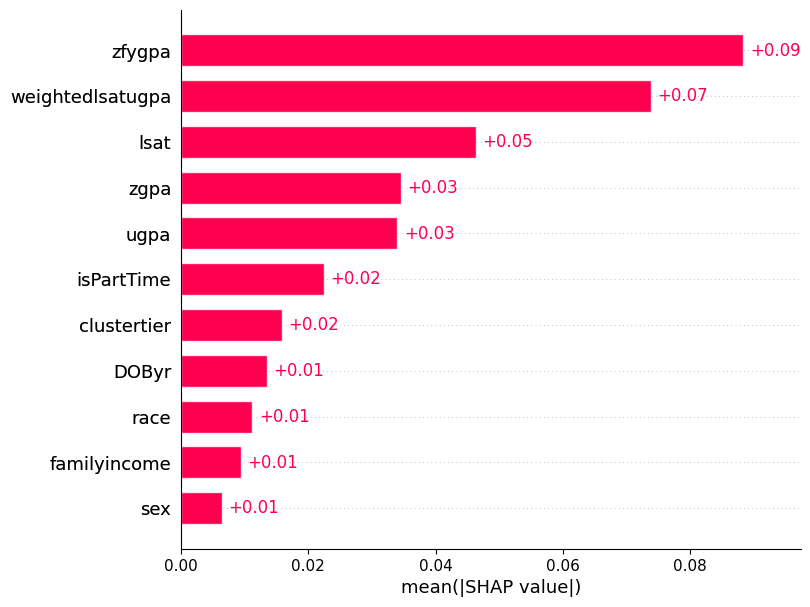

Permutation explainer: 501it [02:50,  2.76it/s]                                 


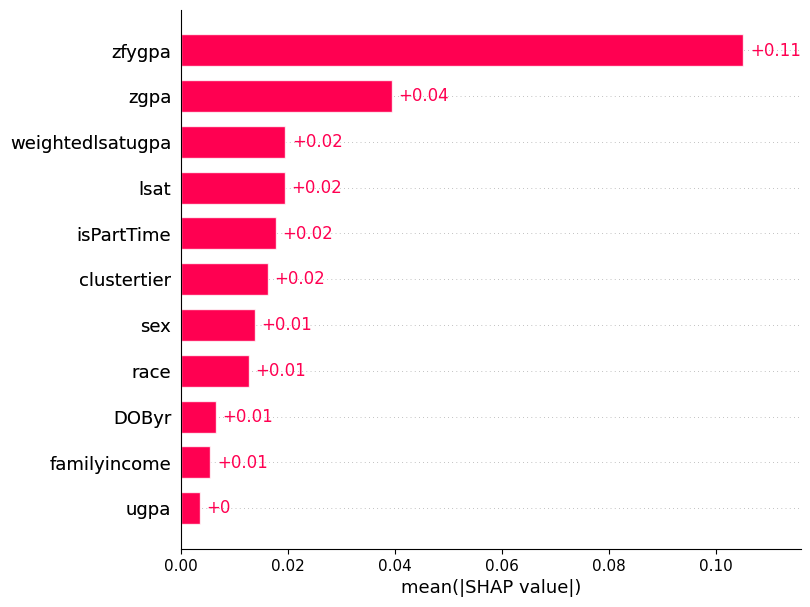

Permutation explainer: 501it [01:45,  4.28it/s]                                 


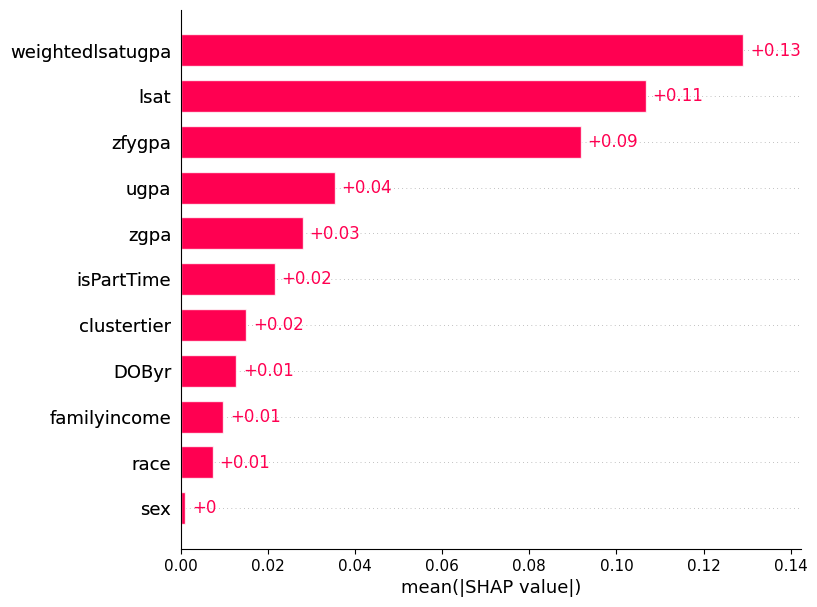

Permutation explainer: 501it [03:25,  2.32it/s]                                 


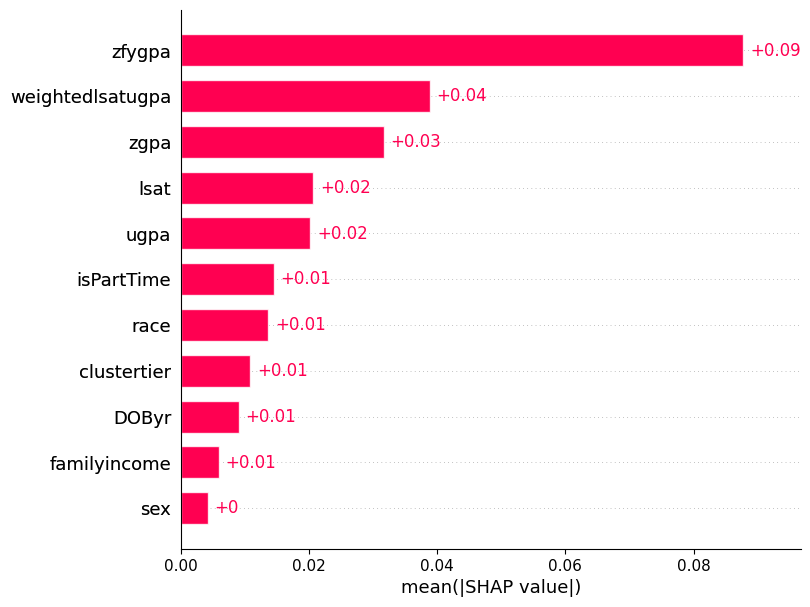

Permutation explainer: 501it [00:41,  9.20it/s]                                 


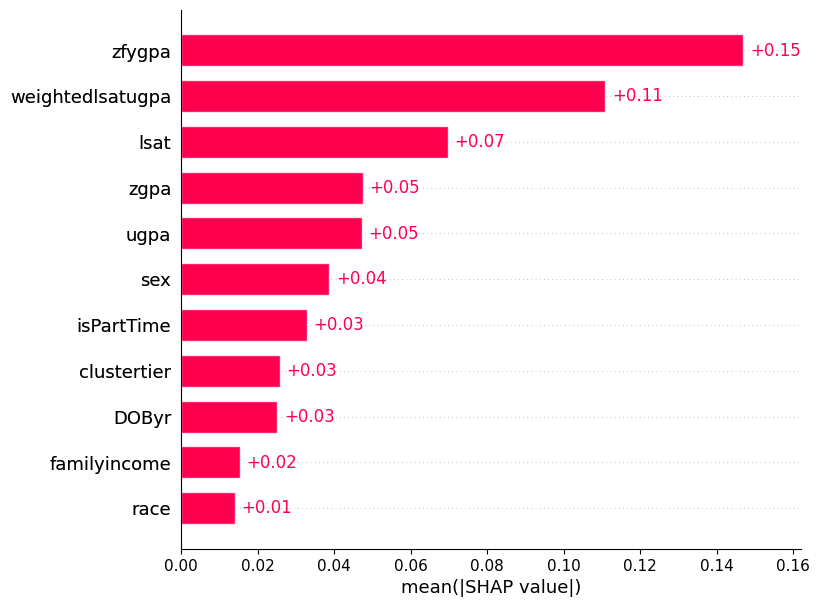

Permutation explainer: 501it [00:23, 12.22it/s]                                 


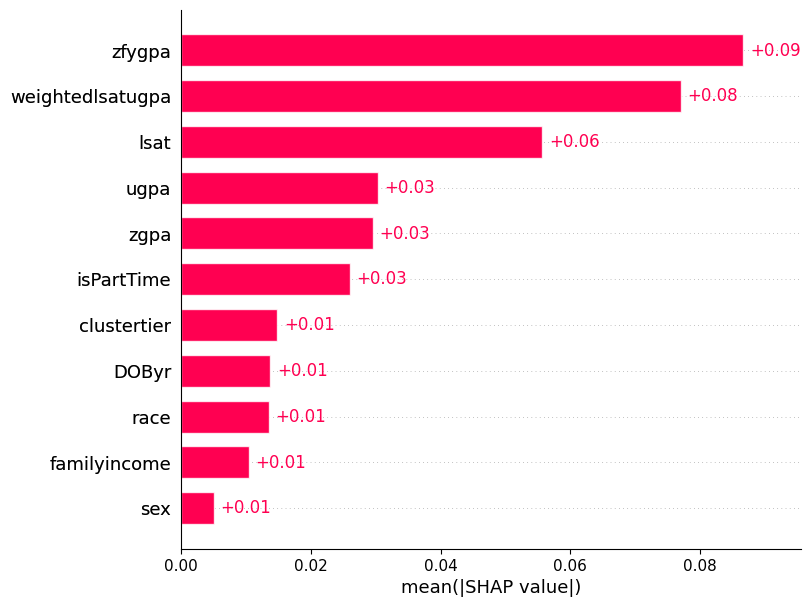

Permutation explainer: 501it [06:37,  1.23it/s]                                 


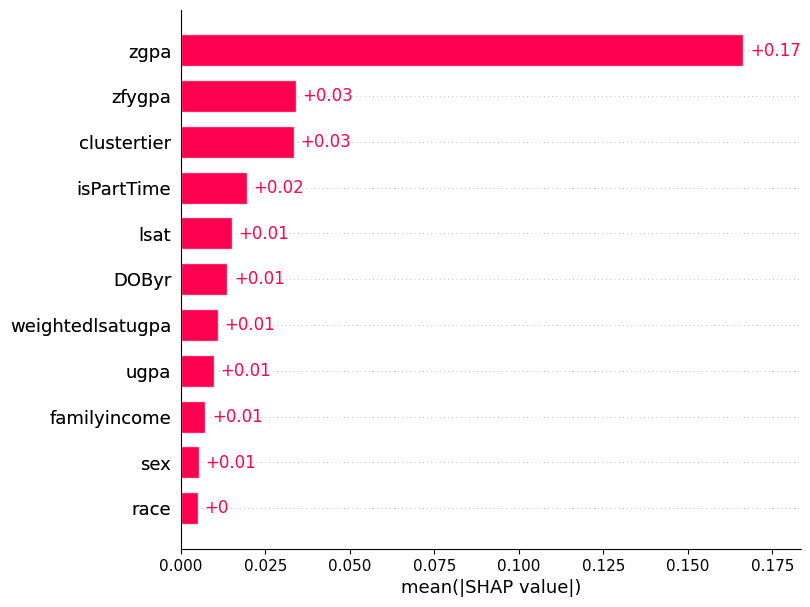

Permutation explainer: 501it [00:16, 11.93it/s]                                 


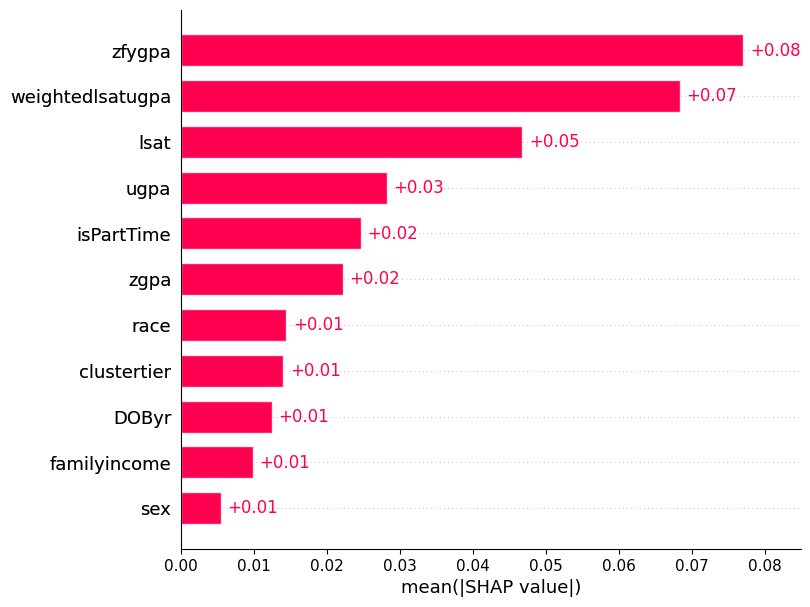

Permutation explainer: 501it [00:12,  7.12it/s]                                 


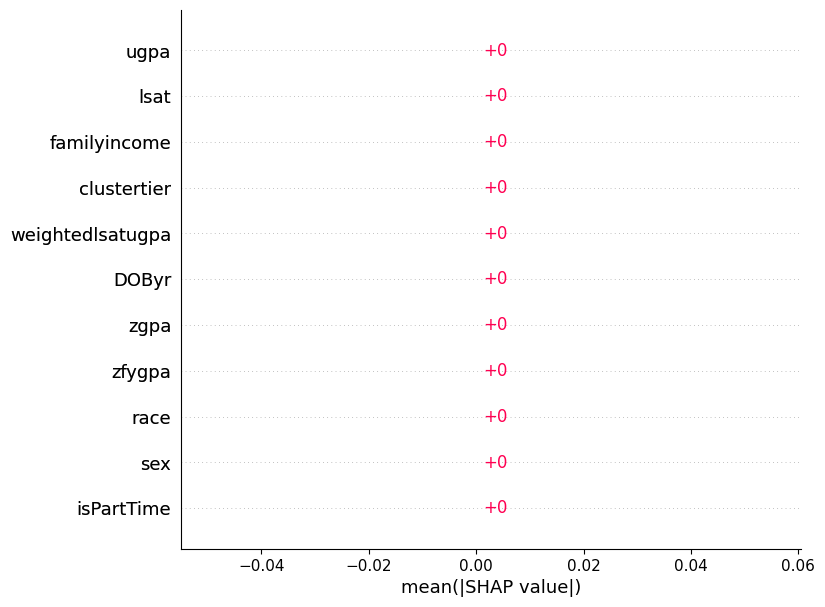

2023-02-27 16:24:28.975192: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 46192 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:b1:00.0, compute capability: 8.6
2023-02-27 16:24:28.975429: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 46192 MB memory:  -> device: 1, name: NVIDIA RTX A6000, pci bus id: 0000:d9:00.0, compute capability: 8.6
Permutation explainer: 501it [02:52,  2.75it/s]                                 


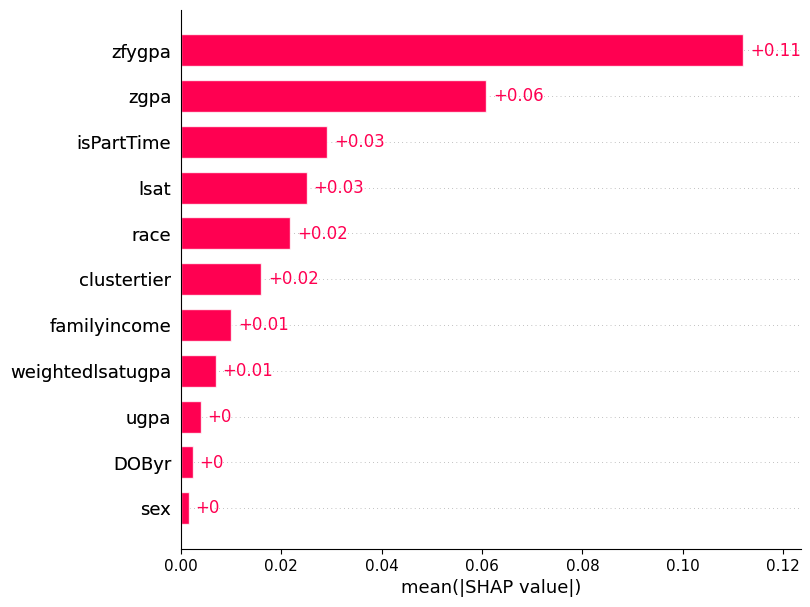

Permutation explainer: 501it [01:14,  5.57it/s]                                 


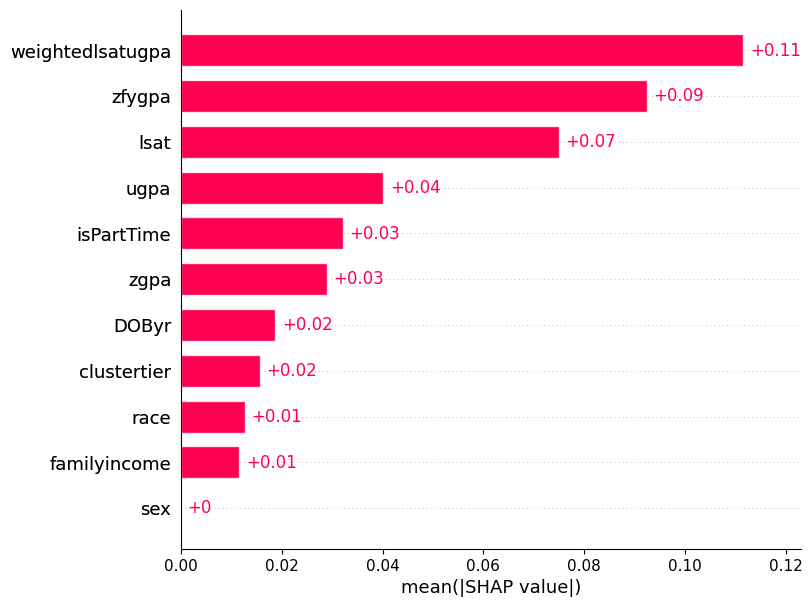

Permutation explainer: 501it [00:28, 11.33it/s]                                 


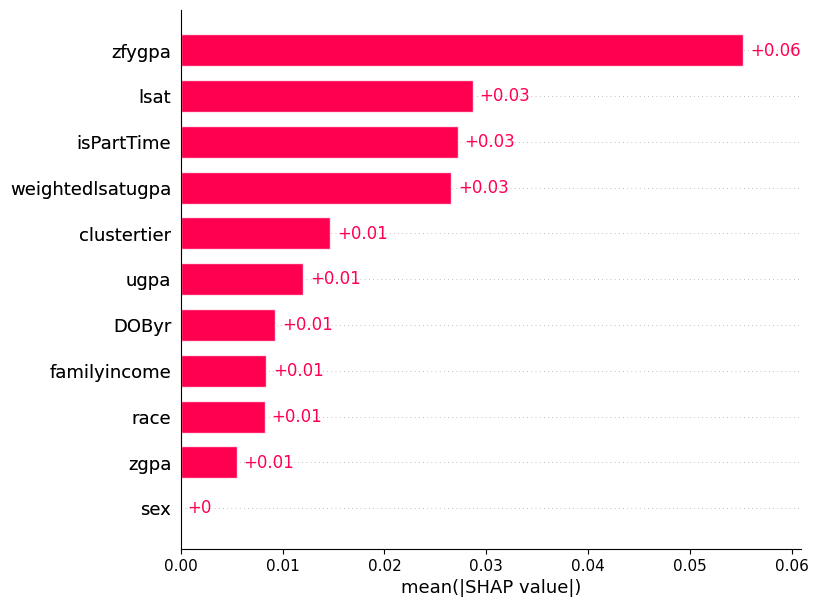

Permutation explainer: 501it [02:49,  2.81it/s]                                 


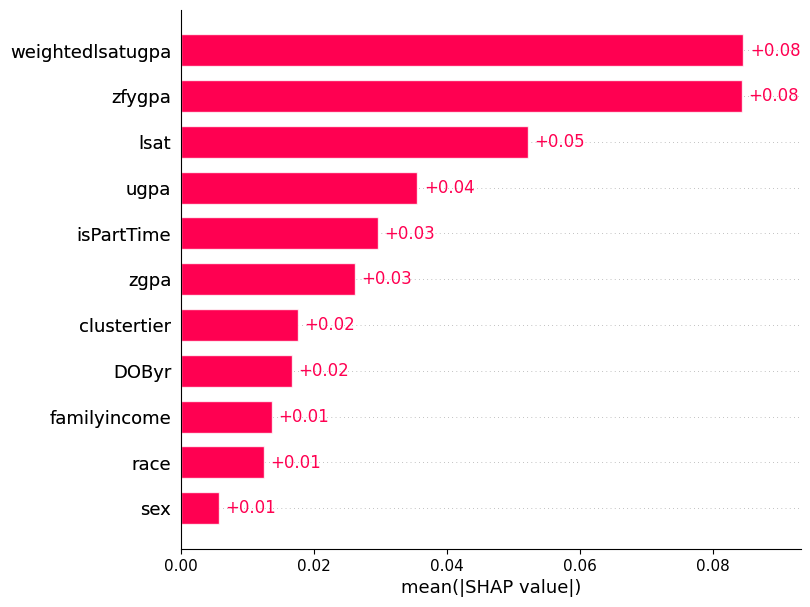

Permutation explainer: 501it [00:29, 11.18it/s]                                 


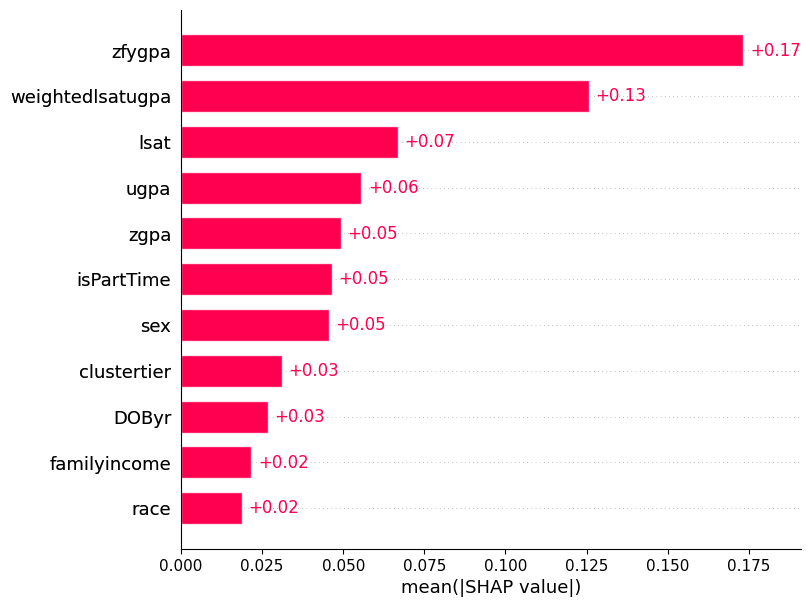

Permutation explainer: 501it [00:19, 11.30it/s]                                 


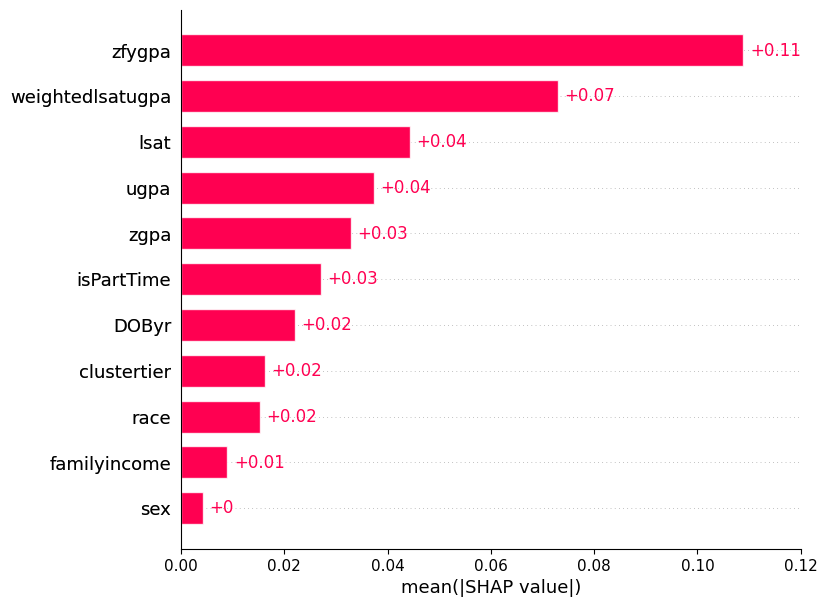

Permutation explainer: 501it [00:21, 13.19it/s]                                 


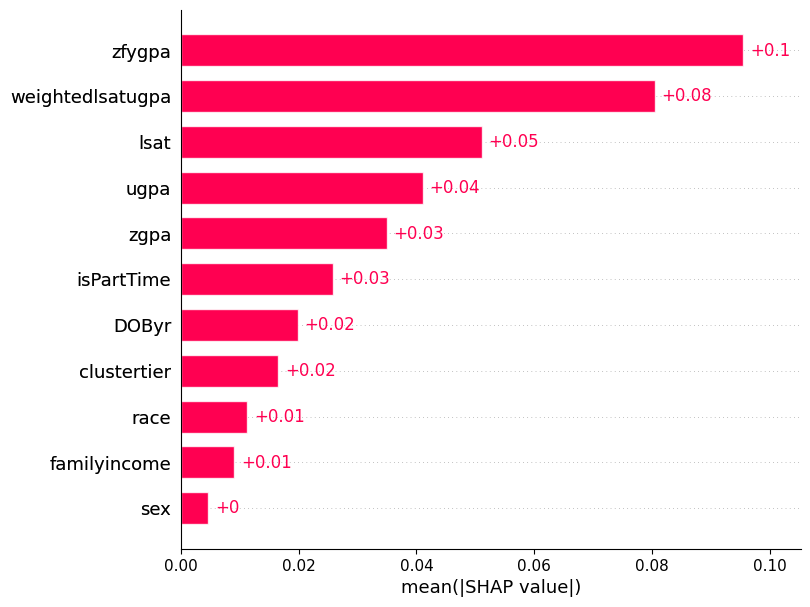

Permutation explainer: 501it [00:12,  8.17it/s]                                 


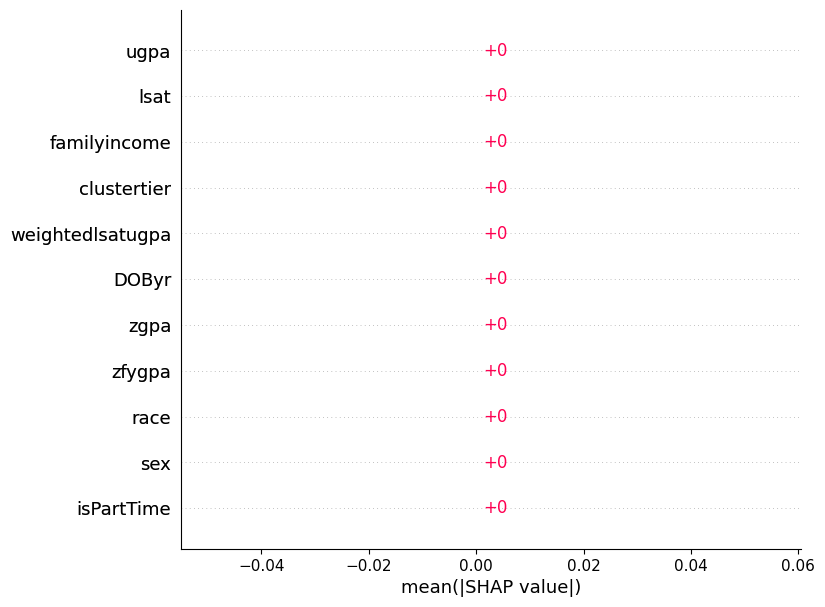

2023-02-27 16:41:30.117296: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 46192 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:b1:00.0, compute capability: 8.6
2023-02-27 16:41:30.117549: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 46192 MB memory:  -> device: 1, name: NVIDIA RTX A6000, pci bus id: 0000:d9:00.0, compute capability: 8.6
Permutation explainer: 501it [02:47,  2.82it/s]                                 


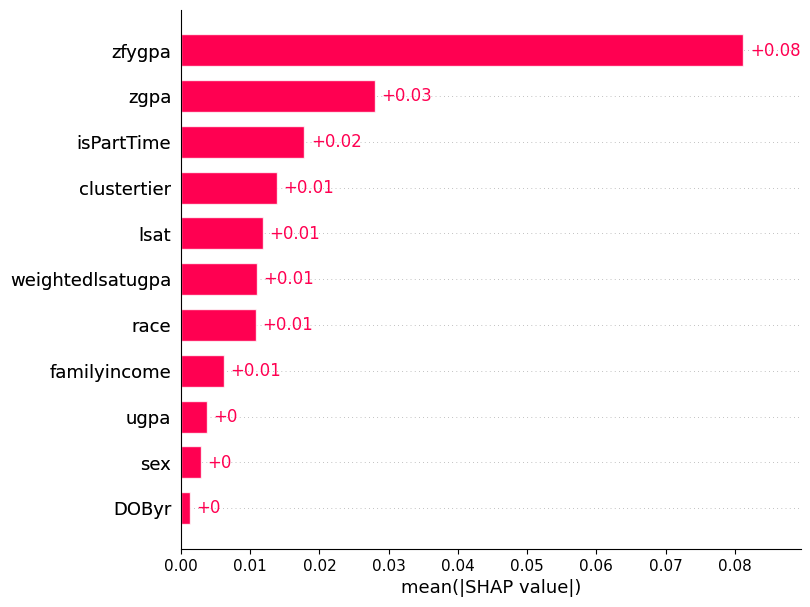

Permutation explainer: 501it [01:00,  6.49it/s]                                 


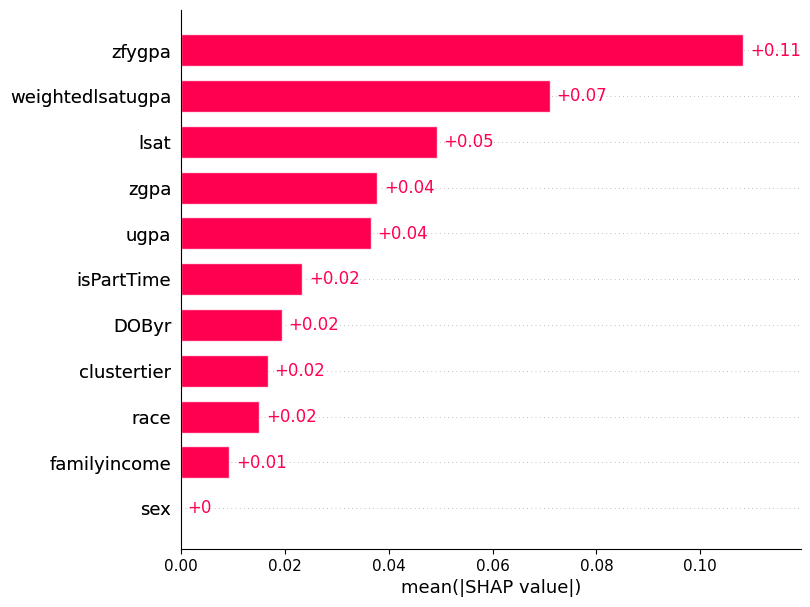

Permutation explainer: 501it [00:20, 12.43it/s]                                 


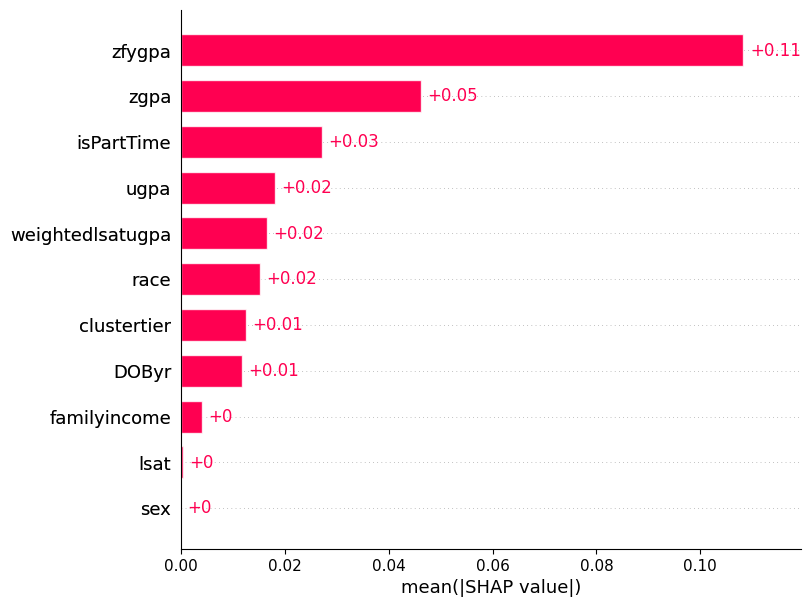

Permutation explainer: 501it [03:18,  2.31it/s]                                 


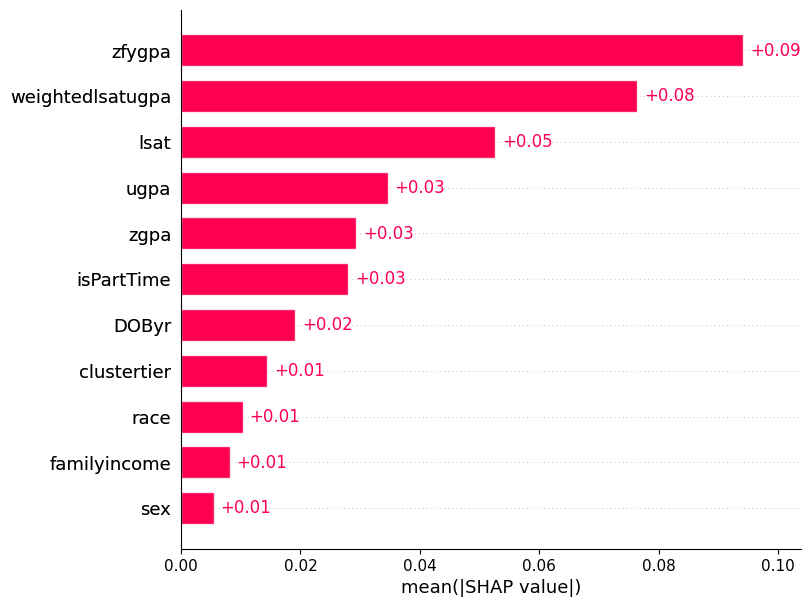

Permutation explainer: 501it [00:41,  9.20it/s]                                 


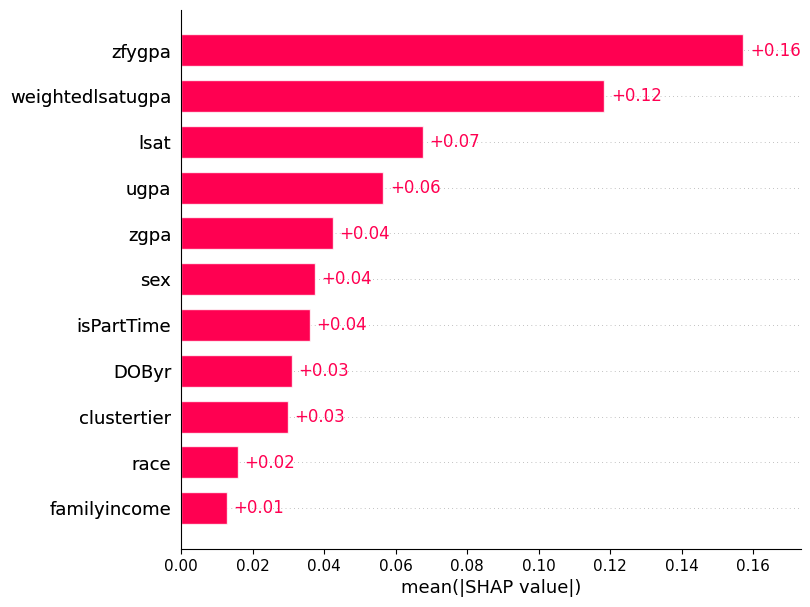

Permutation explainer: 501it [00:16, 12.08it/s]                                 


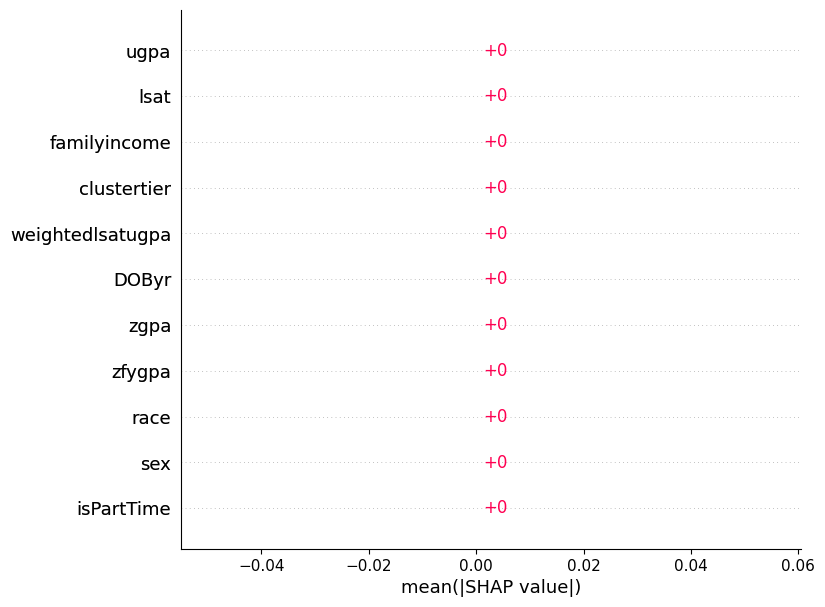

2023-02-27 16:59:05.635694: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 46192 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:b1:00.0, compute capability: 8.6
2023-02-27 16:59:05.635945: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 46192 MB memory:  -> device: 1, name: NVIDIA RTX A6000, pci bus id: 0000:d9:00.0, compute capability: 8.6
Permutation explainer: 501it [02:52,  2.72it/s]                                 


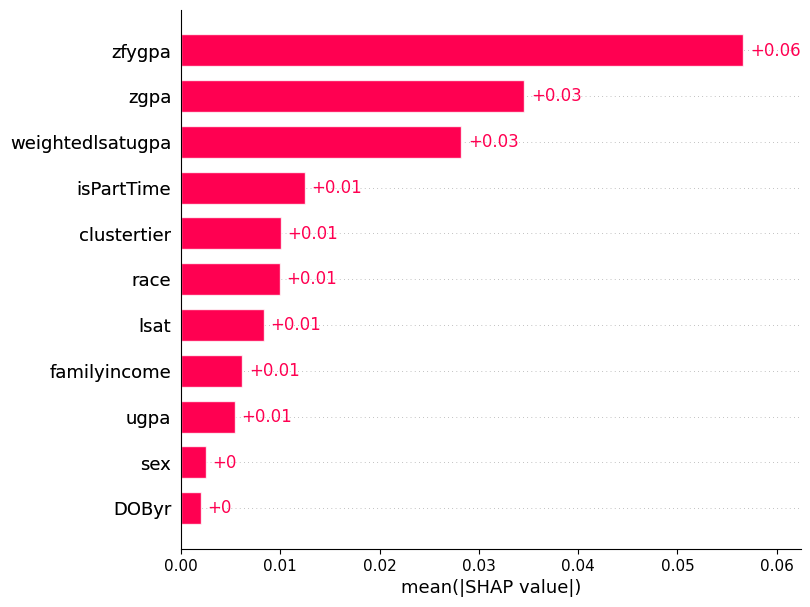

Permutation explainer: 501it [00:52,  7.66it/s]                                 


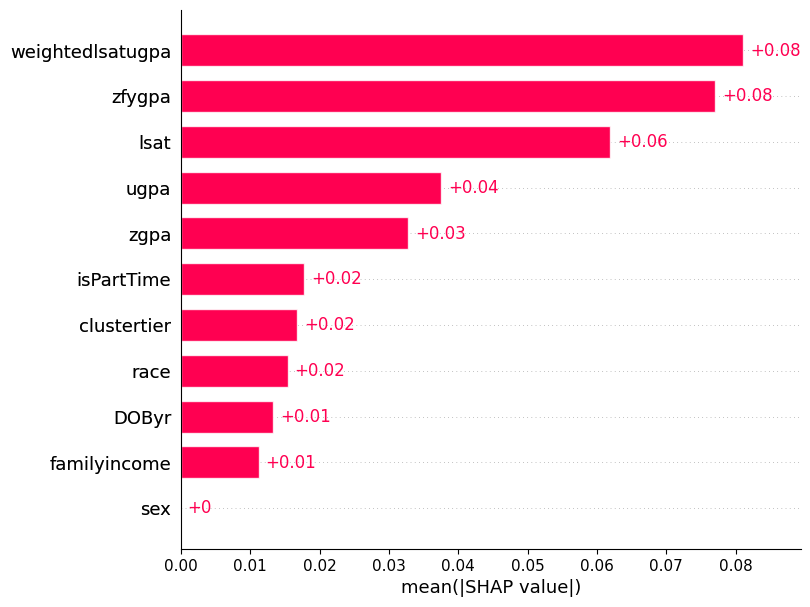

Permutation explainer: 501it [00:20, 12.41it/s]                                 


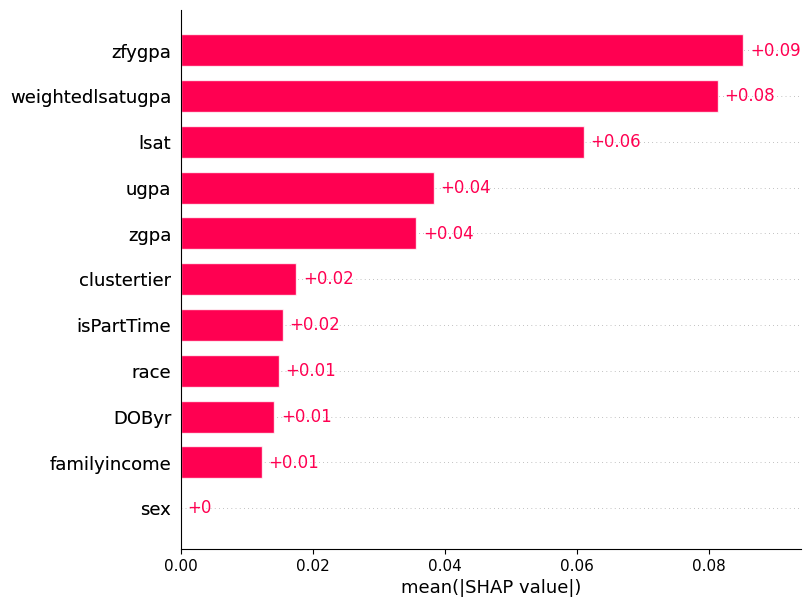

Permutation explainer: 501it [02:20,  3.27it/s]                                 


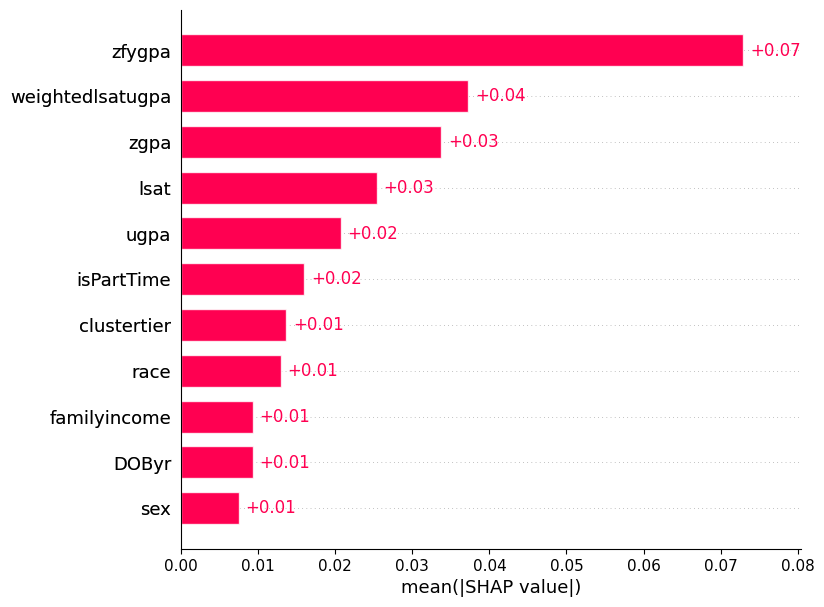

Permutation explainer: 501it [00:41,  9.21it/s]                                 


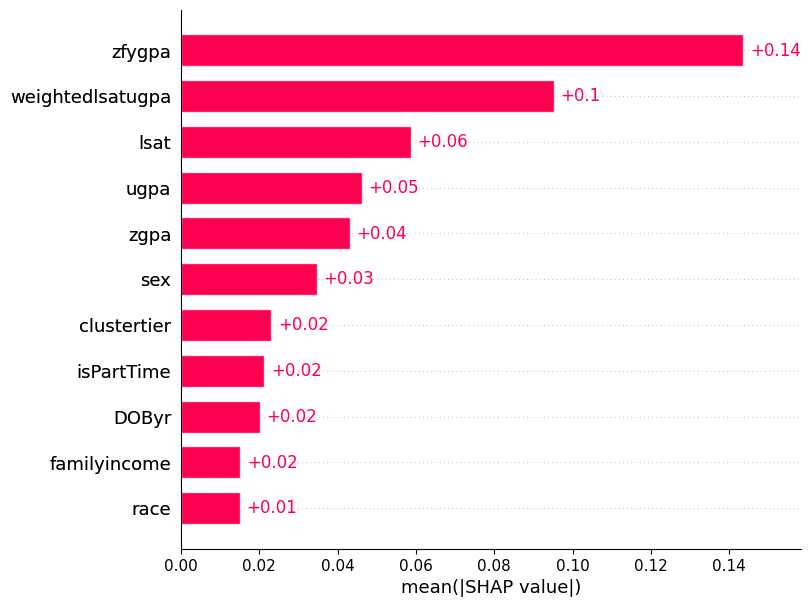

Permutation explainer: 501it [00:23, 12.23it/s]                                 


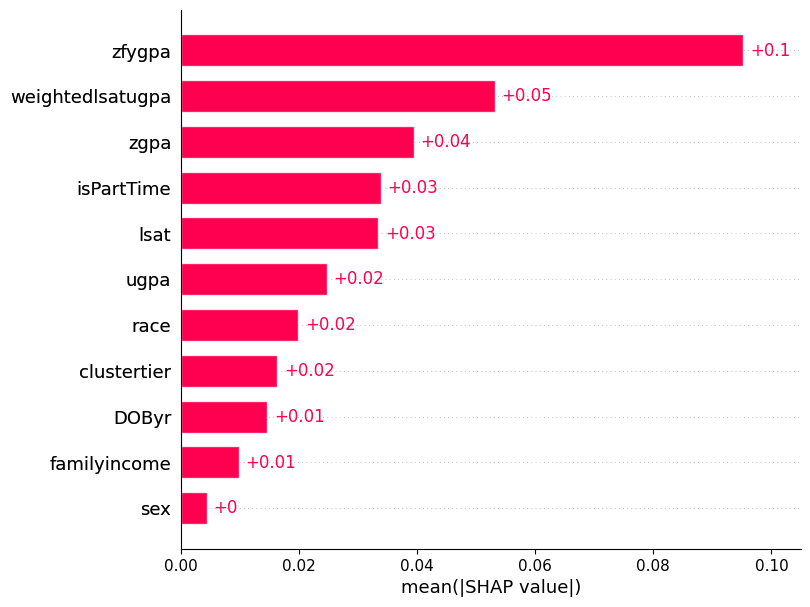

Permutation explainer: 501it [06:34,  1.24it/s]                                 


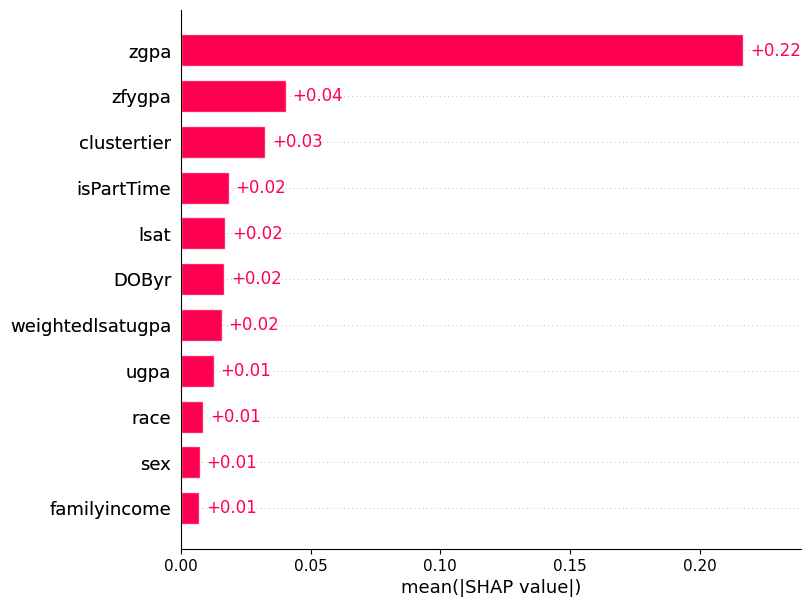

Permutation explainer: 501it [00:23, 12.18it/s]                                 


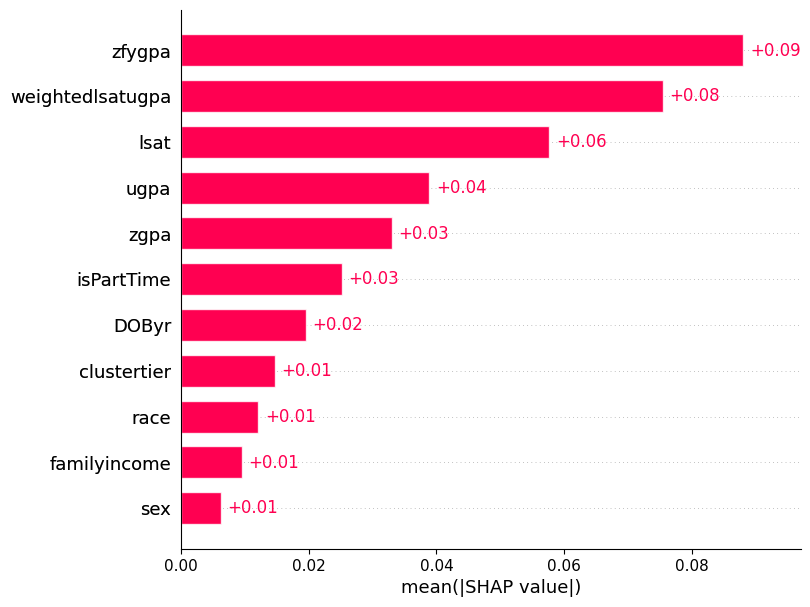

Permutation explainer: 501it [00:16, 12.13it/s]                                 


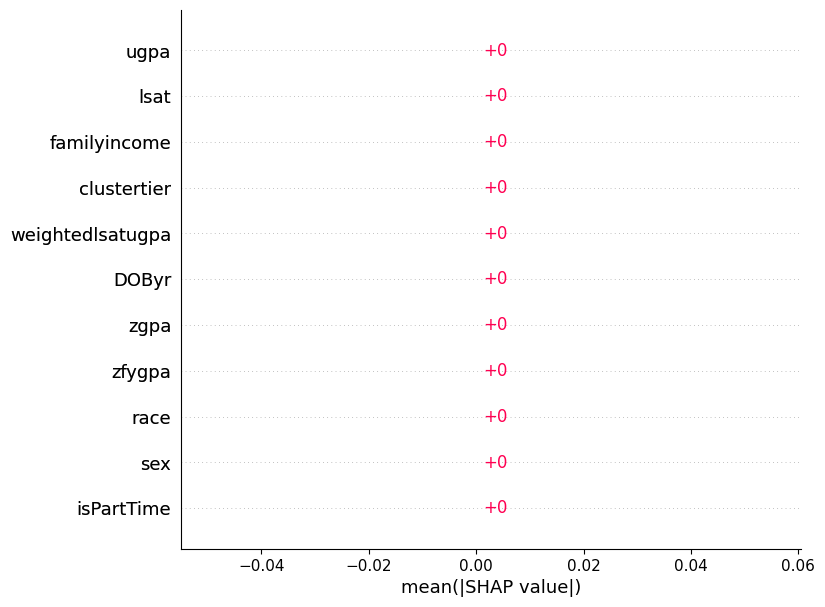

2023-02-27 17:15:27.468687: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 46192 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:b1:00.0, compute capability: 8.6
2023-02-27 17:15:27.468920: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 46192 MB memory:  -> device: 1, name: NVIDIA RTX A6000, pci bus id: 0000:d9:00.0, compute capability: 8.6
Permutation explainer: 501it [02:59,  2.56it/s]                                 


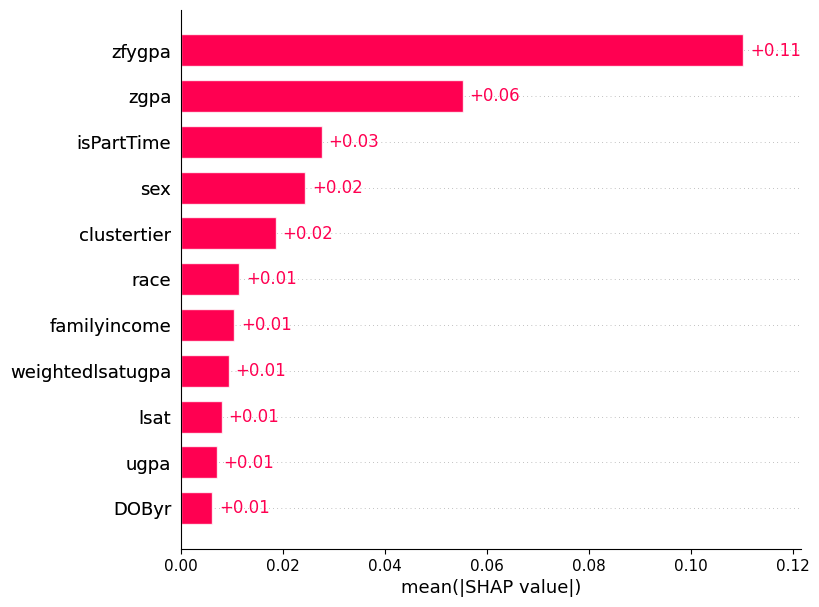

Permutation explainer: 501it [01:34,  4.57it/s]                                 


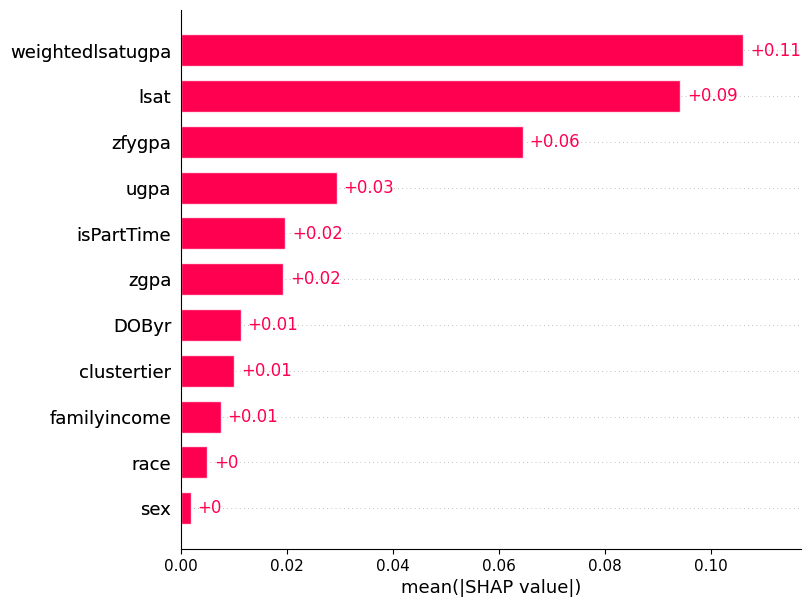

Permutation explainer: 501it [00:28, 11.33it/s]                                 


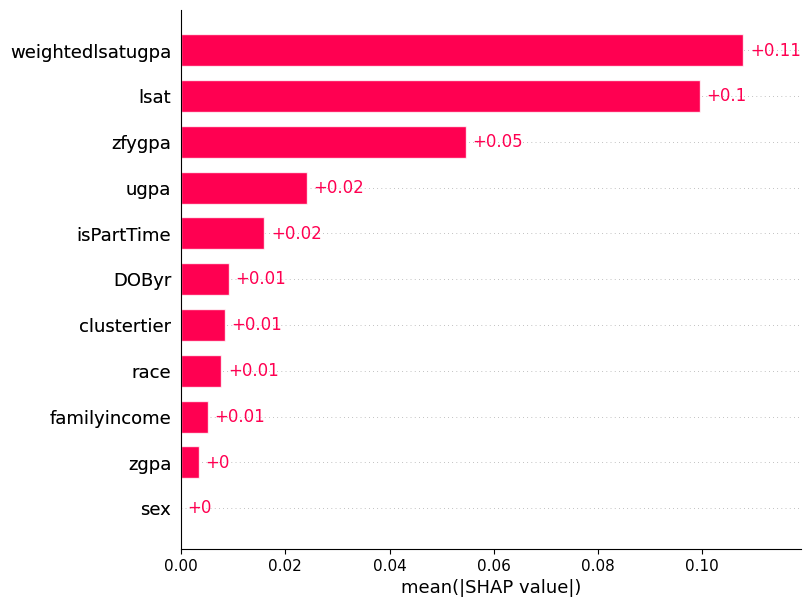

Permutation explainer: 501it [03:26,  2.30it/s]                                 


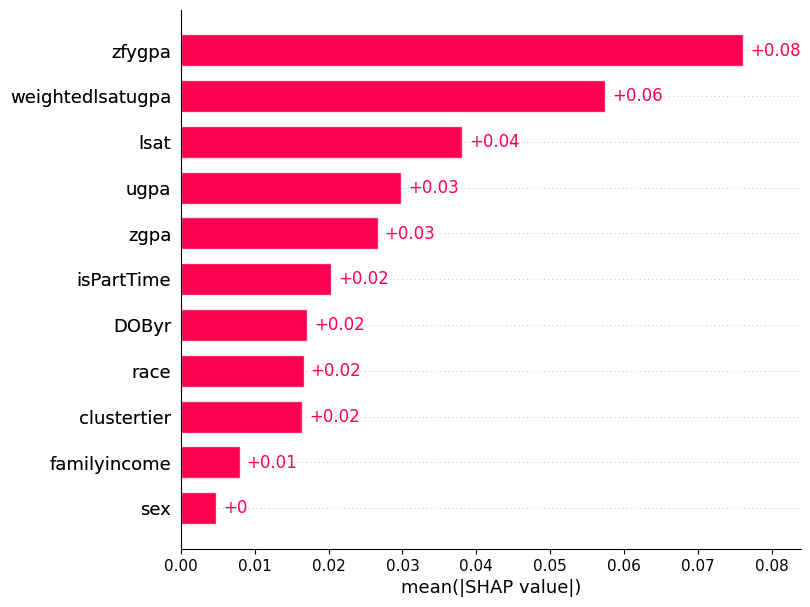

Permutation explainer: 501it [00:41,  9.17it/s]                                 


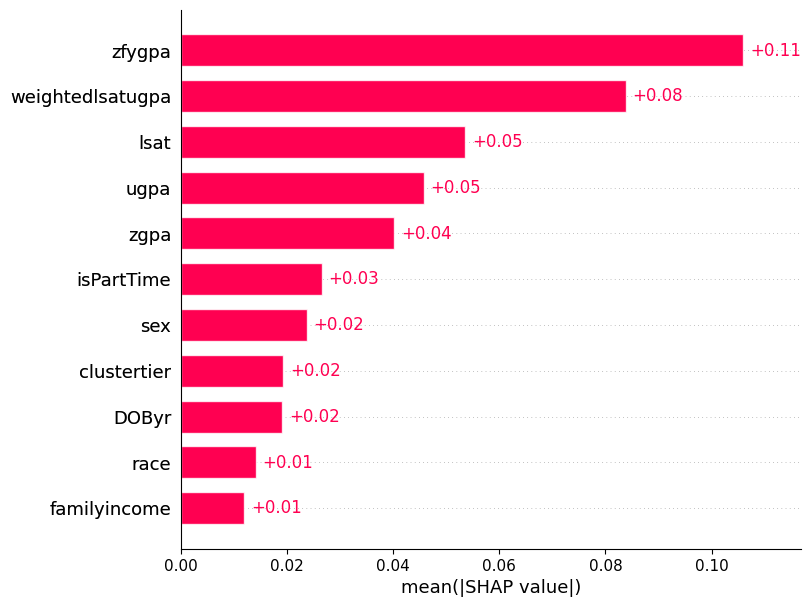

In [7]:
paths = {0:'data/datasets/law_school/',
         0.2:'data/datasets/law_school/synthetic/gender_flip_labels0.2_version0/',
         0.4:'data/datasets/law_school/synthetic/gender_flip_labels0.4_version0/',
         0.6:'data/datasets/law_school/synthetic/gender_flip_labels0.6_version0/',
         0.8:'data/datasets/law_school/synthetic/gender_flip_labels0.8_version0/'
        }

for frac in paths:
    path = paths[frac]
    
    gname = 'law_school'

    train_df = pd.read_csv(path+'train.csv',header=None)

    train_df.columns = ['zfygpa', 'zgpa', 'DOByr', 'weightedlsatugpa', 'clustertier',
           'familyincome', 'lsat', 'ugpa', 'isPartTime', 'sex', 'race',
           'pass_bar']


    train_df.index = train_df['sex']

    train_df = train_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

    test_df = pd.read_csv(path+'test.csv',header=None)

    test_df.columns = ['zfygpa', 'zgpa', 'DOByr', 'weightedlsatugpa', 'clustertier',
           'familyincome', 'lsat', 'ugpa', 'isPartTime', 'sex', 'race',
           'pass_bar']


    test_df.index = test_df['sex']

    test_df = test_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)



    X_train = train_df.drop(['pass_bar'],axis=1)
    X_test = test_df.drop(['pass_bar'],axis=1)

    y_train = pd.Series(train_df['pass_bar'])
    y_test = pd.Series(test_df['pass_bar'])

    y_train = pd.Series(y_train.factorize(sort=True)[0], index=y_train.index)
    y_test = pd.Series(y_test.factorize(sort=True)[0], index=y_test.index)

    X_merged = pd.concat([X_train,X_test])

    ohe = make_column_transformer(
        (OneHotEncoder(sparse=False), X_merged.dtypes == 'object'),
        remainder='passthrough', verbose_feature_names_out=False)

    X_merged_temp  = pd.DataFrame(ohe.fit_transform(X_merged), columns=ohe.get_feature_names_out(), index=X_merged.index)

    X_train  = pd.DataFrame(ohe.transform(X_train), columns=ohe.get_feature_names_out(), index=X_train.index)
    X_test = pd.DataFrame(ohe.transform(X_test), columns=ohe.get_feature_names_out(), index=X_test.index)

    lr = LogisticRegression(solver='liblinear')
    lr.fit(X_train, y_train)
    
    name = gname+'_baseline_'+str(frac)
    dothings(X_test,lr,name)

    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    
    name = gname+'_randomforest_'+str(frac)
    dothings(X_test,rf,name)
    
    rew = ReweighingMeta(estimator=LogisticRegression(solver='liblinear'),
                     reweigher=Reweighing('sex'))
    params = {'estimator__C': [1, 10]}

    clf = GridSearchCV(rew, params, scoring='accuracy', cv=5)
    clf.fit(X_train, y_train)
    
    name = gname+'_adv_rew_'+str(frac)
    dothings(X_test,clf,name)
    
    LFR = LearnedFairRepresentations(prot_attr='sex')
    LFR.fit(X_train, y_train)
    
    name = gname+'_lfr_'+str(frac)
    dothings(X_test,LFR,name)
    
    adv_deb = AdversarialDebiasing(prot_attr='sex')
    adv_deb.fit(X_train, y_train)
    
    name = gname+'_adv_deb_'+str(frac)
    dothings(X_test,adv_deb,name)
    
    EGR = ExponentiatedGradientReduction(prot_attr=['sex_Female','sex_Male'], estimator=LogisticRegression(solver='liblinear'), constraints = 'EqualizedOdds')
    EGR.fit(X_train, y_train)
    
    name = gname+'_egr_'+str(frac)
    dothings(X_test,EGR,name)
    
    GSR = GridSearchReduction(prot_attr=['sex_Female','sex_Male'], estimator=LogisticRegression(solver='liblinear'), constraints = 'EqualizedOdds')
    GSR.fit(X_train, y_train)
    
    name = gname+'_gsr_'+str(frac)
    dothings(X_test,GSR,name)
    
    X_train_temp = X_train.set_index(['sex_Male'], drop = False)
    y_train_temp = y_train.copy()
    y_train_temp.index = X_train_temp.index

    X_test_temp = X_test.set_index(['sex_Male'], drop = False)
    y_test_temp = y_test.copy()
    y_test_temp.index = X_test_temp.index
    
    cal_eq_odds = CalibratedEqualizedOdds(prot_attr='sex_Male', cost_constraint='weighted')
    postproc = PostProcessingMeta(estimator=LogisticRegression(solver='liblinear'), postprocessor=cal_eq_odds)
    postproc.fit(X_train_temp, y_train_temp)
    
    name = gname+'_caleq_'+str(frac)
    dothings3(X_test_temp,postproc,name)
    
    rocv = PostProcessingMeta(LogisticRegression(solver='liblinear'), RejectOptionClassifierCV('sex_Male', scoring='average_odds'))
    rocv.fit(X_train_temp, y_train_temp)
    
    name = gname+'_rocv_'+str(frac)
    dothings3(X_test_temp,rocv,name)

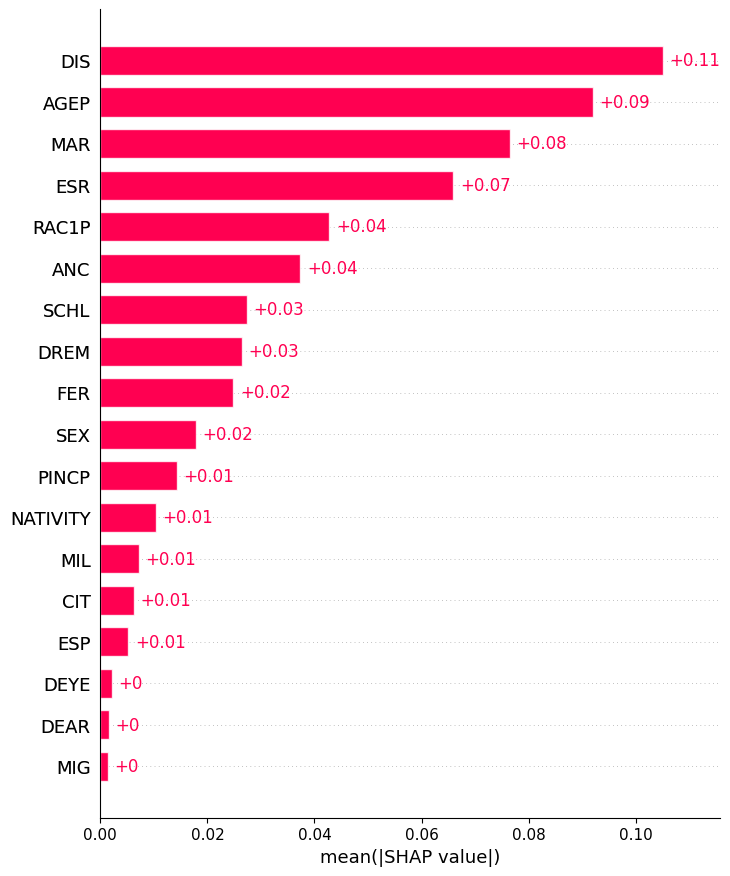

Permutation explainer: 501it [03:06,  2.54it/s]                                 


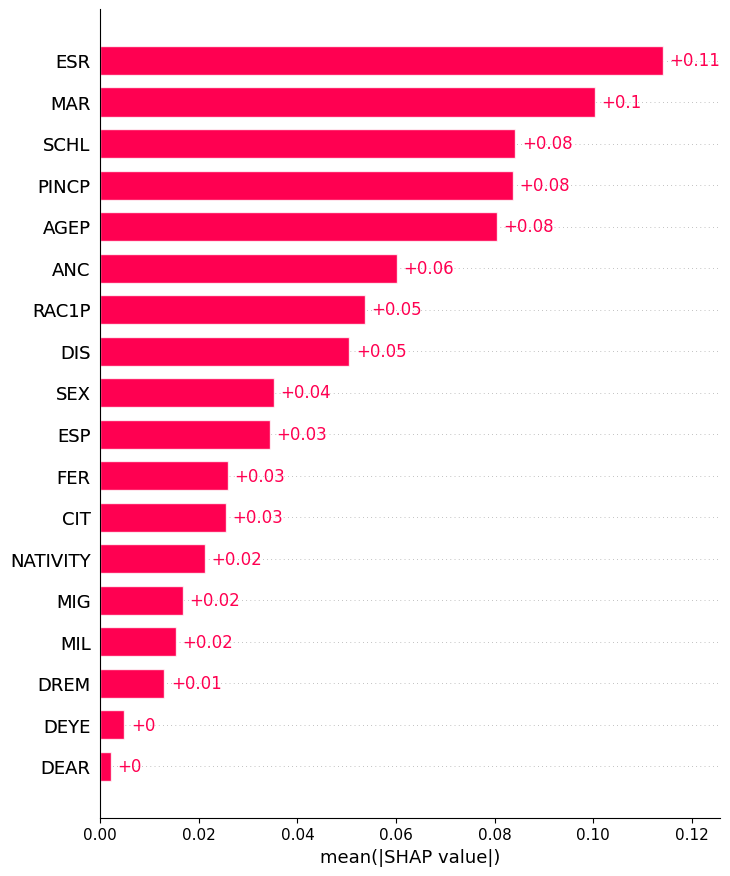

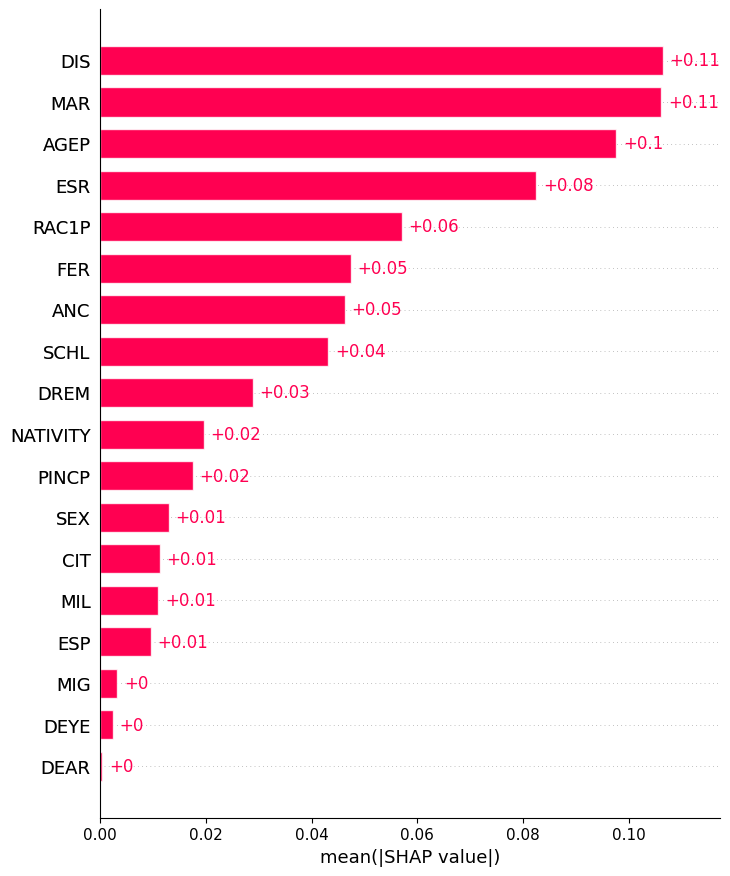

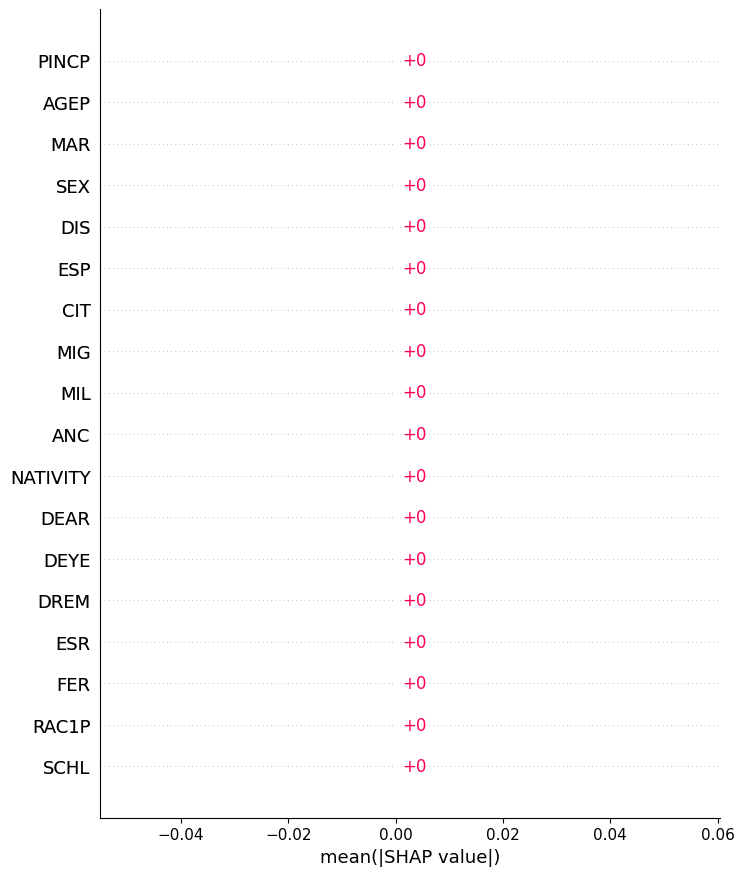

2023-02-20 12:21:01.142603: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 46192 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:b1:00.0, compute capability: 8.6
2023-02-20 12:21:01.142831: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 46192 MB memory:  -> device: 1, name: NVIDIA RTX A6000, pci bus id: 0000:d9:00.0, compute capability: 8.6
Permutation explainer: 501it [01:08,  6.21it/s]                                 


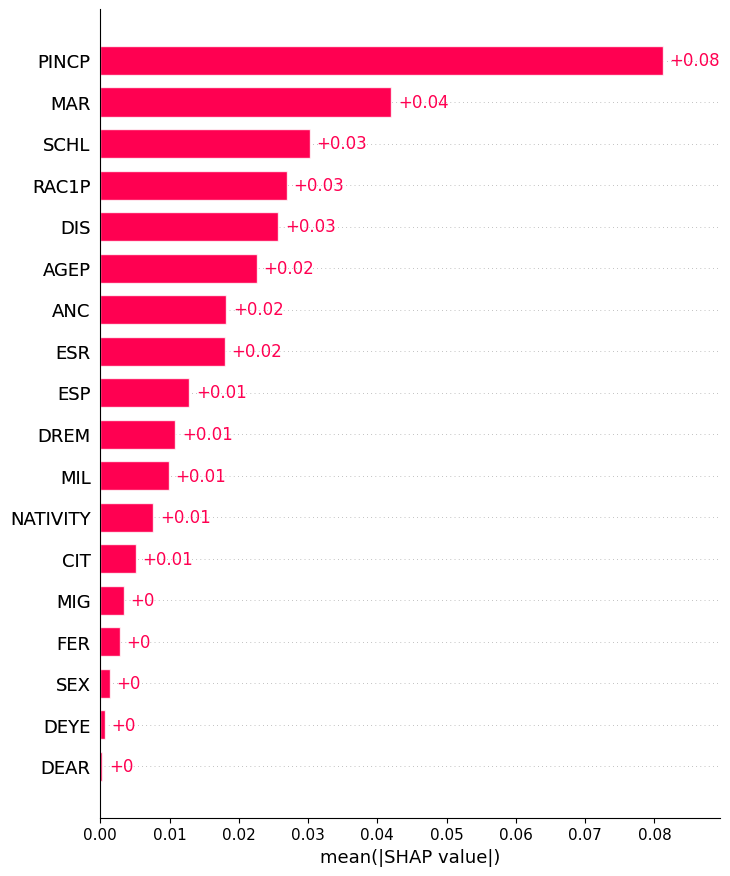

Permutation explainer: 501it [00:24, 11.39it/s]                                 


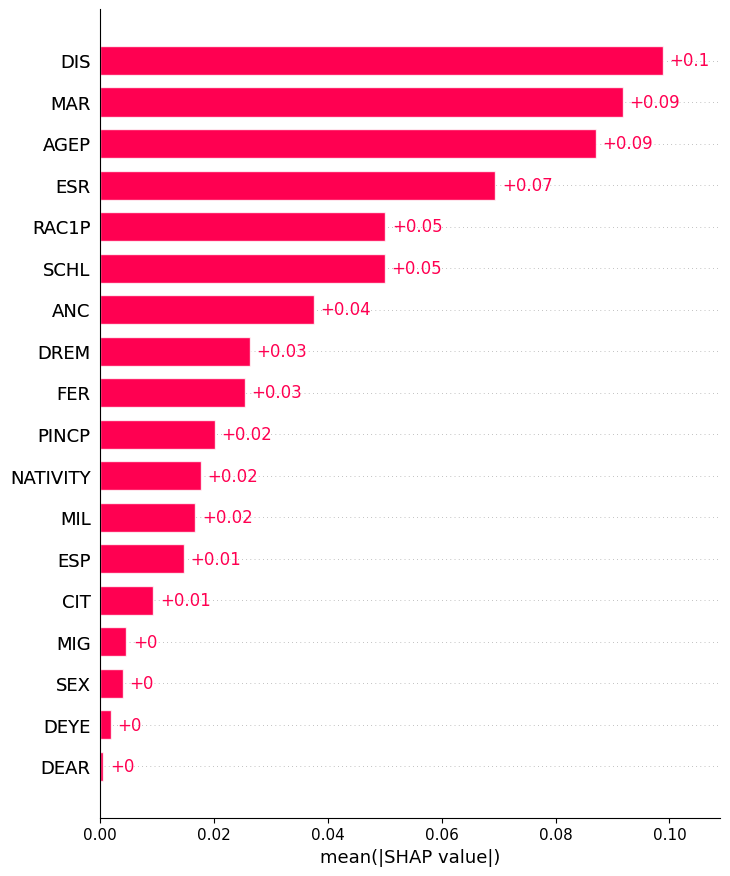

Permutation explainer: 501it [00:17, 12.03it/s]                                 


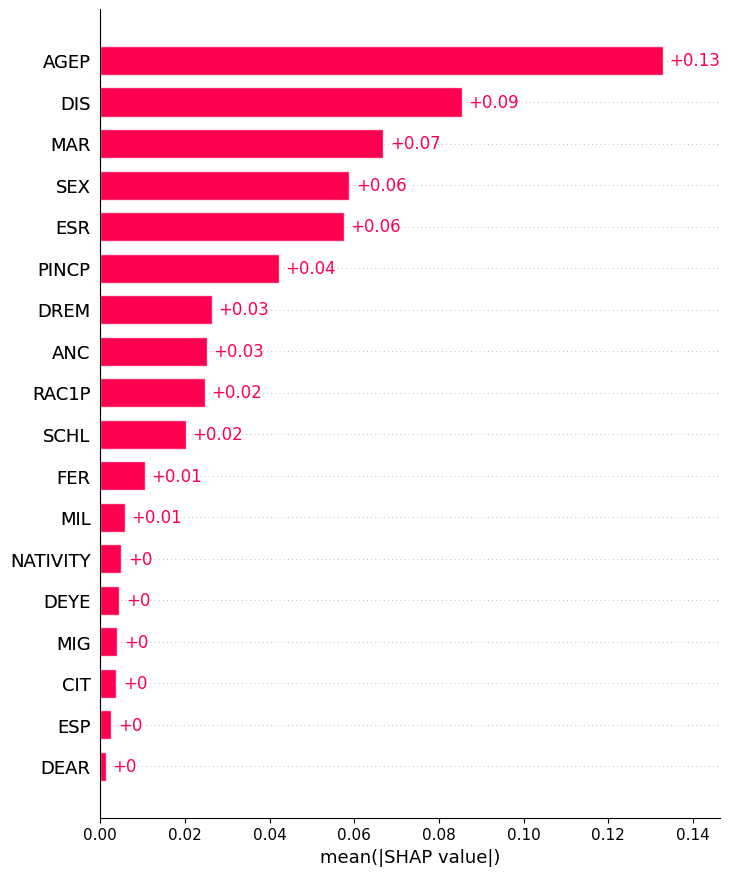

Permutation explainer: 501it [00:11,  6.44it/s]                                 


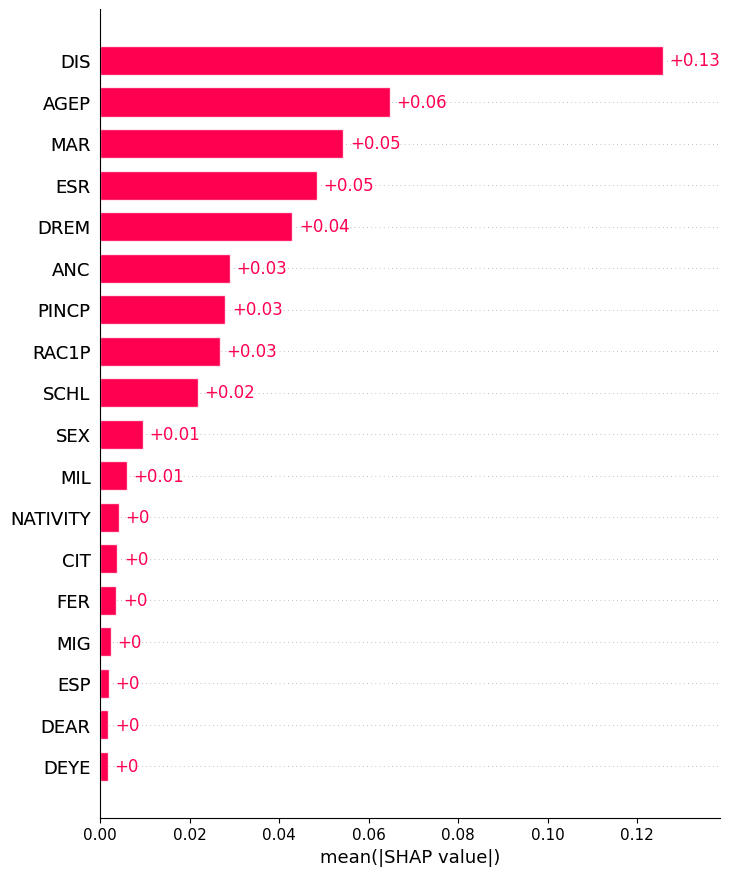

Permutation explainer: 501it [03:09,  2.50it/s]                                 


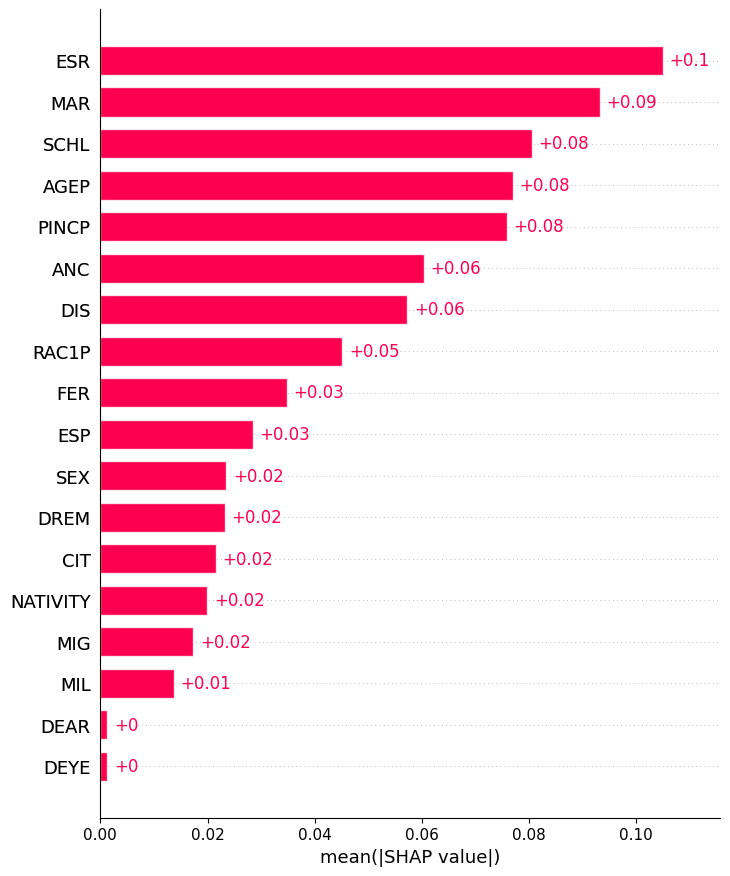

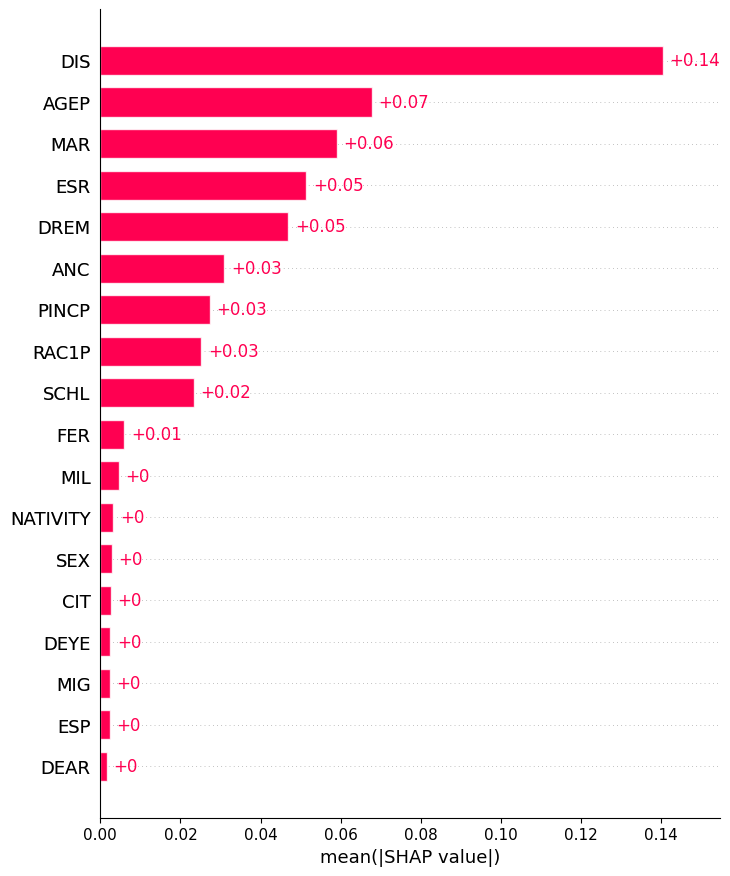

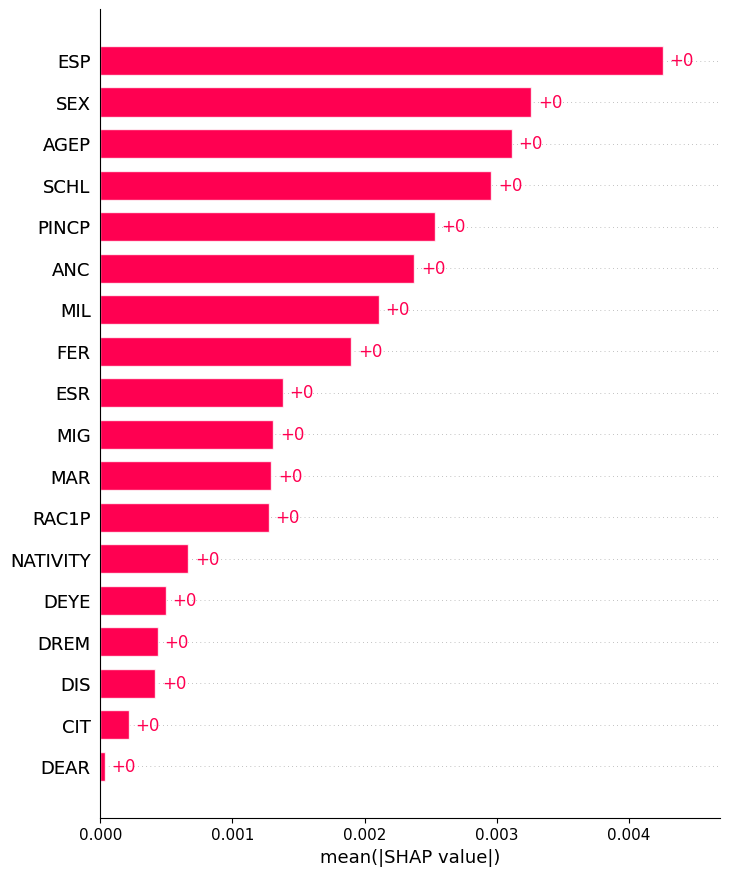

2023-02-20 12:35:26.355058: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 46192 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:b1:00.0, compute capability: 8.6
2023-02-20 12:35:26.355299: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 46192 MB memory:  -> device: 1, name: NVIDIA RTX A6000, pci bus id: 0000:d9:00.0, compute capability: 8.6
Permutation explainer: 501it [01:07,  6.32it/s]                                 


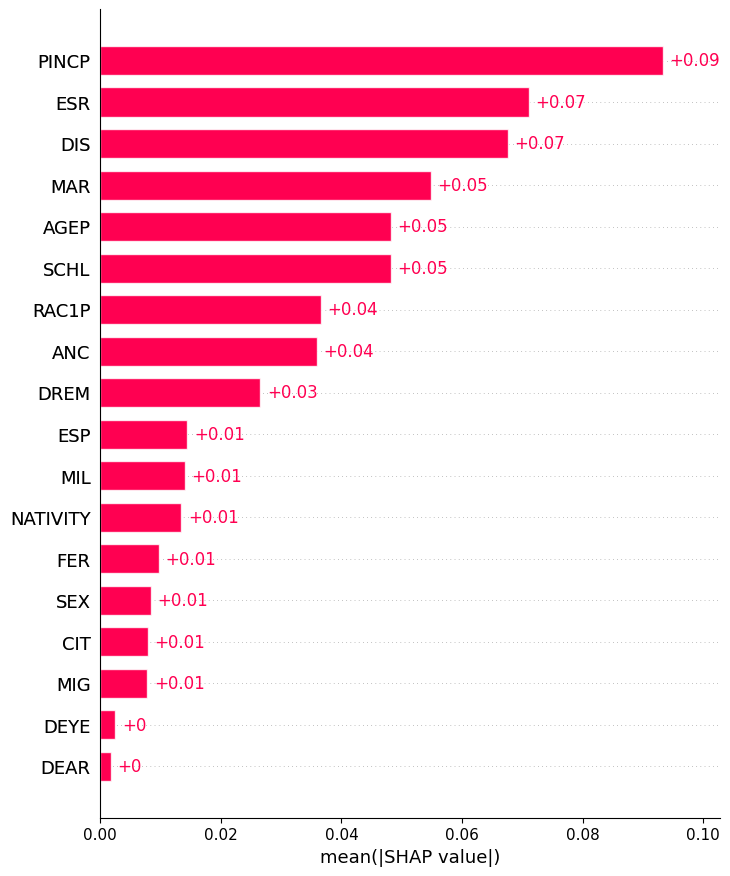

Permutation explainer: 501it [00:23, 12.24it/s]                                 


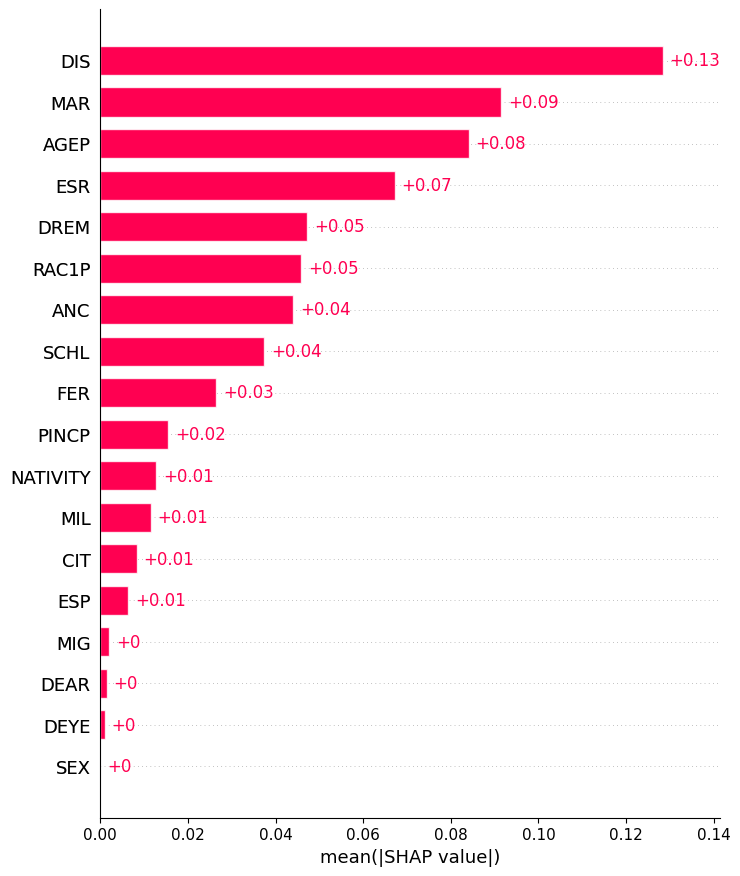

Permutation explainer: 501it [00:13, 10.02it/s]                                 


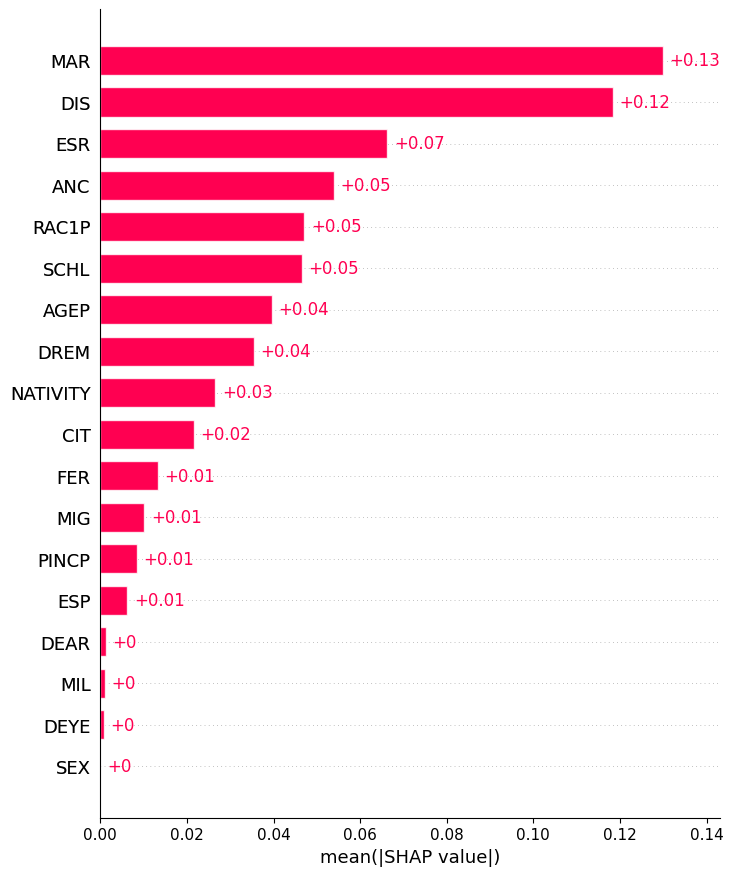

Permutation explainer: 501it [00:14, 12.28it/s]                                 


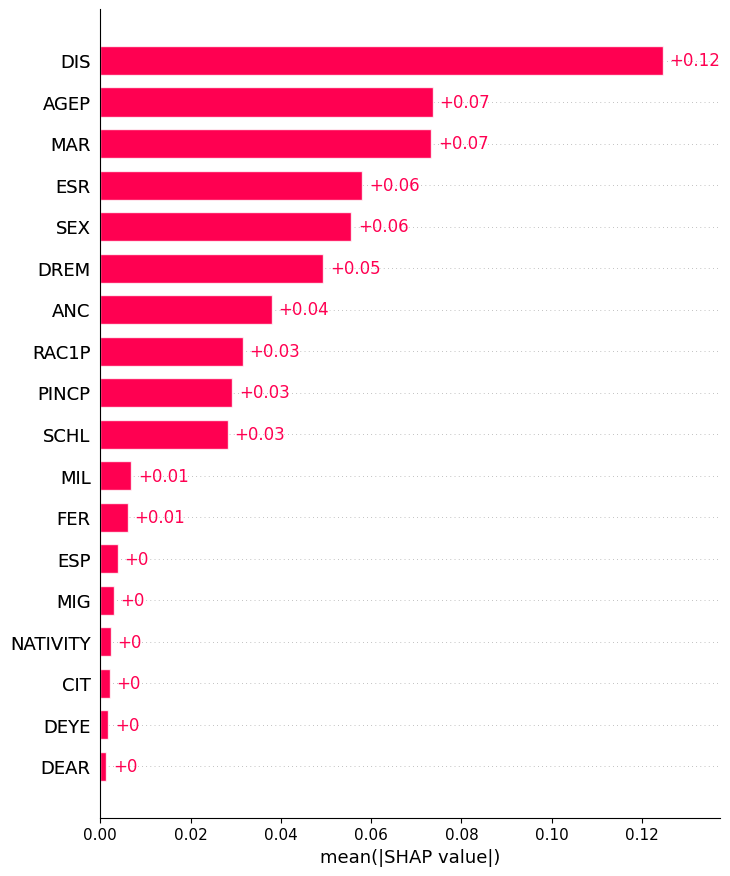

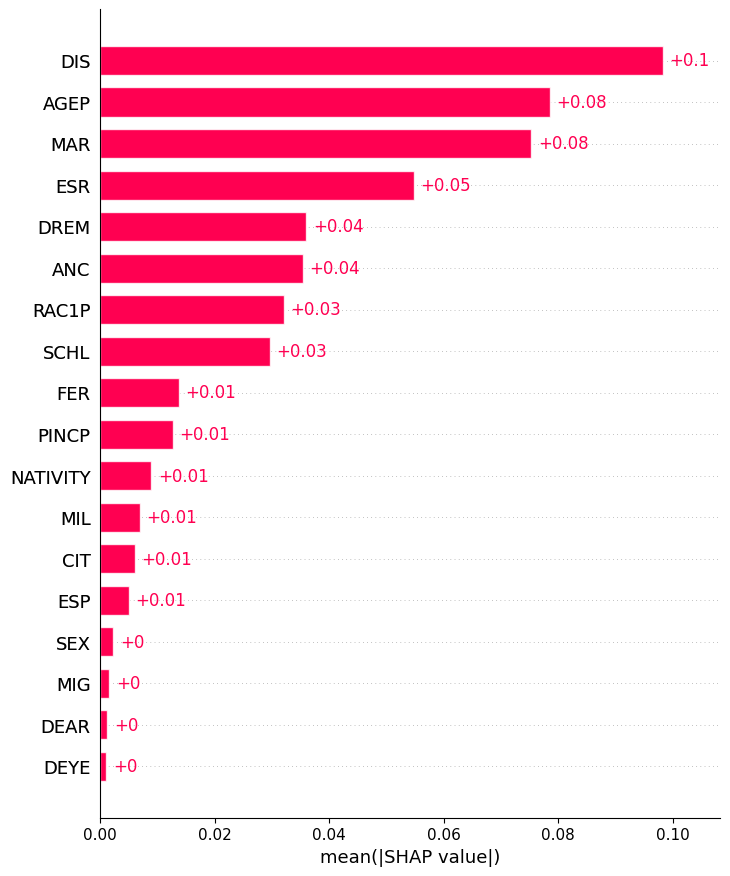

Permutation explainer: 501it [03:07,  2.52it/s]                                 


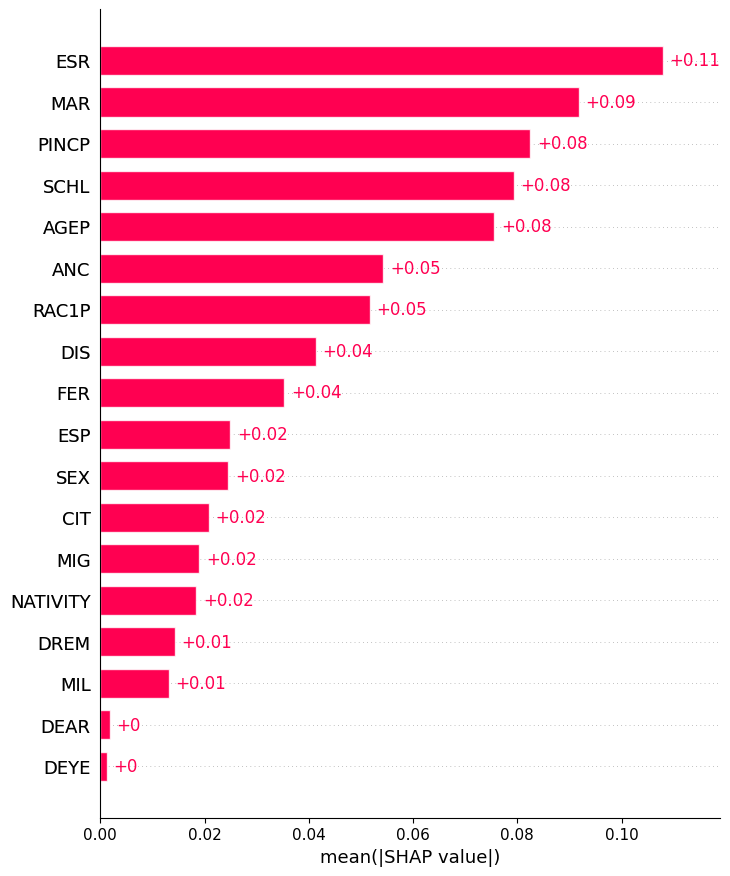

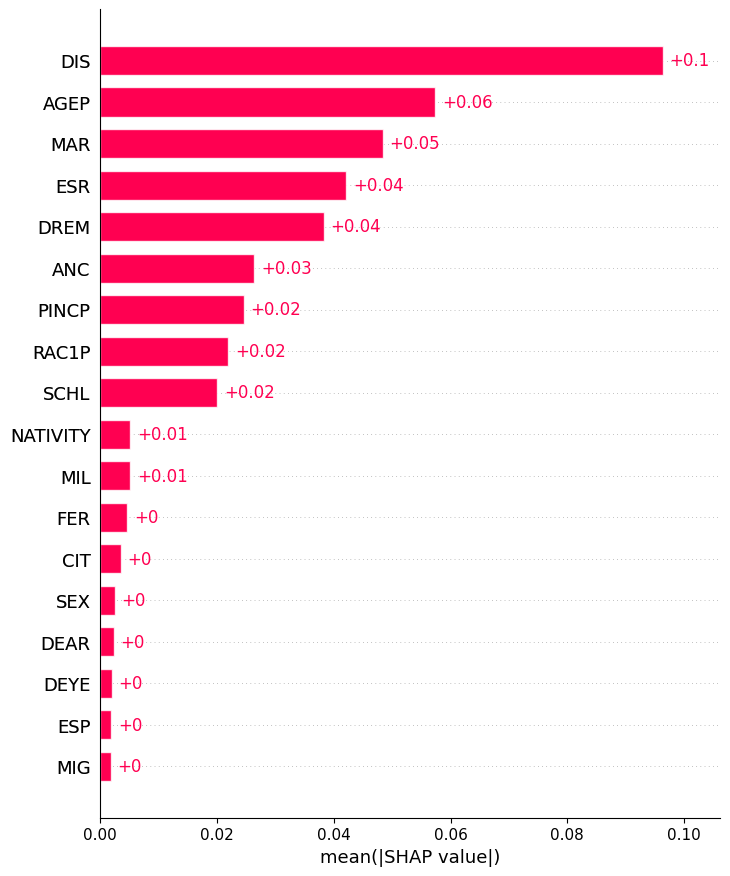

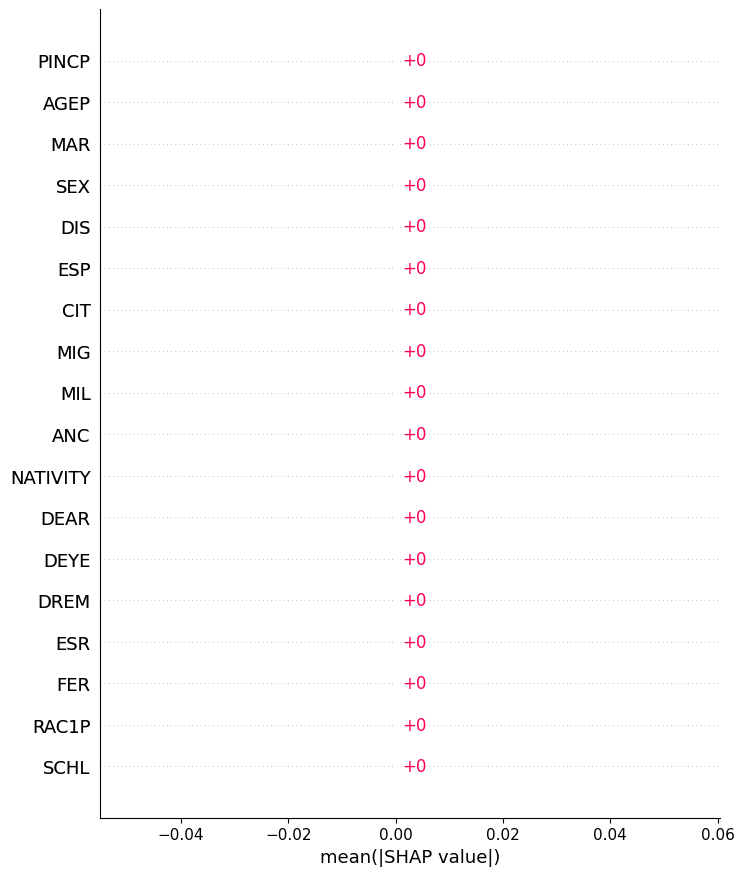

2023-02-20 12:49:21.444273: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 46192 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:b1:00.0, compute capability: 8.6
2023-02-20 12:49:21.444495: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 46192 MB memory:  -> device: 1, name: NVIDIA RTX A6000, pci bus id: 0000:d9:00.0, compute capability: 8.6
Permutation explainer: 501it [01:01,  6.90it/s]                                 


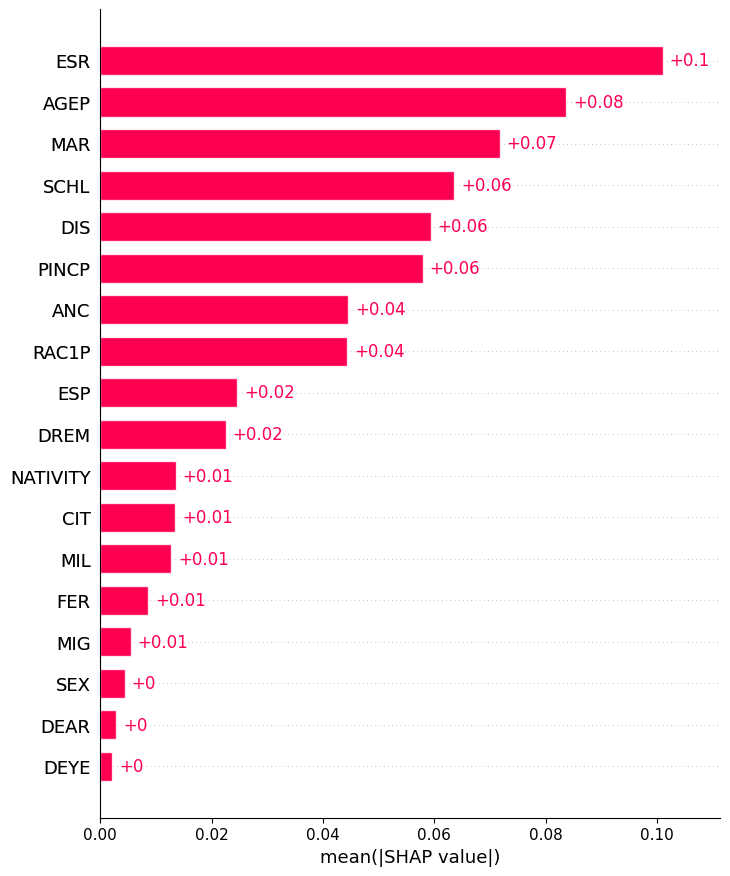

Permutation explainer: 501it [00:16, 11.71it/s]                                 


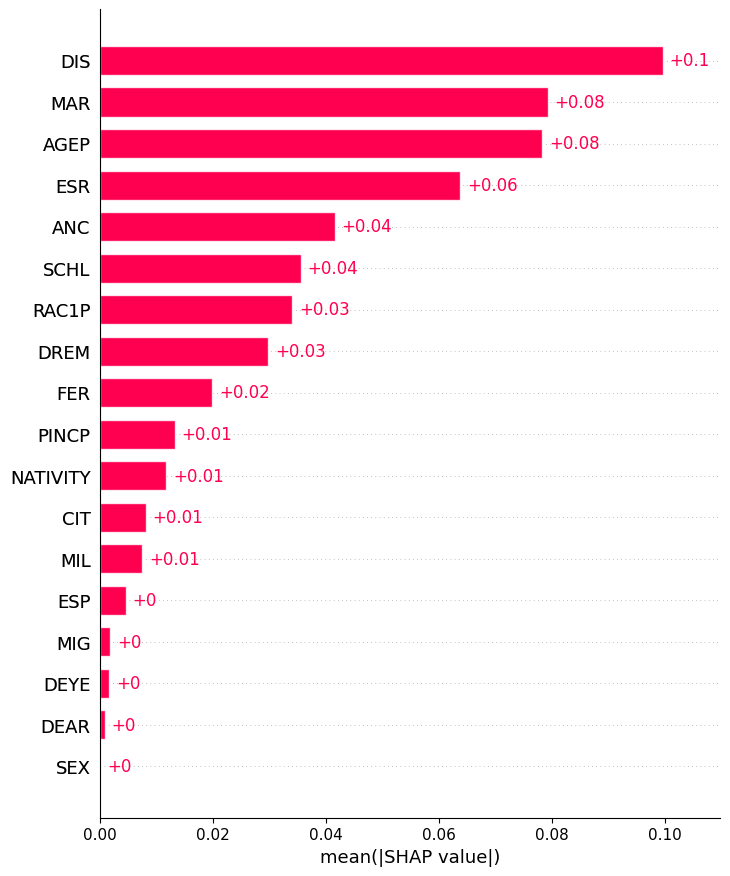

Permutation explainer: 501it [00:14, 10.11it/s]                                 


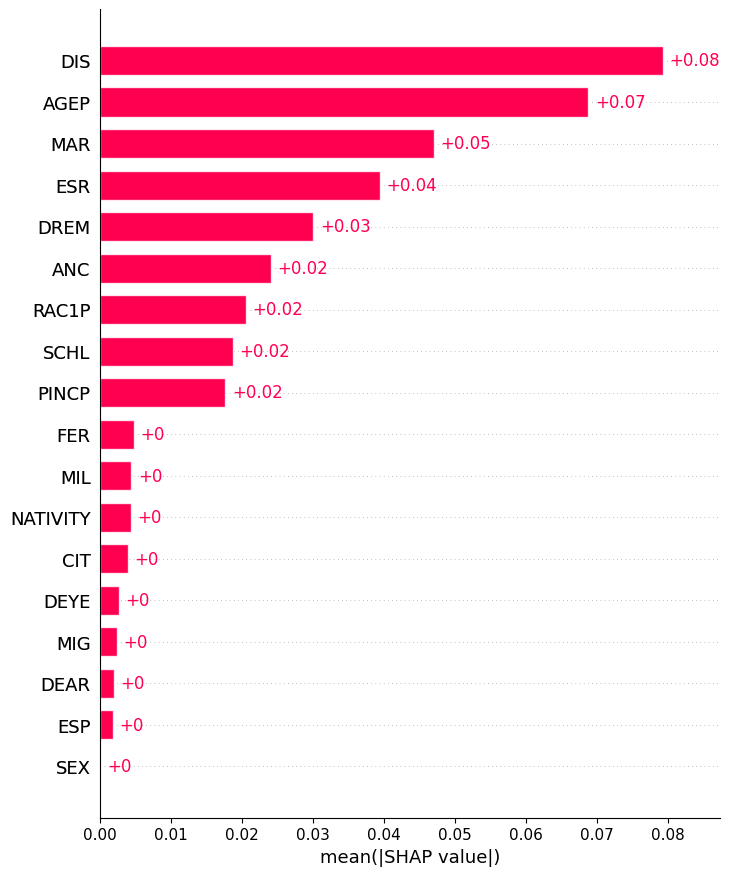

Permutation explainer: 501it [01:12,  5.98it/s]                                 


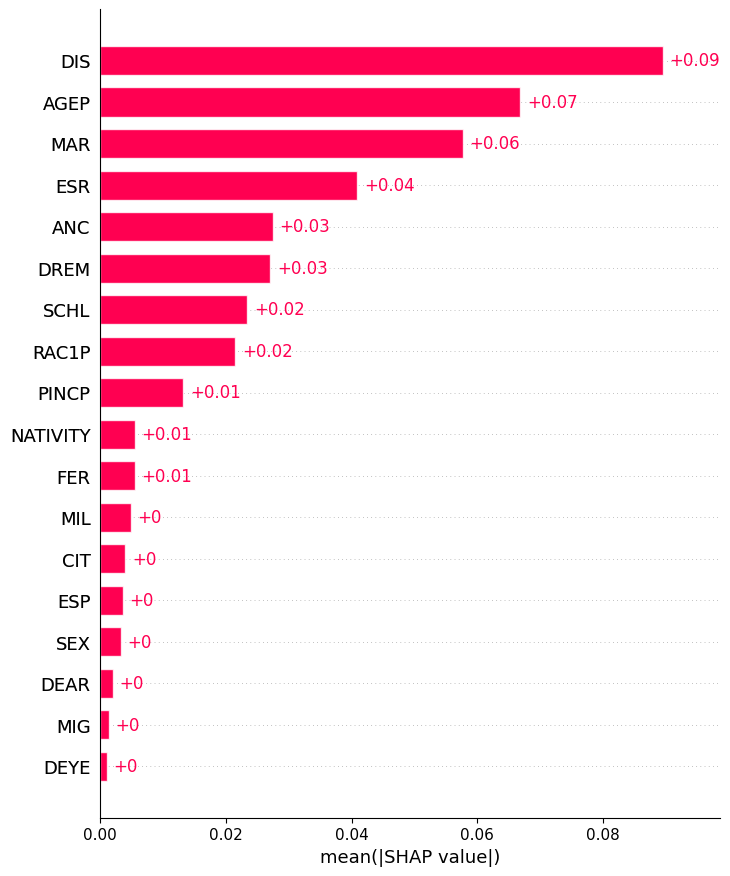

Permutation explainer: 501it [00:17, 12.17it/s]                                 


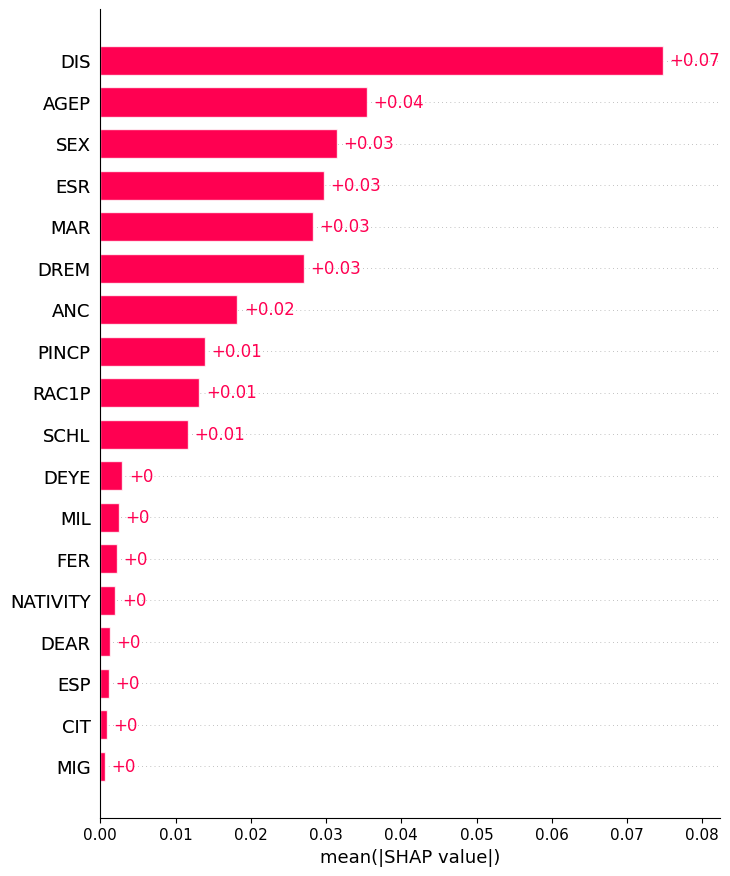

Permutation explainer: 501it [00:11,  5.42it/s]                                 


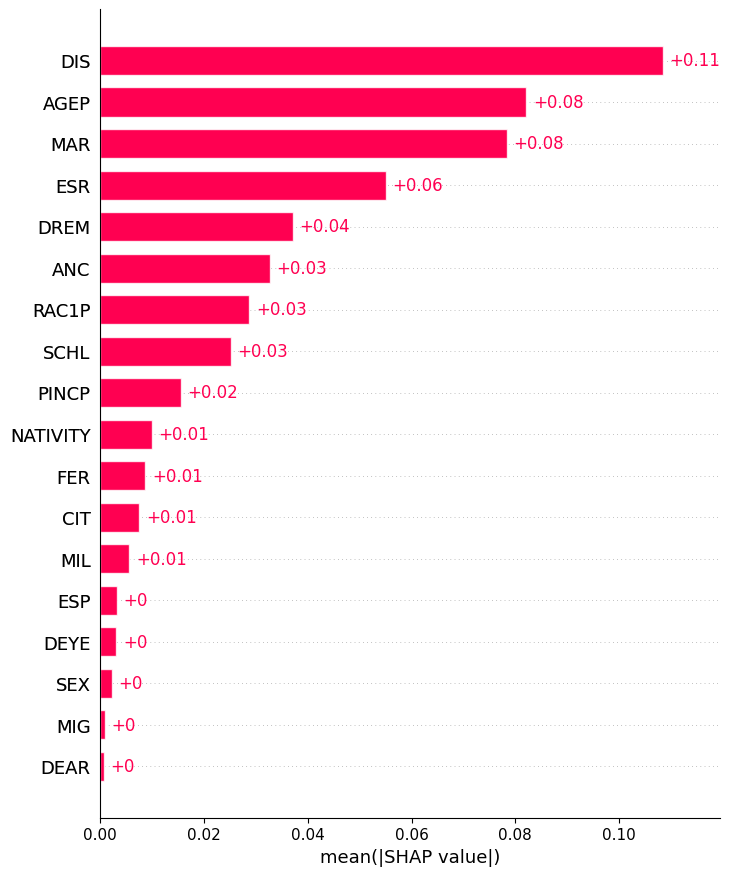

Permutation explainer: 501it [03:08,  2.52it/s]                                 


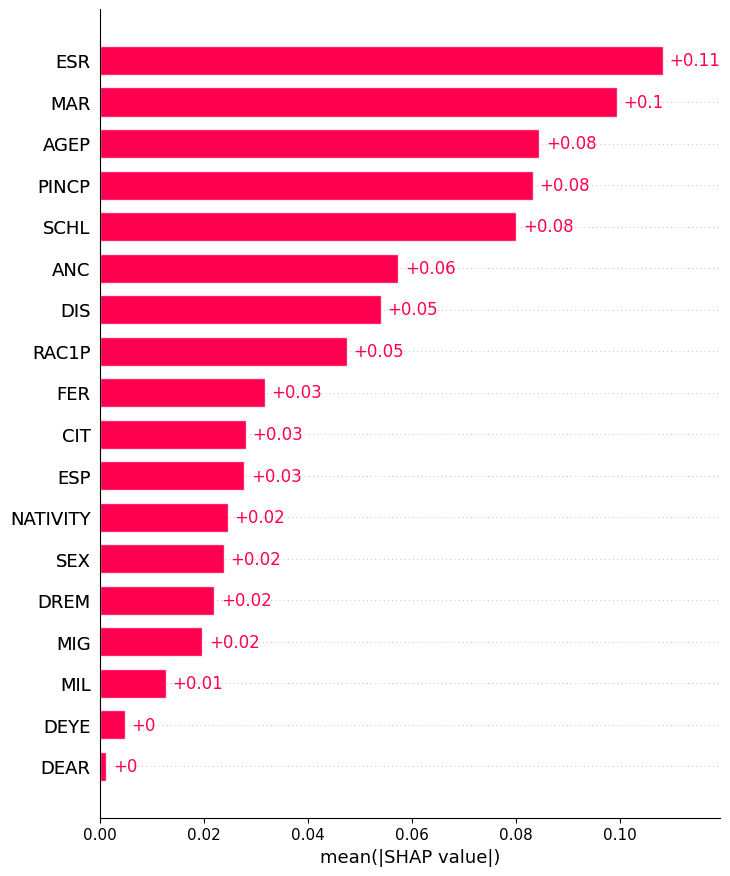

Permutation explainer: 501it [00:11,  5.86it/s]                                 


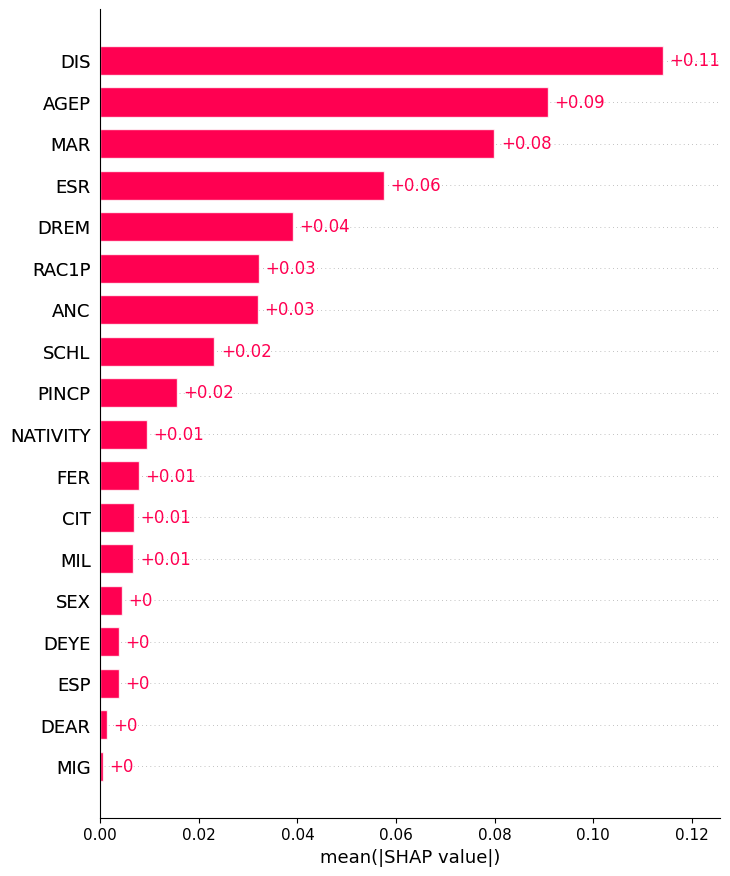

Permutation explainer: 501it [00:10,  2.10it/s]                                 


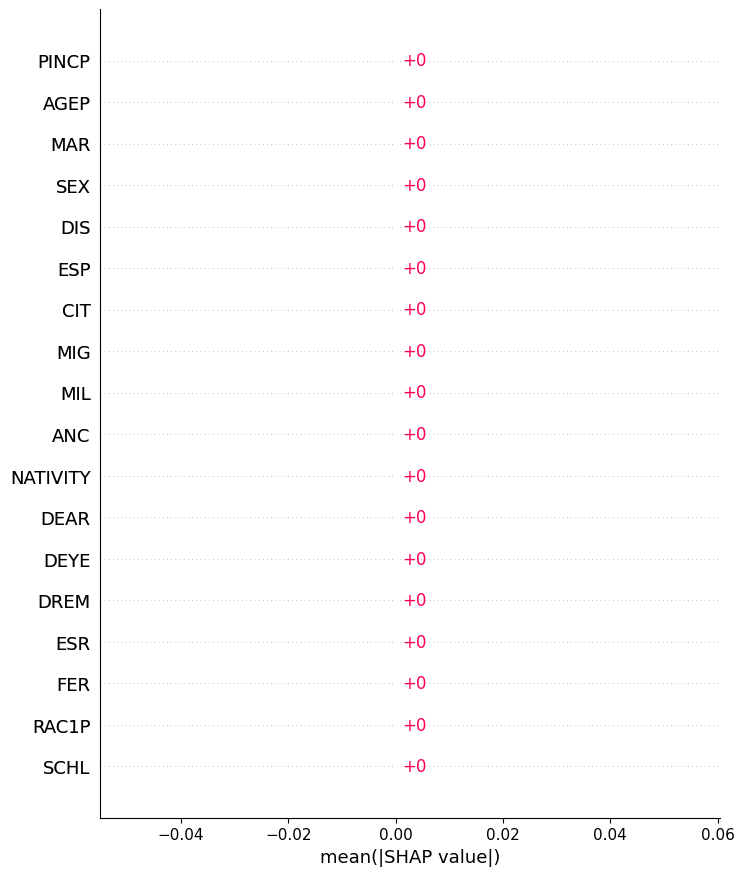

2023-02-20 13:03:45.594357: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 46192 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:b1:00.0, compute capability: 8.6
2023-02-20 13:03:45.594575: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 46192 MB memory:  -> device: 1, name: NVIDIA RTX A6000, pci bus id: 0000:d9:00.0, compute capability: 8.6
Permutation explainer: 501it [01:05,  6.30it/s]                                 


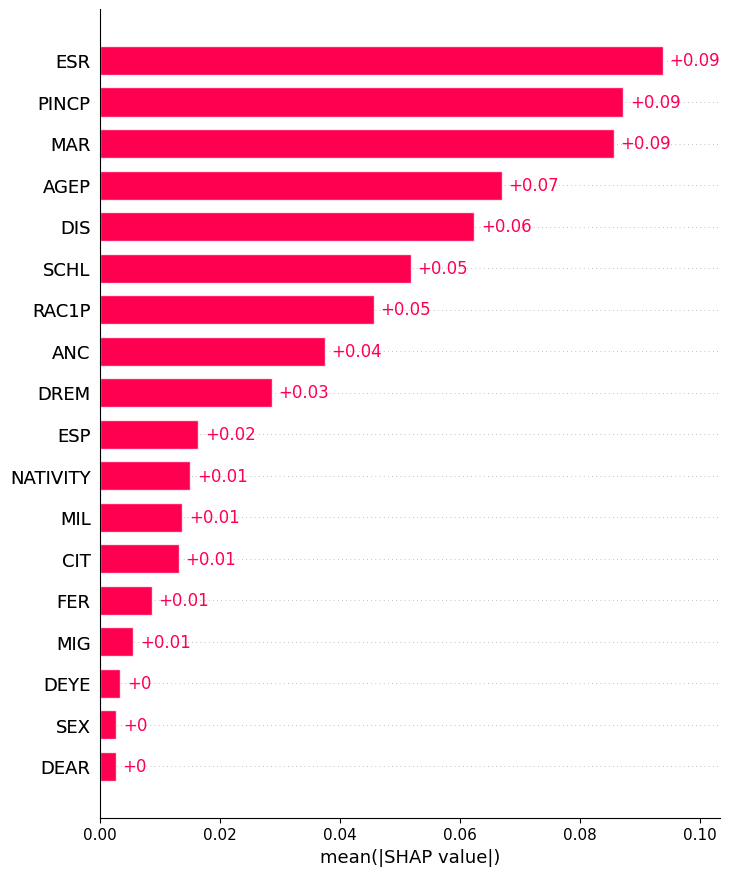

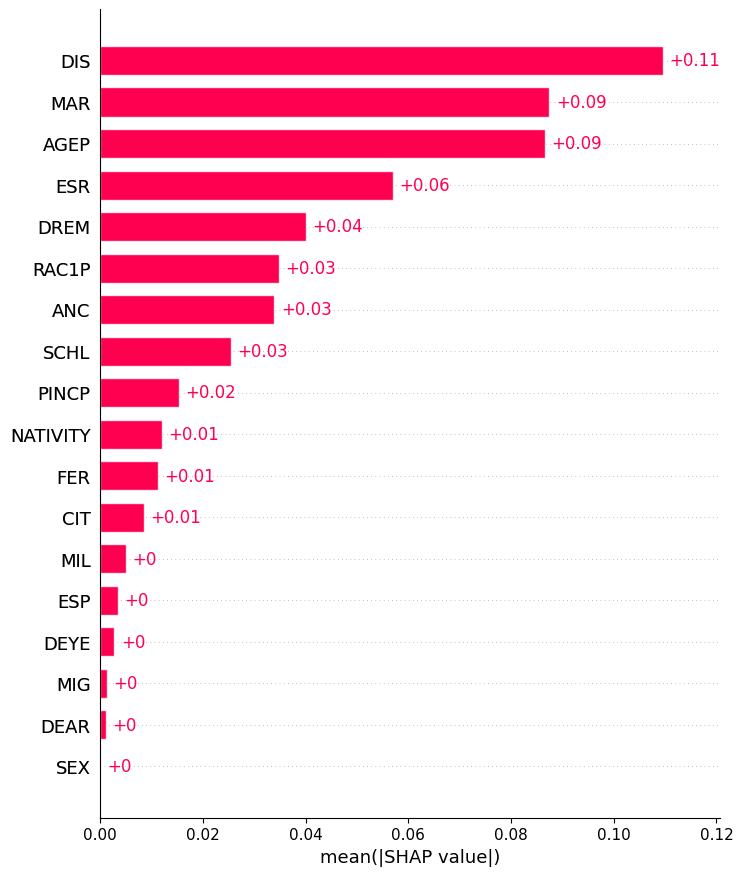

Permutation explainer: 501it [01:01,  6.19it/s]                                 


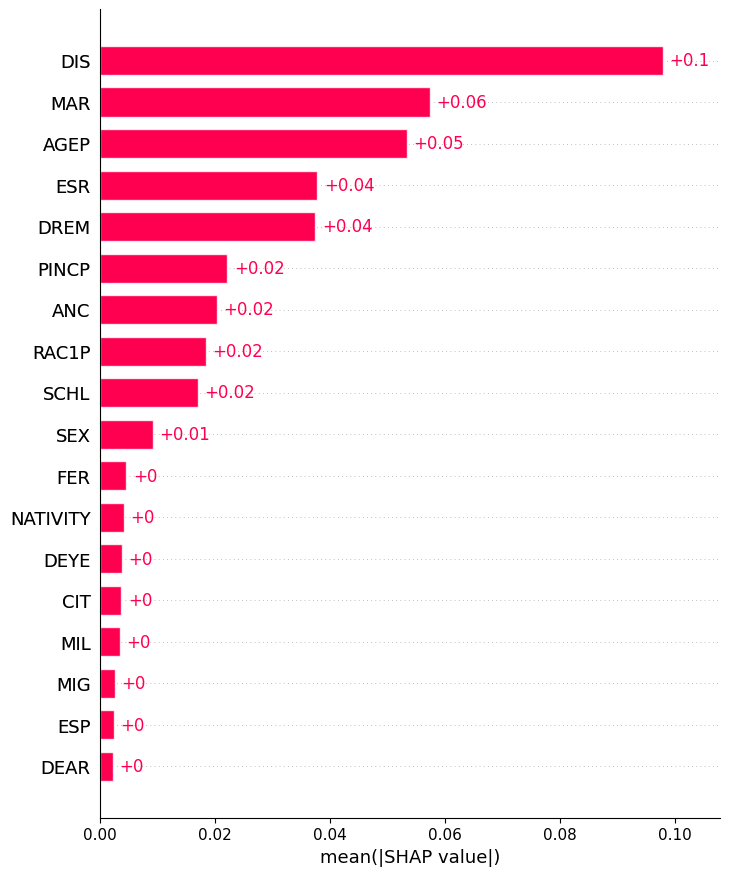

Permutation explainer: 501it [00:17, 12.00it/s]                                 


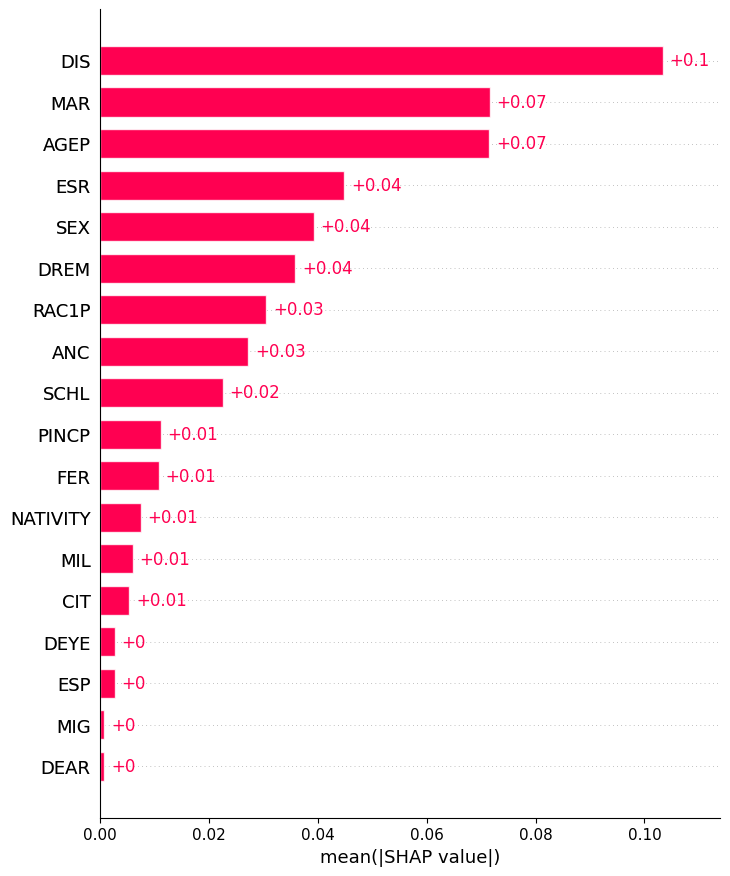

Permutation explainer: 501it [00:11,  5.50it/s]                                 


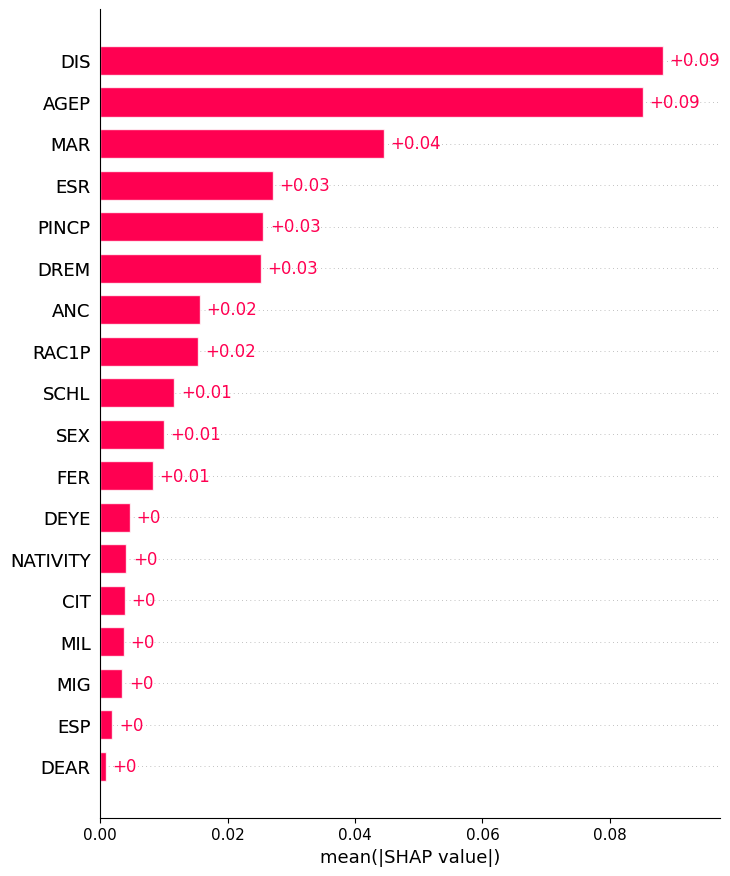

Permutation explainer: 501it [03:07,  2.52it/s]                                 


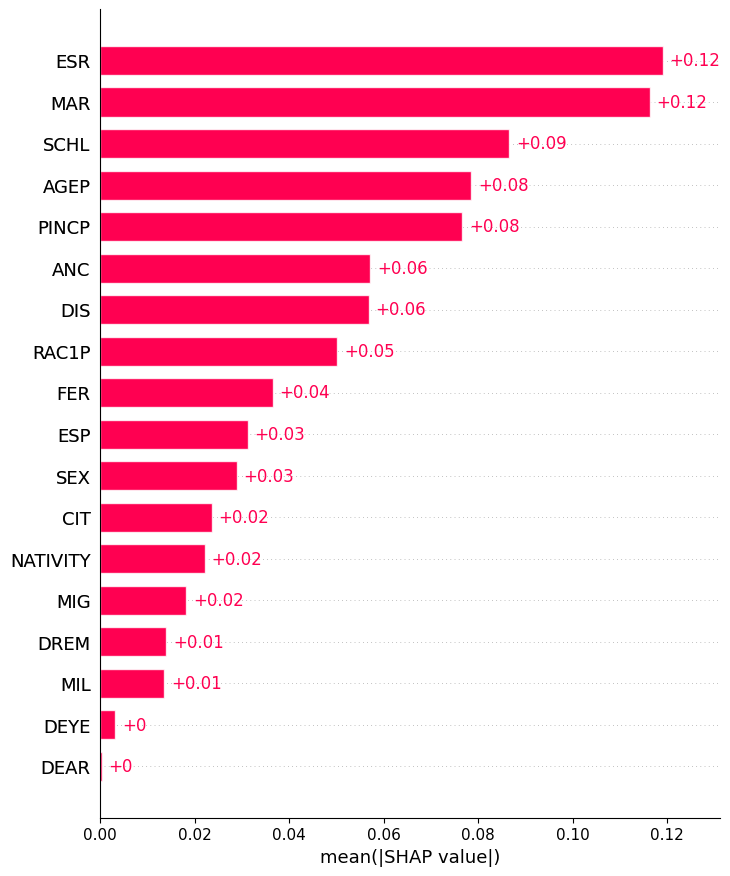

Permutation explainer: 501it [00:11,  5.57it/s]                                 


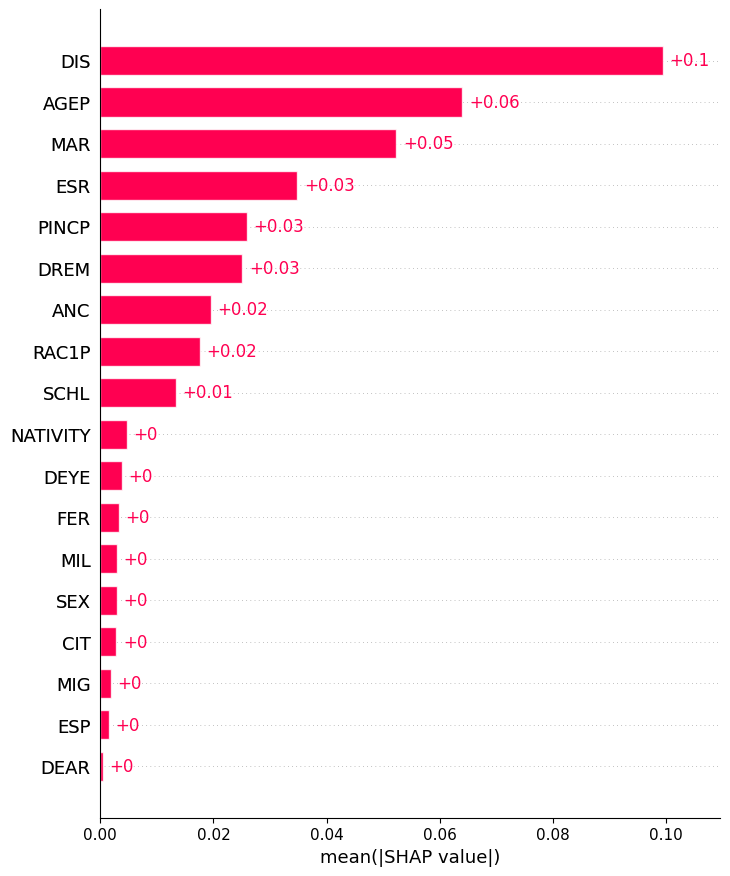

Permutation explainer: 501it [00:10,  1.64it/s]                                 


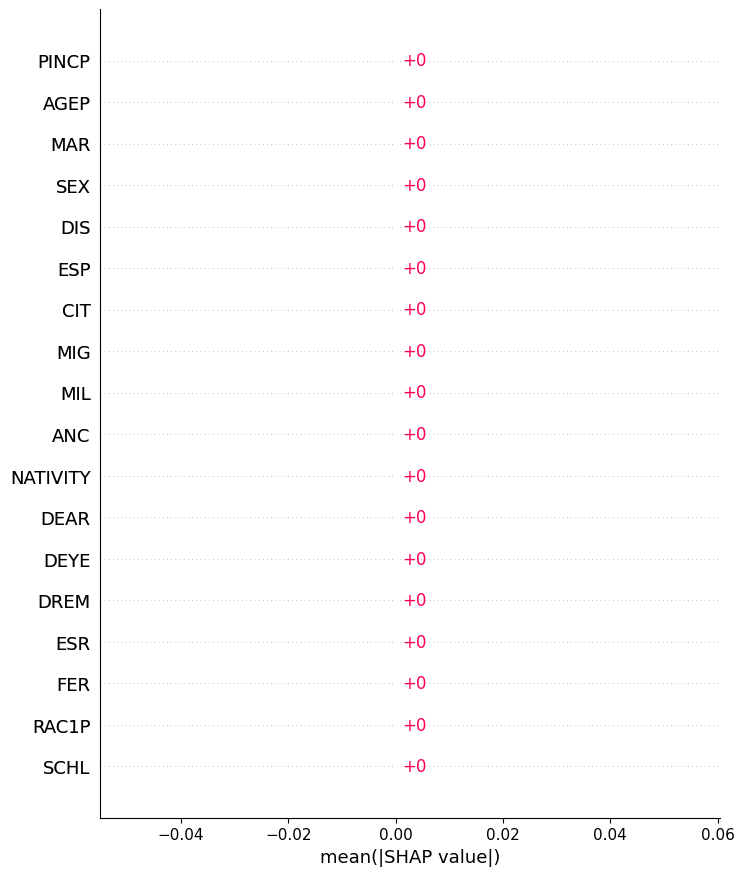

2023-02-20 13:17:34.896022: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 46192 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:b1:00.0, compute capability: 8.6
2023-02-20 13:17:34.896263: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 46192 MB memory:  -> device: 1, name: NVIDIA RTX A6000, pci bus id: 0000:d9:00.0, compute capability: 8.6
Permutation explainer: 501it [00:16, 12.01it/s]                                 


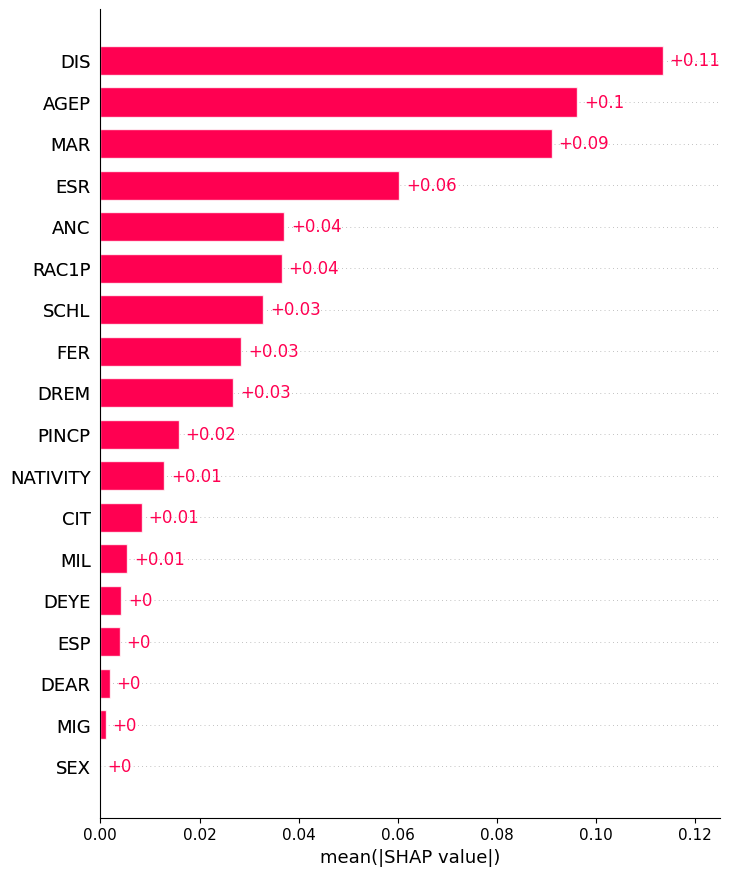

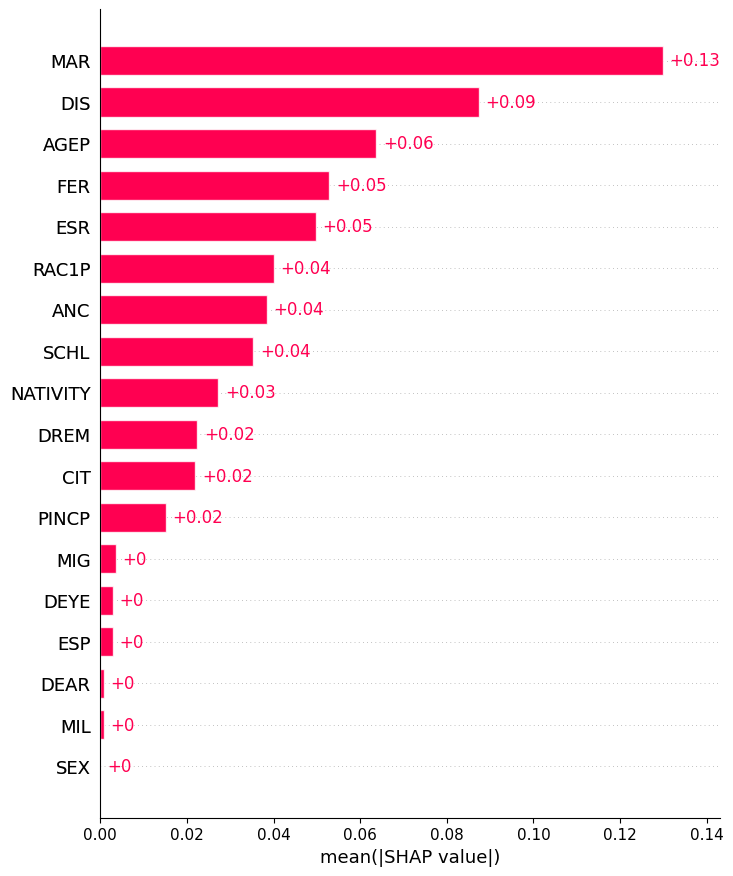

Permutation explainer: 501it [00:41,  9.08it/s]                                 


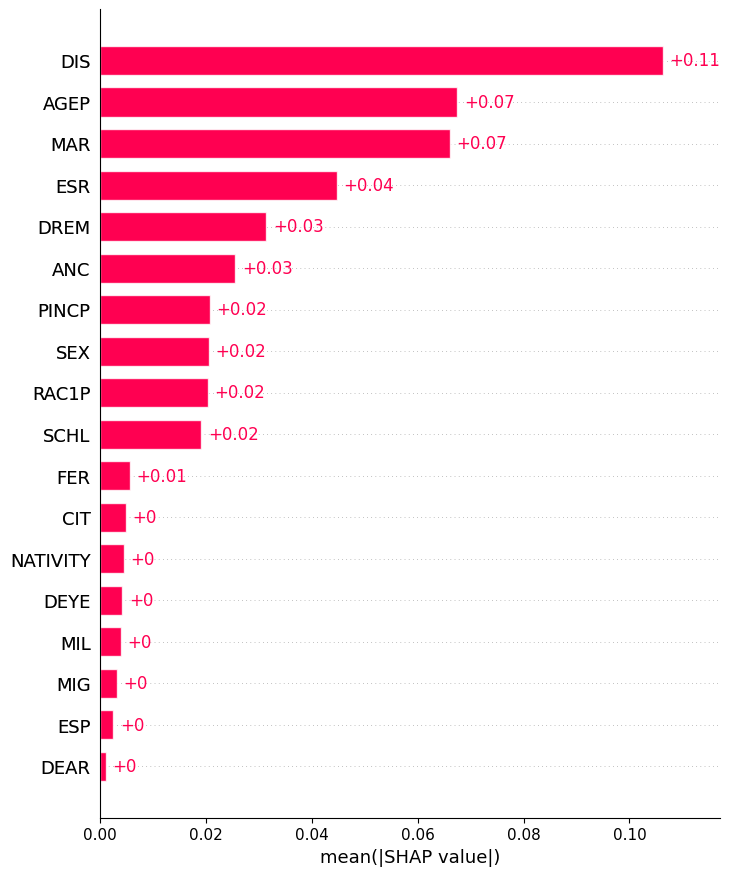

Permutation explainer: 501it [00:13,  7.26it/s]                                 


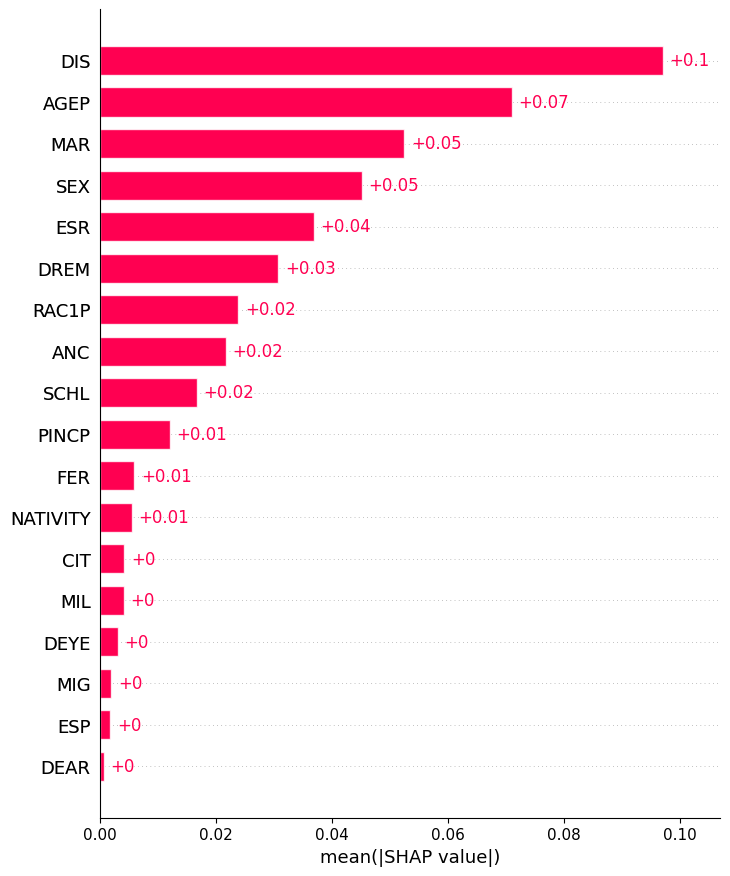

In [23]:
paths = {0:'data/datasets/publiccov_ca/',
         0.2:'data/datasets/publiccov_ca/synthetic/gender_flip_labels0.2_version0/',
         0.4:'data/datasets/publiccov_ca/synthetic/gender_flip_labels0.4_version0/',
         0.6:'data/datasets/publiccov_ca/synthetic/gender_flip_labels0.6_version0/',
         0.8:'data/datasets/publiccov_ca/synthetic/gender_flip_labels0.8_version0/'
        }

for frac in paths:
    path = paths[frac]
    
    gname = 'publiccov_ca'

    train_df = pd.read_csv(path+'train.csv',header=None)

    train_df.columns = ['AGEP', 'SCHL', 'MAR', 'SEX', 'DIS', 'ESP', 'CIT', 'MIG', 'MIL', 'ANC',
       'NATIVITY', 'DEAR', 'DEYE', 'DREM', 'PINCP', 'ESR', 'FER', 'RAC1P',
       'PUBCOV']


    train_df.index = train_df['SEX']

    train_df = train_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

    test_df = pd.read_csv(path+'test.csv',header=None)

    test_df.columns = ['AGEP', 'SCHL', 'MAR', 'SEX', 'DIS', 'ESP', 'CIT', 'MIG', 'MIL', 'ANC',
       'NATIVITY', 'DEAR', 'DEYE', 'DREM', 'PINCP', 'ESR', 'FER', 'RAC1P',
       'PUBCOV']


    test_df.index = test_df['SEX']

    test_df = test_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)



    X_train = train_df.drop(['PUBCOV'],axis=1)
    X_test = test_df.drop(['PUBCOV'],axis=1)

    y_train = pd.Series(train_df['PUBCOV'])
    y_test = pd.Series(test_df['PUBCOV'])

    y_train = pd.Series(y_train.factorize(sort=True)[0], index=y_train.index)
    y_test = pd.Series(y_test.factorize(sort=True)[0], index=y_test.index)

    X_merged = pd.concat([X_train,X_test])

    ohe = make_column_transformer(
        (OneHotEncoder(sparse=False), X_merged.dtypes == 'object'),
        remainder='passthrough', verbose_feature_names_out=False)

    X_merged_temp  = pd.DataFrame(ohe.fit_transform(X_merged), columns=ohe.get_feature_names_out(), index=X_merged.index)

    X_train  = pd.DataFrame(ohe.transform(X_train), columns=ohe.get_feature_names_out(), index=X_train.index)
    X_test = pd.DataFrame(ohe.transform(X_test), columns=ohe.get_feature_names_out(), index=X_test.index)

    lr = LogisticRegression(solver='liblinear')
    lr.fit(X_train, y_train)
    
    name = gname+'_baseline_'+str(frac)
    dothings(X_test,lr,name)

    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    
    name = gname+'_randomforest_'+str(frac)
    dothings(X_test,rf,name)
    
    rew = ReweighingMeta(estimator=LogisticRegression(solver='liblinear'),
                     reweigher=Reweighing('SEX'))
    params = {'estimator__C': [1, 10]}

    clf = GridSearchCV(rew, params, scoring='accuracy', cv=5)
    clf.fit(X_train, y_train)
    
    name = gname+'_adv_rew_'+str(frac)
    dothings(X_test,clf,name)
    
    LFR = LearnedFairRepresentations(prot_attr='SEX')
    LFR.fit(X_train, y_train)
    
    name = gname+'_lfr_'+str(frac)
    dothings(X_test,LFR,name)
    
    adv_deb = AdversarialDebiasing(prot_attr='SEX')
    adv_deb.fit(X_train, y_train)
    
    name = gname+'_adv_deb_'+str(frac)
    dothings(X_test,adv_deb,name)
    
    EGR = ExponentiatedGradientReduction(prot_attr=['SEX_Female','SEX_Male'], estimator=LogisticRegression(solver='liblinear'), constraints = 'EqualizedOdds')
    EGR.fit(X_train, y_train)
    
    name = gname+'_egr_'+str(frac)
    dothings(X_test,EGR,name)
    
    GSR = GridSearchReduction(prot_attr=['SEX_Female','SEX_Male'], estimator=LogisticRegression(solver='liblinear'), constraints = 'EqualizedOdds')
    GSR.fit(X_train, y_train)
    
    name = gname+'_gsr_'+str(frac)
    dothings(X_test,GSR,name)
    
    X_train_temp = X_train.set_index(['SEX_Male'], drop = False)
    y_train_temp = y_train.copy()
    y_train_temp.index = X_train_temp.index

    X_test_temp = X_test.set_index(['SEX_Male'], drop = False)
    y_test_temp = y_test.copy()
    y_test_temp.index = X_test_temp.index
    
    cal_eq_odds = CalibratedEqualizedOdds(prot_attr='SEX_Male', cost_constraint='weighted')
    postproc = PostProcessingMeta(estimator=LogisticRegression(solver='liblinear'), postprocessor=cal_eq_odds)
    postproc.fit(X_train_temp, y_train_temp)
    
    name = gname+'_caleq_'+str(frac)
    dothings2(X_test_temp,postproc,name)
    
    rocv = PostProcessingMeta(LogisticRegression(solver='liblinear'), RejectOptionClassifierCV('SEX_Male', scoring='average_odds'))
    rocv.fit(X_train_temp, y_train_temp)
    
    name = gname+'_rocv_'+str(frac)
    dothings2(X_test_temp,rocv,name)


### Employment

Permutation explainer: 501it [00:12,  8.49it/s]                                 


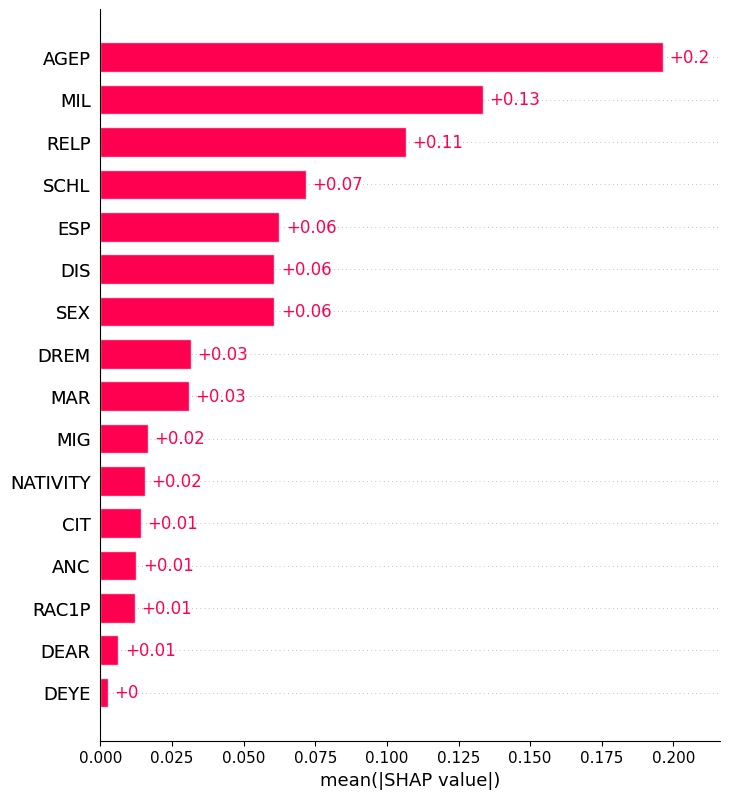

Permutation explainer: 501it [02:44,  2.85it/s]                                 


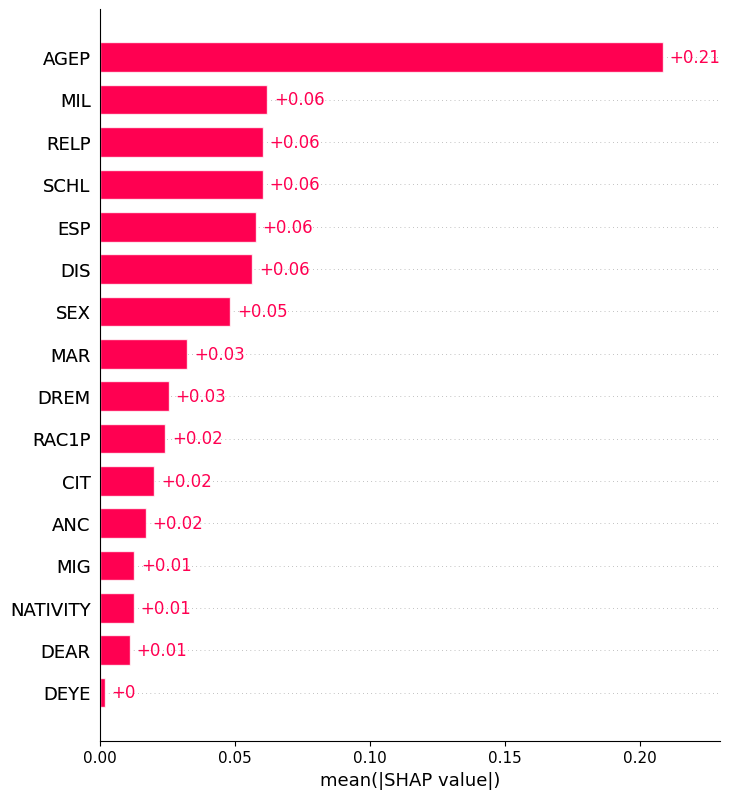

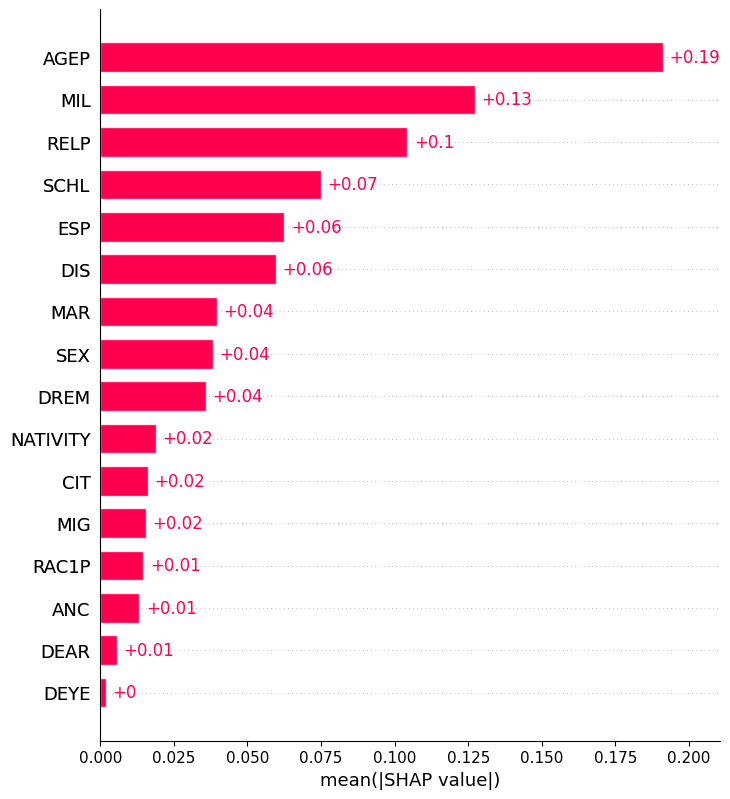

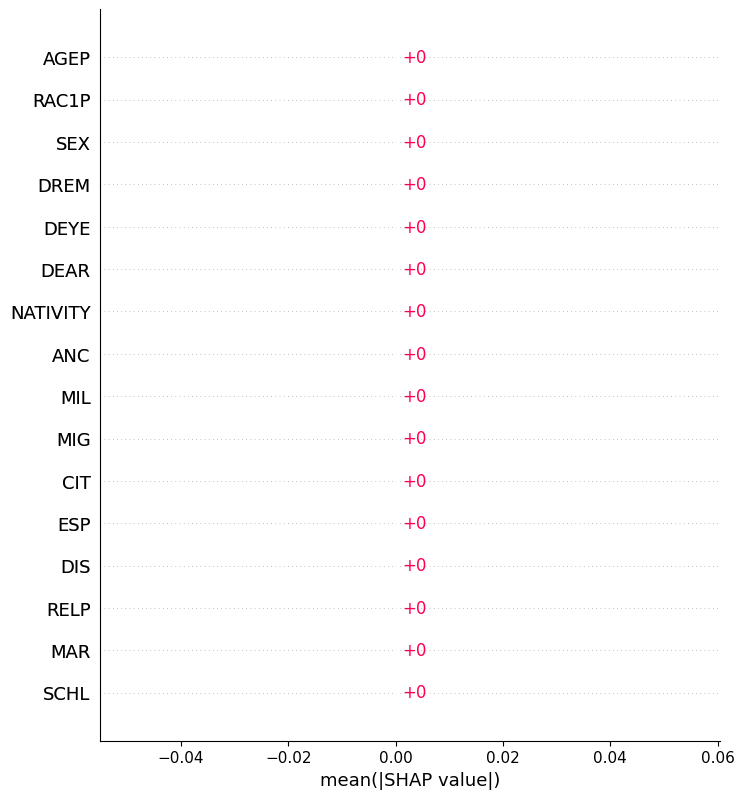

2023-02-20 13:30:37.512025: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 46192 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:b1:00.0, compute capability: 8.6
2023-02-20 13:30:37.512272: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 46192 MB memory:  -> device: 1, name: NVIDIA RTX A6000, pci bus id: 0000:d9:00.0, compute capability: 8.6
Permutation explainer: 501it [00:54,  7.46it/s]                                 


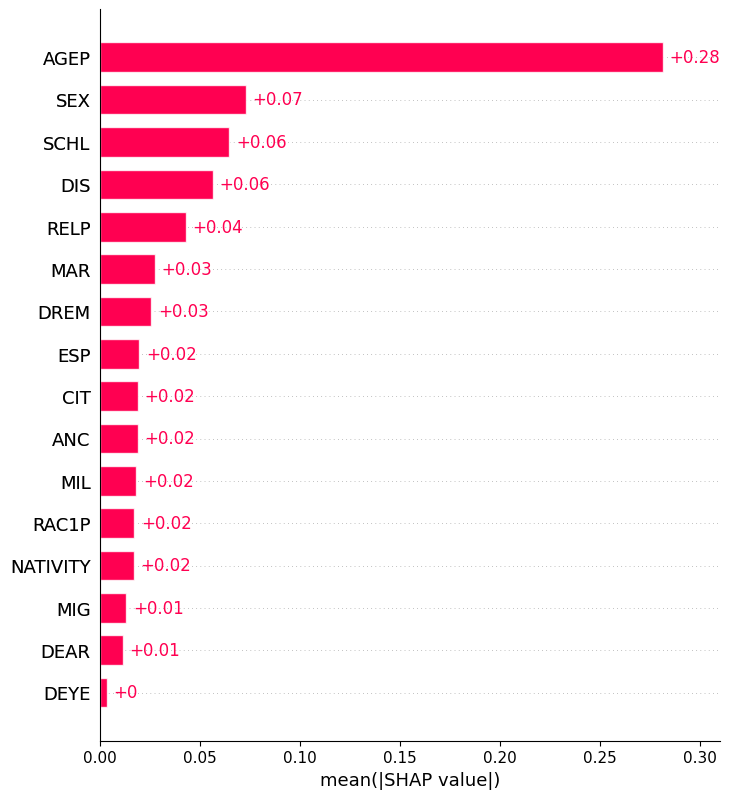

Permutation explainer: 501it [00:31, 10.75it/s]                                 


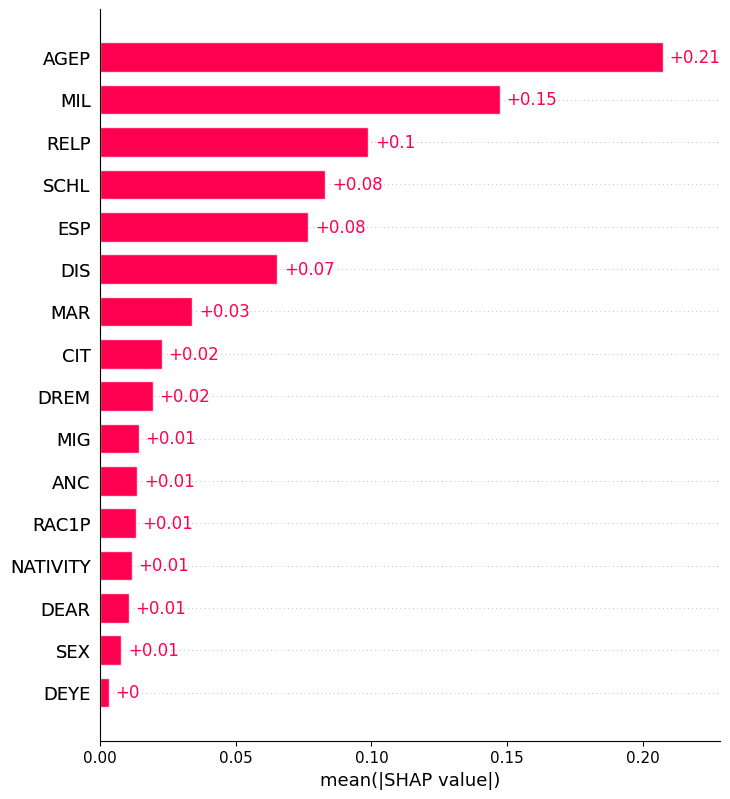

Permutation explainer: 501it [00:10,  2.82it/s]                                 


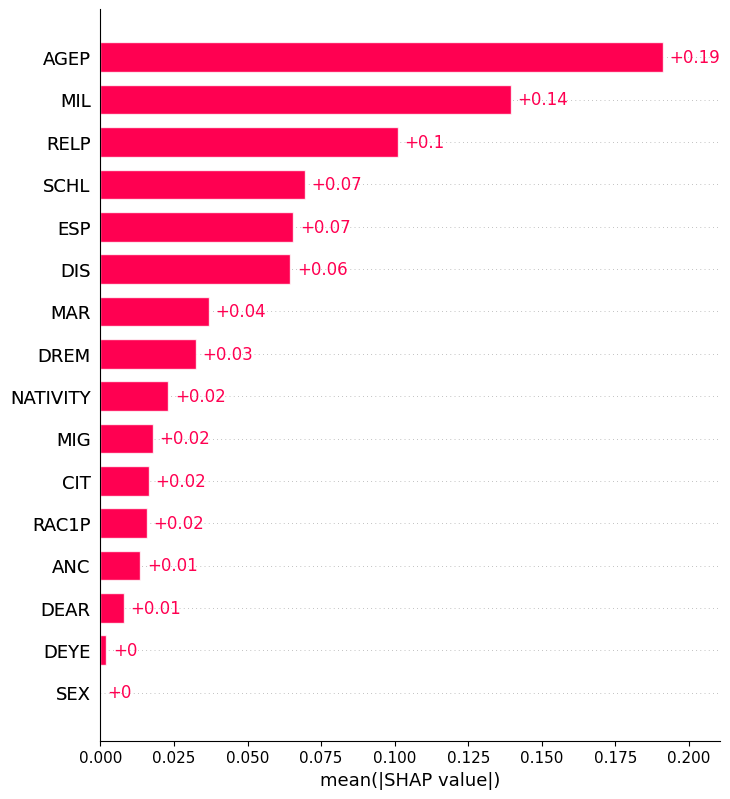

Permutation explainer: 501it [00:48,  7.86it/s]                                 


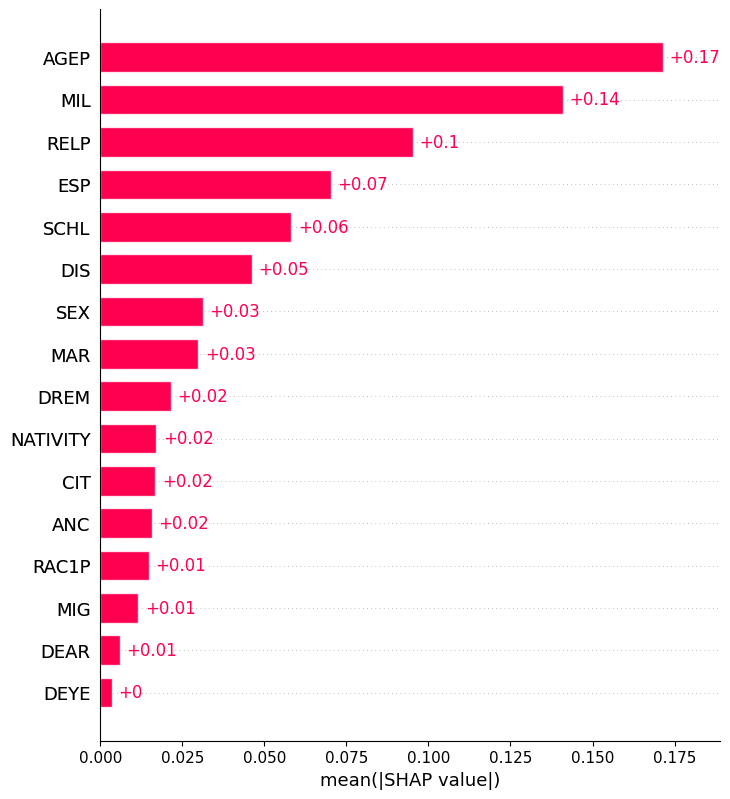

Permutation explainer: 501it [00:18, 12.29it/s]                                 


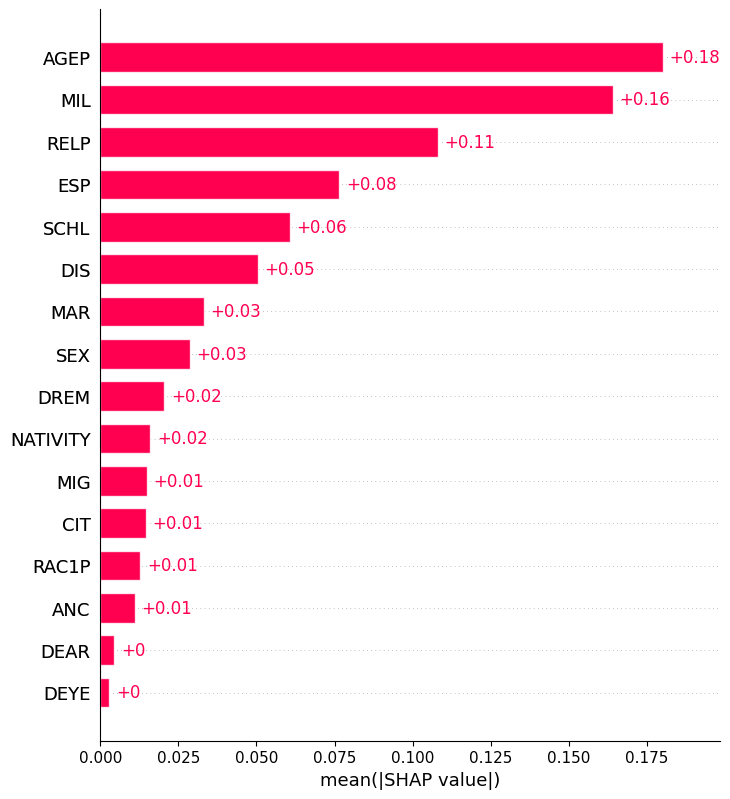

Permutation explainer: 501it [00:12,  8.27it/s]                                 


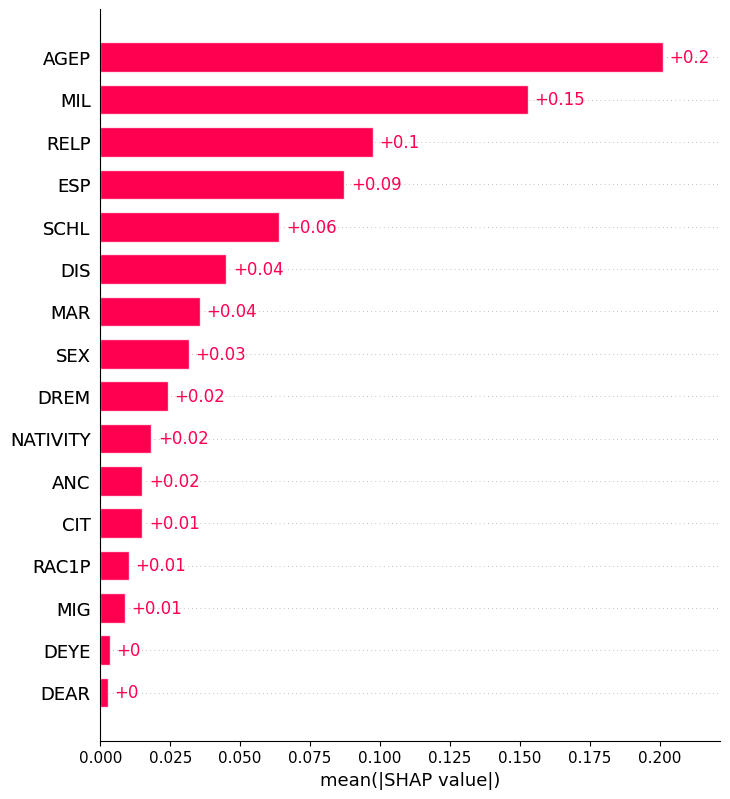

Permutation explainer: 501it [02:40,  2.92it/s]                                 


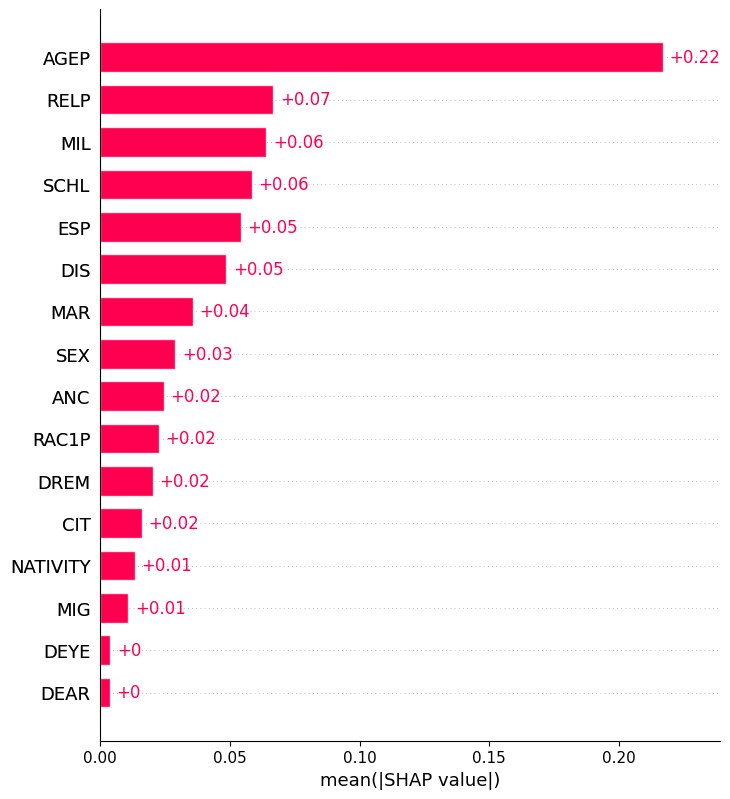

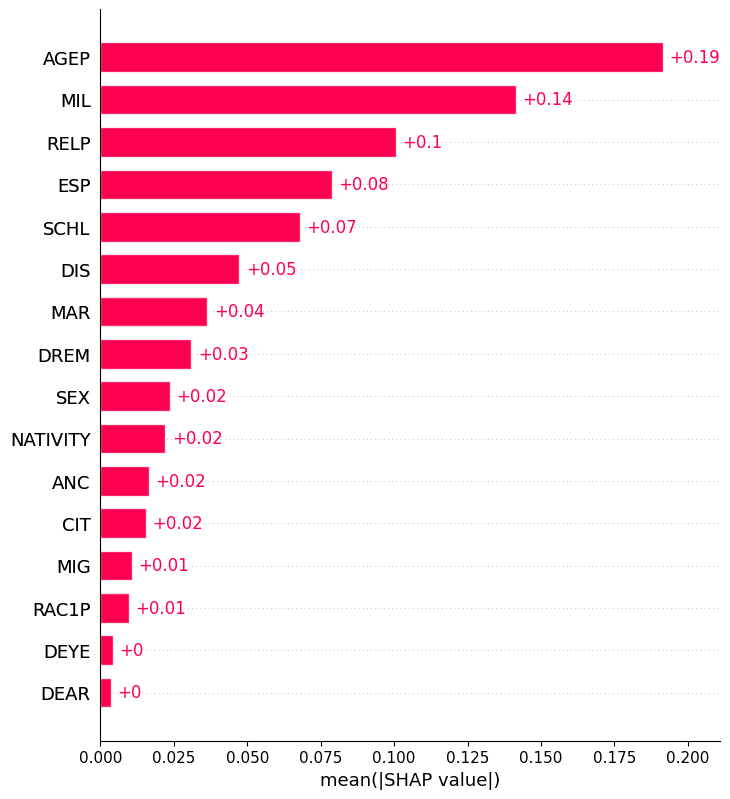

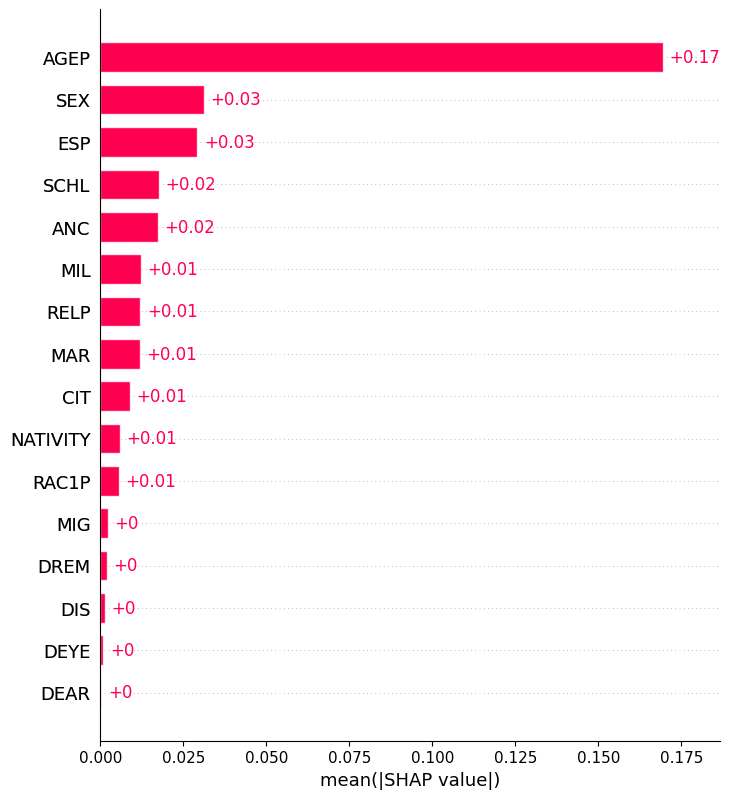

2023-02-20 13:44:28.816424: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 46192 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:b1:00.0, compute capability: 8.6
2023-02-20 13:44:28.816644: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 46192 MB memory:  -> device: 1, name: NVIDIA RTX A6000, pci bus id: 0000:d9:00.0, compute capability: 8.6
Permutation explainer: 501it [00:54,  7.47it/s]                                 


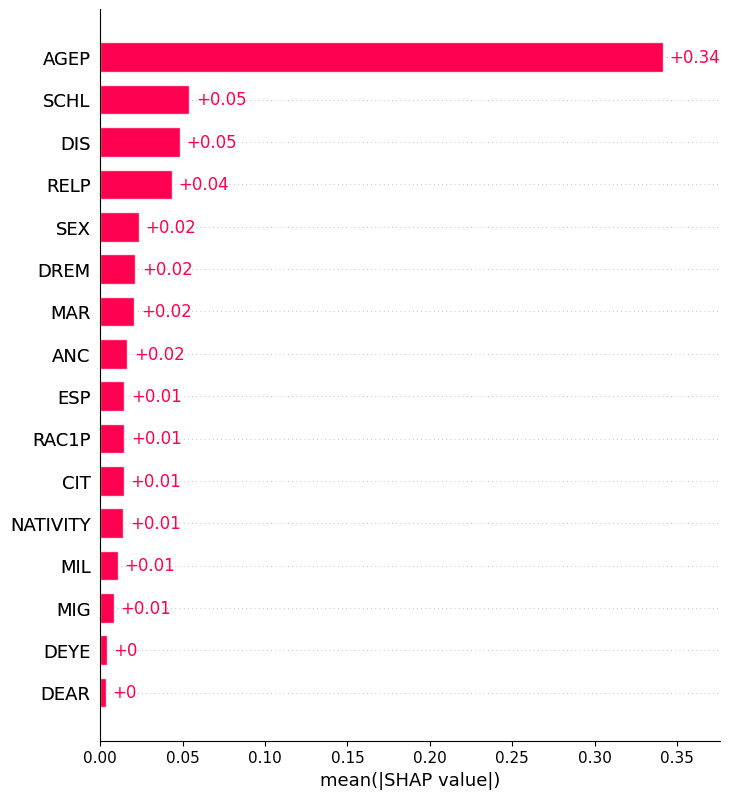

Permutation explainer: 501it [00:23, 12.20it/s]                                 


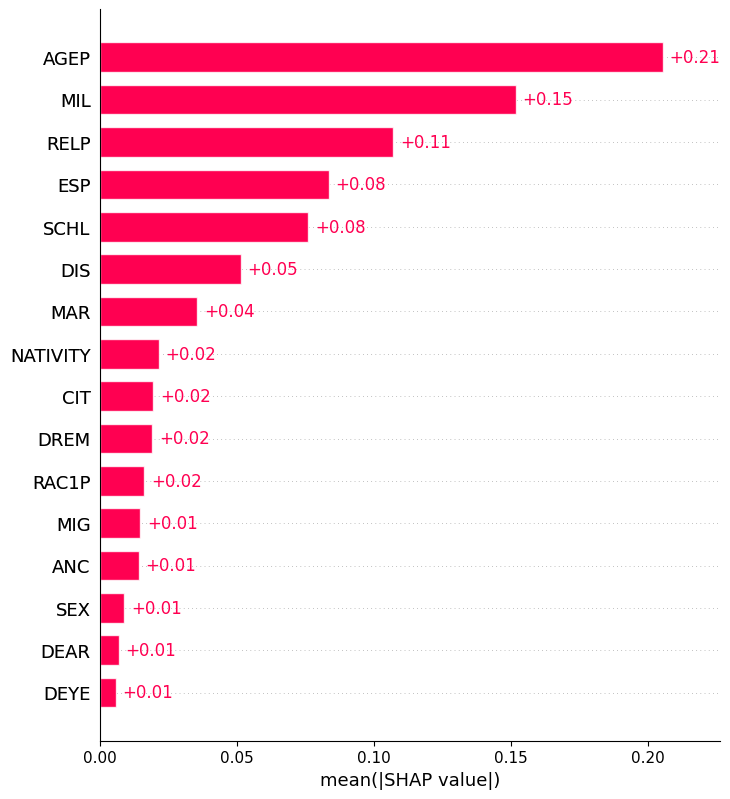

Permutation explainer: 501it [00:10,  2.73it/s]                                 


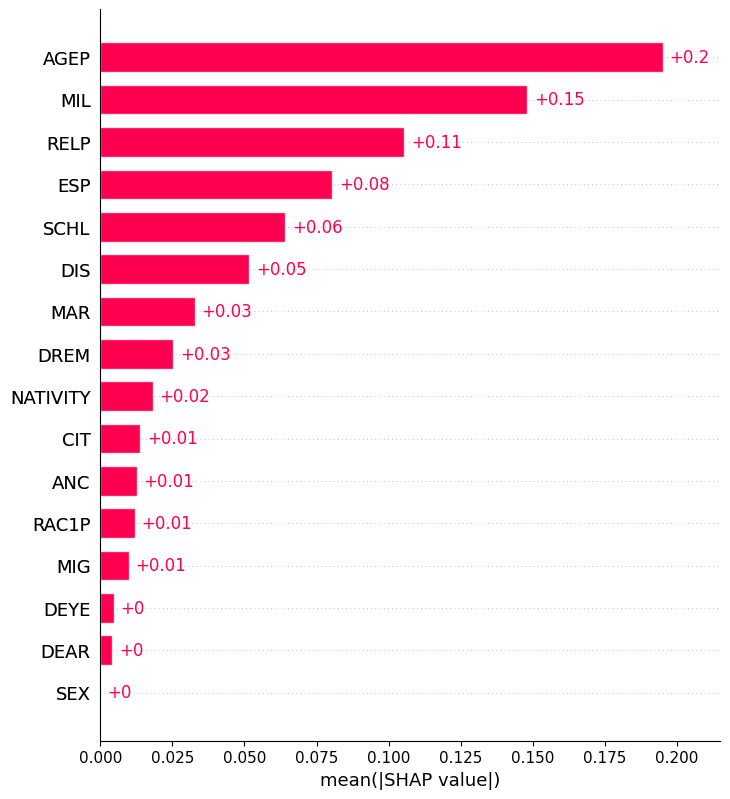

Permutation explainer: 501it [00:55,  6.89it/s]                                 


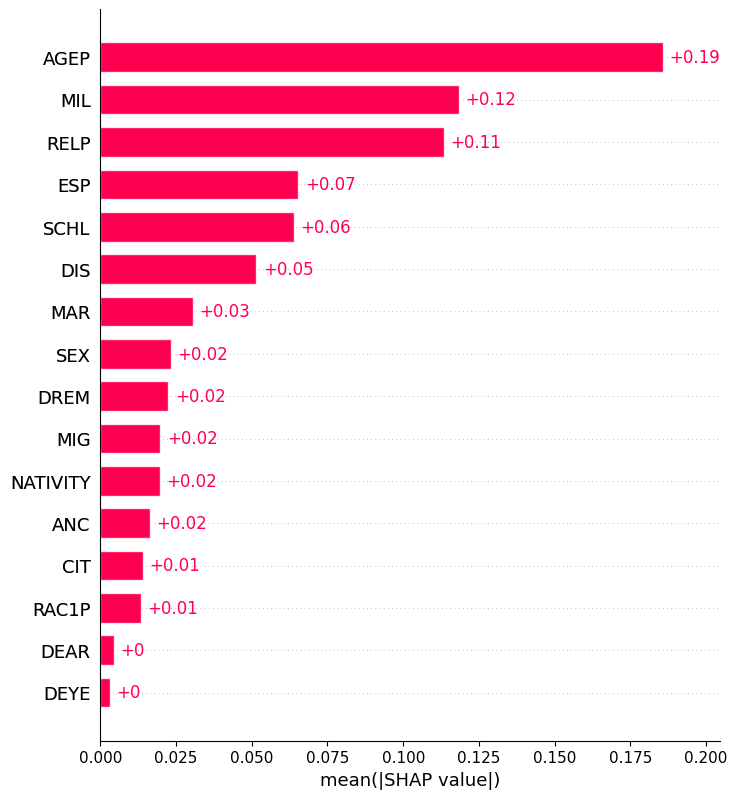

Permutation explainer: 501it [00:18, 12.36it/s]                                 


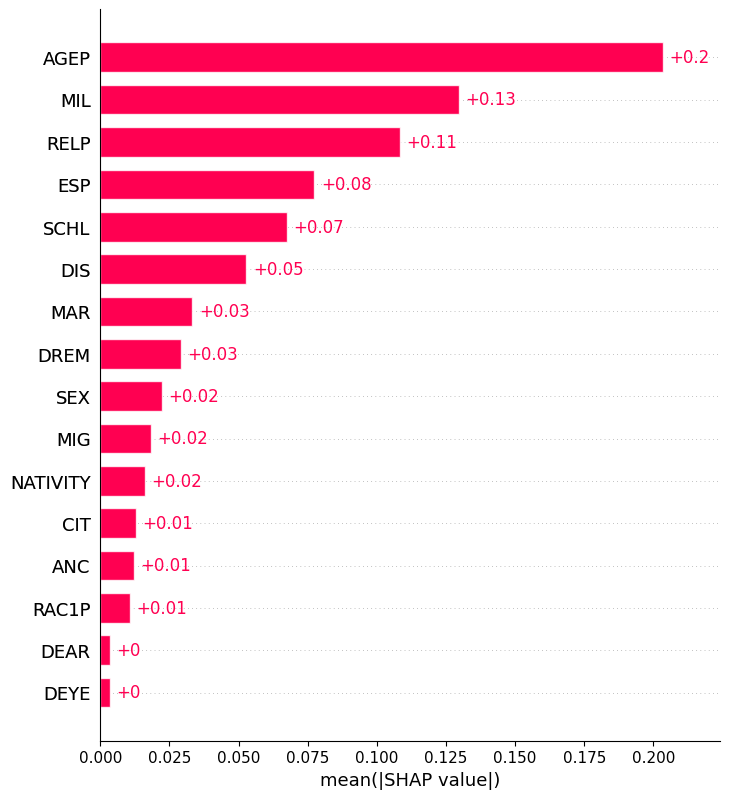

Permutation explainer: 501it [00:13,  9.20it/s]                                 


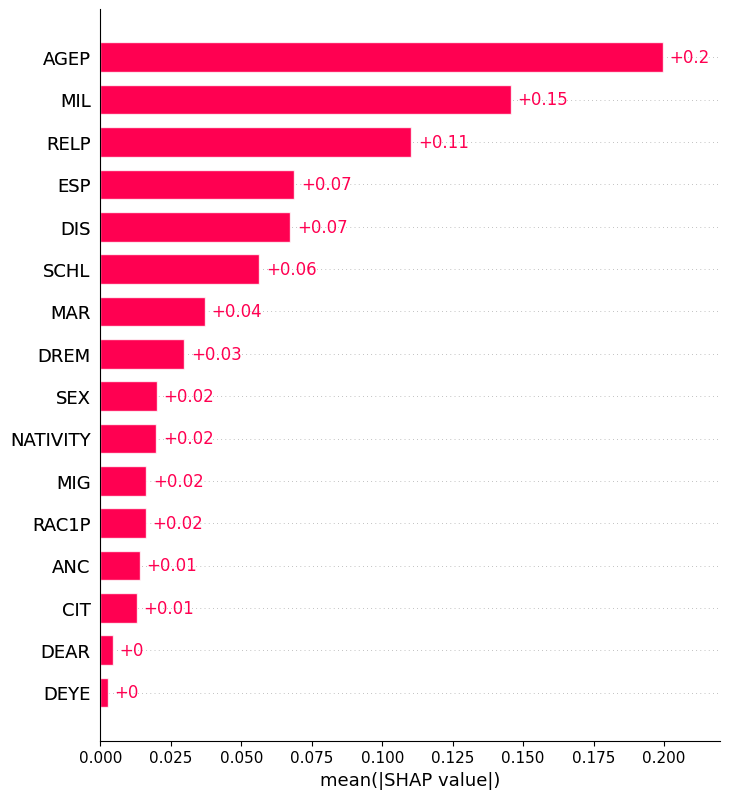

Permutation explainer: 501it [02:45,  2.84it/s]                                 


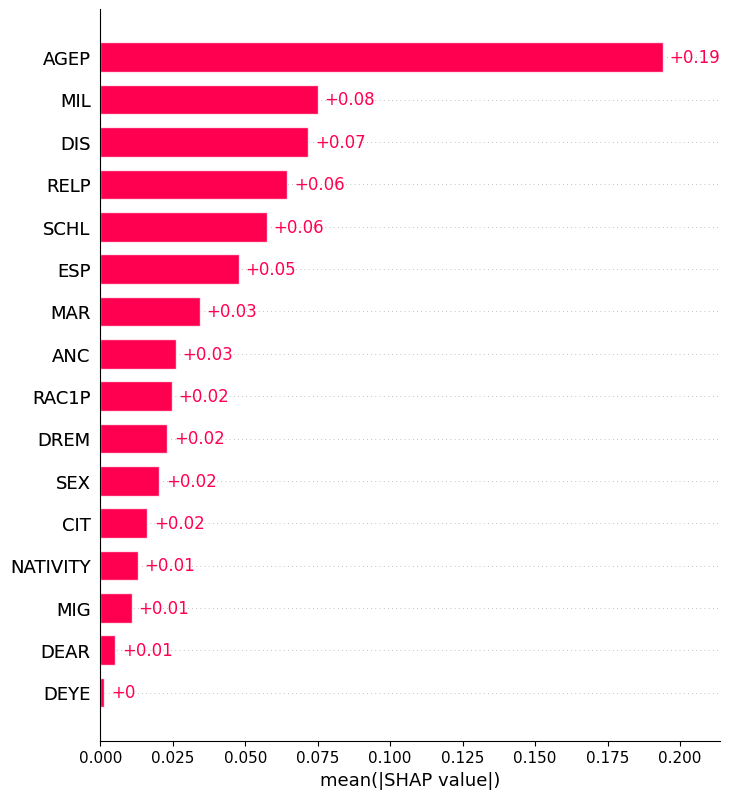

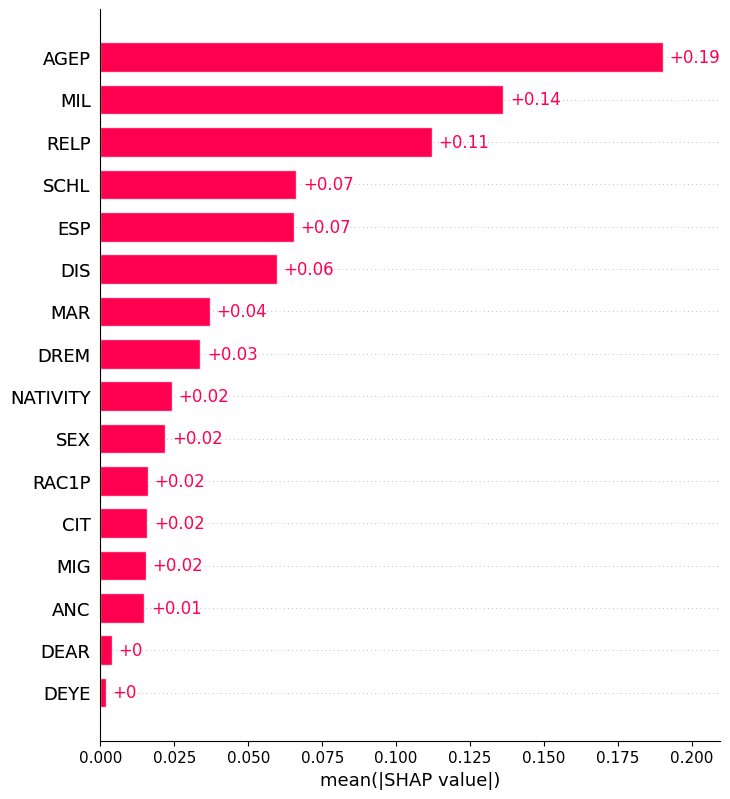

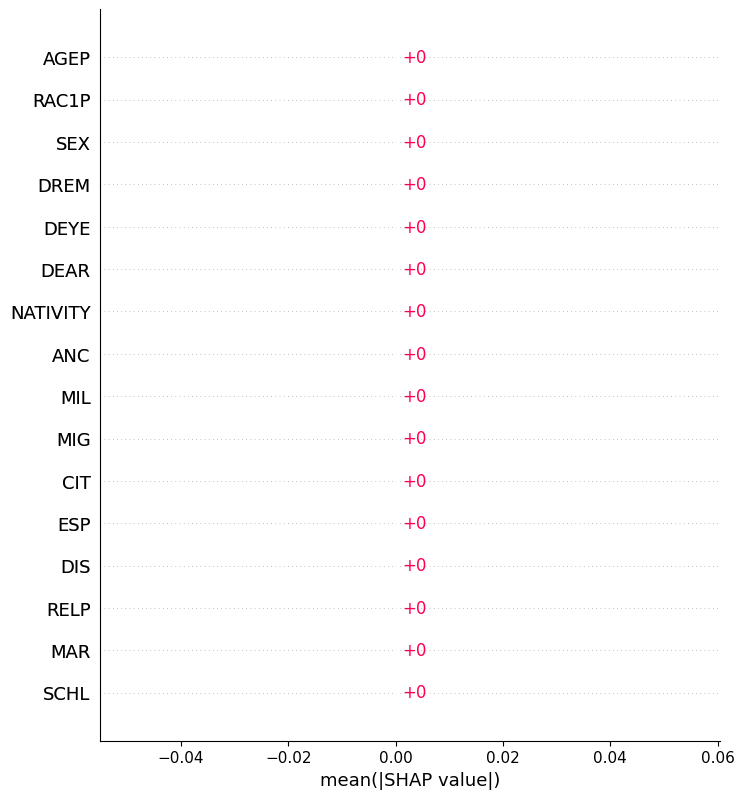

2023-02-20 13:58:11.371174: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 46192 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:b1:00.0, compute capability: 8.6
2023-02-20 13:58:11.371398: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 46192 MB memory:  -> device: 1, name: NVIDIA RTX A6000, pci bus id: 0000:d9:00.0, compute capability: 8.6
Permutation explainer: 501it [01:01,  6.91it/s]                                 


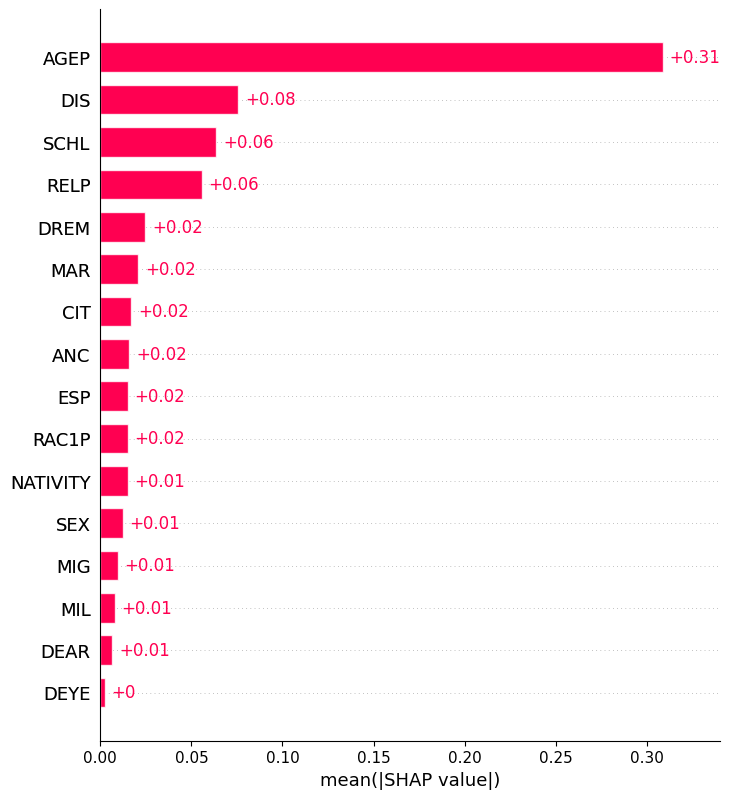

Permutation explainer: 501it [00:25, 11.15it/s]                                 


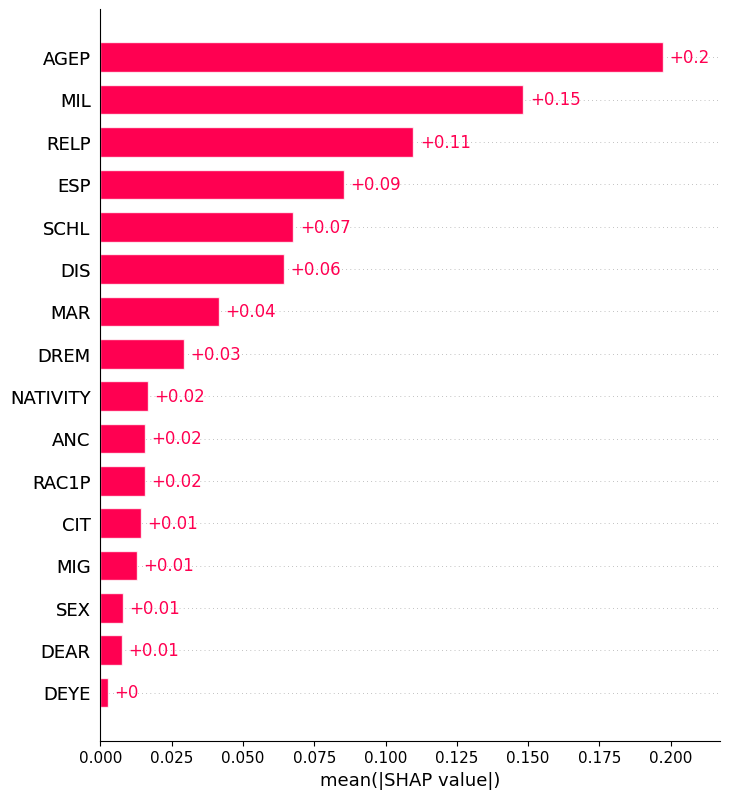

Permutation explainer: 501it [00:10,  3.68it/s]                                 


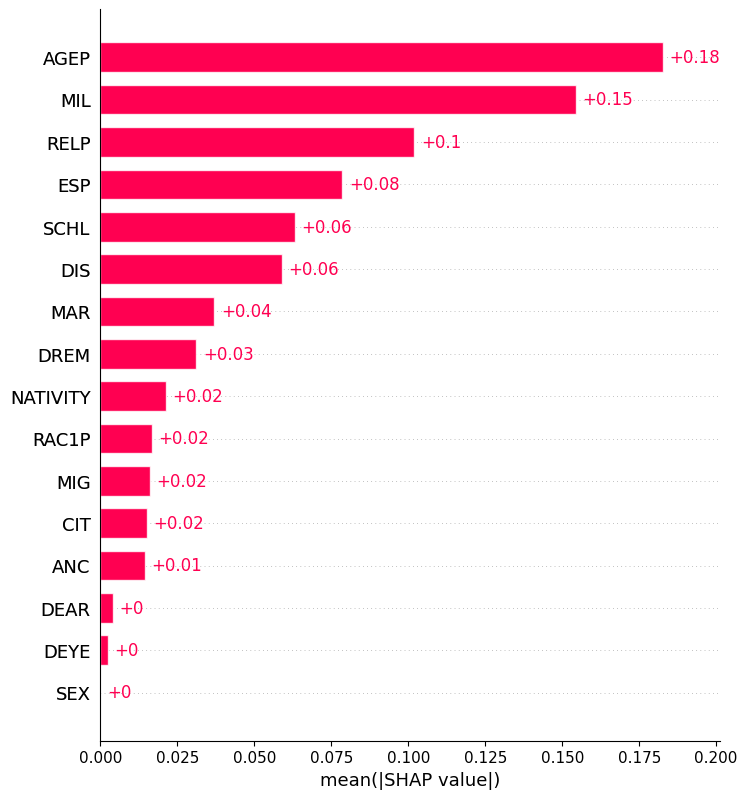

Permutation explainer: 501it [00:31, 10.77it/s]                                 


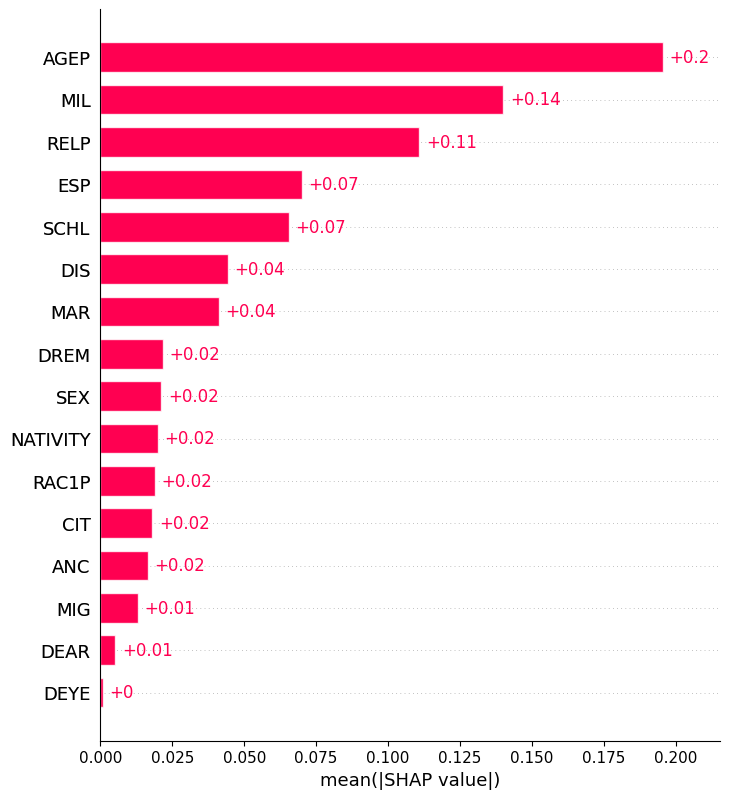

Permutation explainer: 501it [00:10,  1.27it/s]                                 


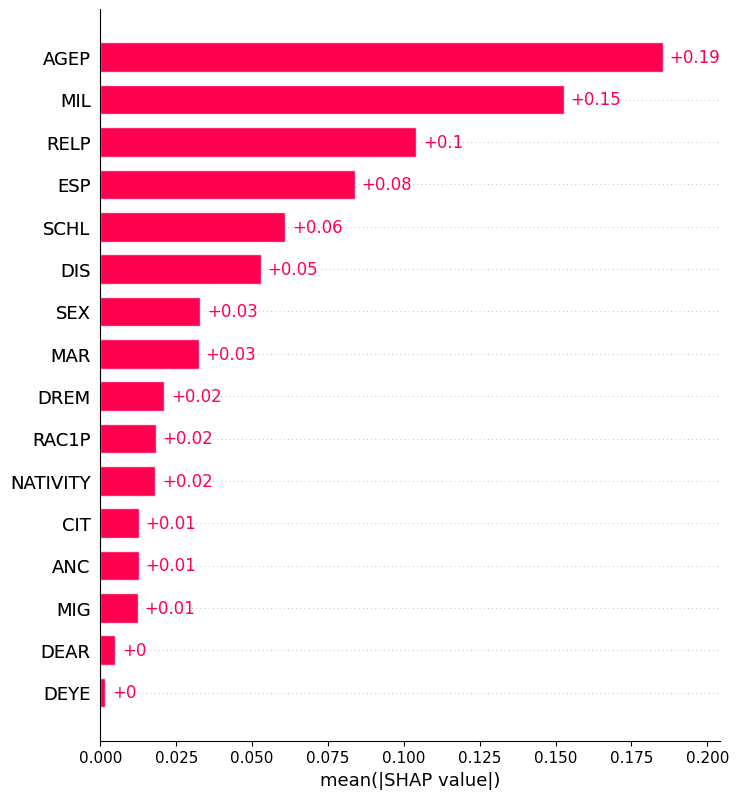

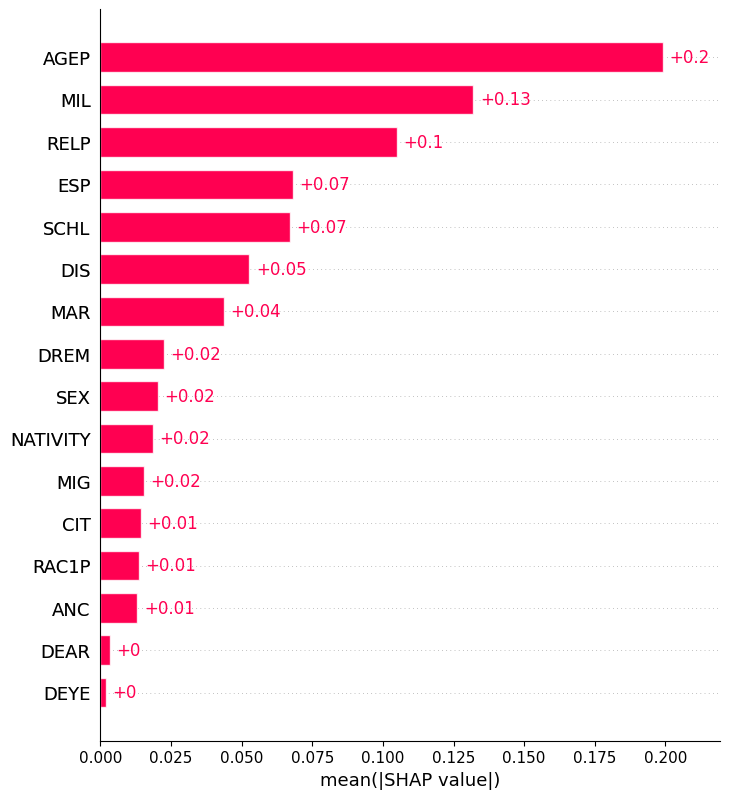

Permutation explainer: 501it [02:38,  2.95it/s]                                 


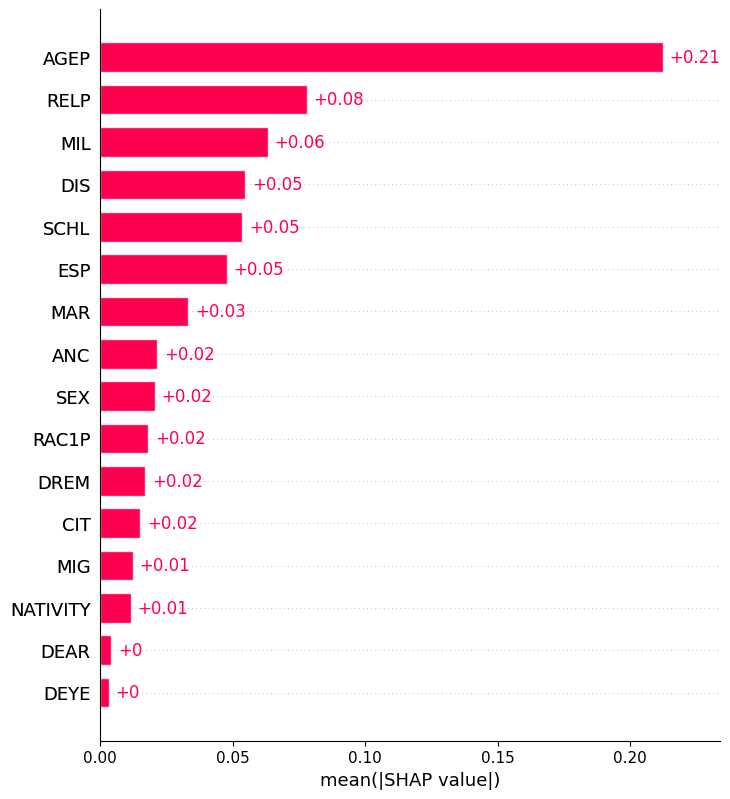

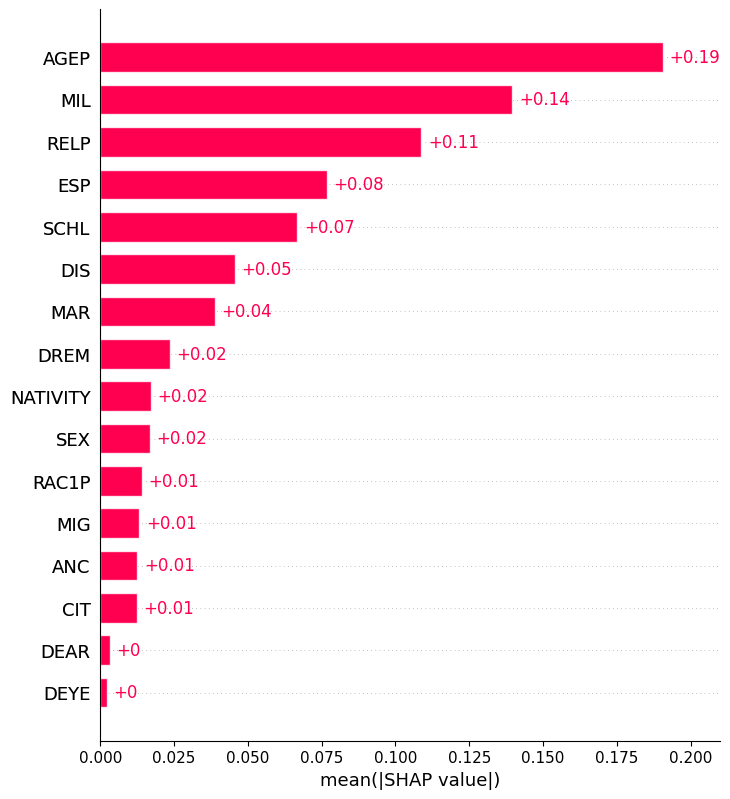

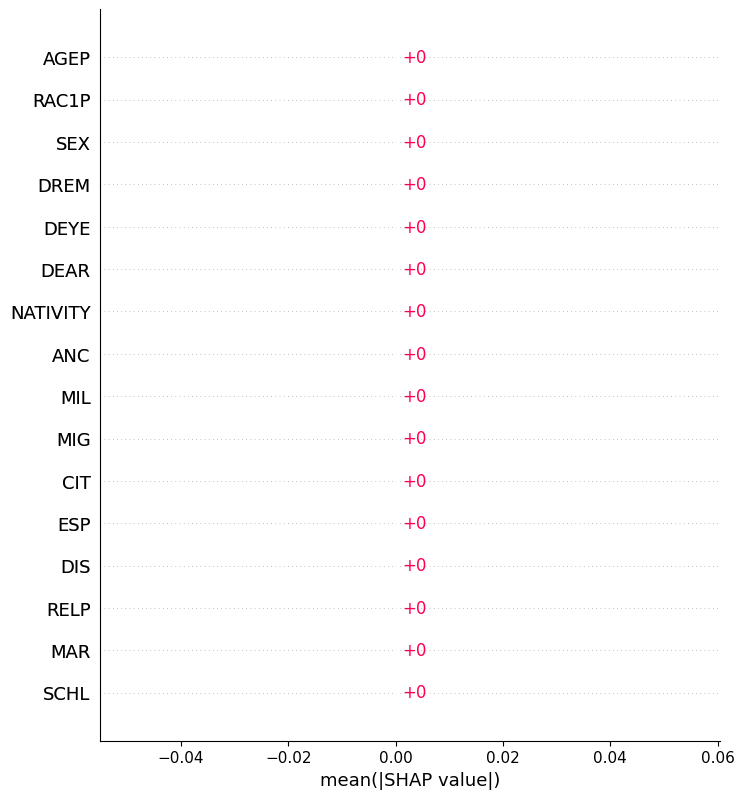

2023-02-20 14:10:48.686075: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 46192 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:b1:00.0, compute capability: 8.6
2023-02-20 14:10:48.686316: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 46192 MB memory:  -> device: 1, name: NVIDIA RTX A6000, pci bus id: 0000:d9:00.0, compute capability: 8.6
Permutation explainer: 501it [01:03,  6.64it/s]                                 


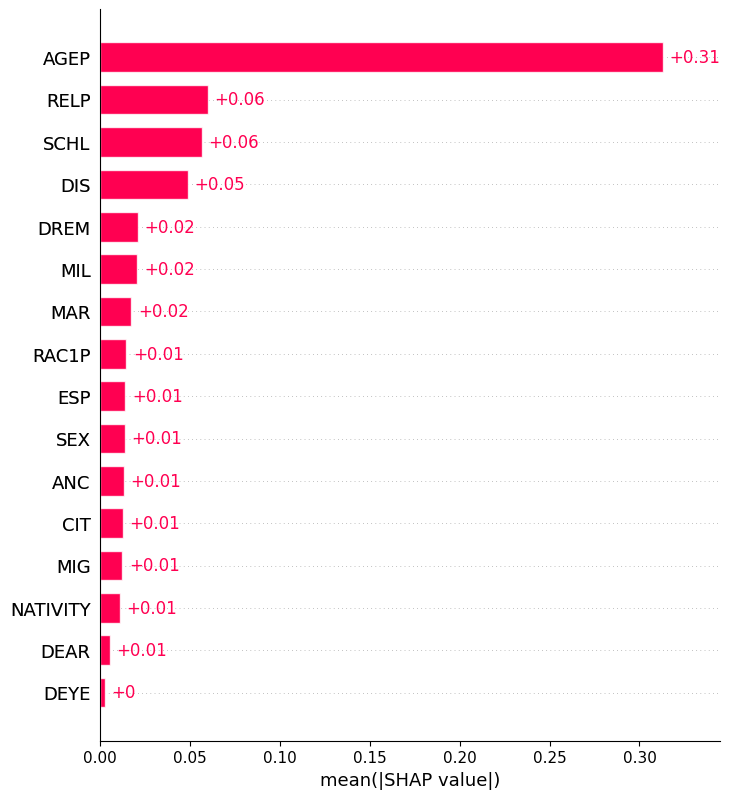

Permutation explainer: 501it [00:15, 11.20it/s]                                 


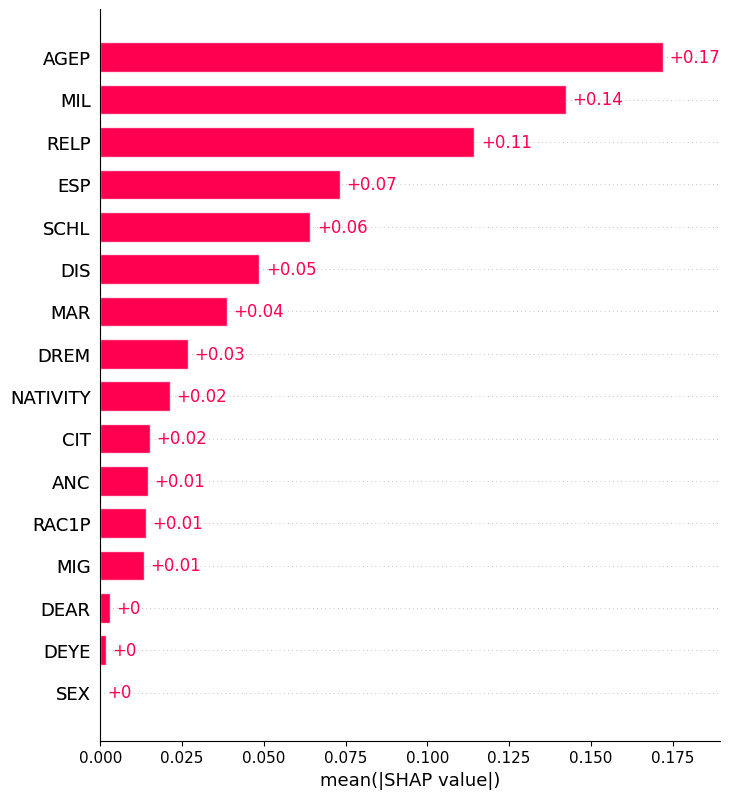

Permutation explainer: 501it [00:13,  8.08it/s]                                 


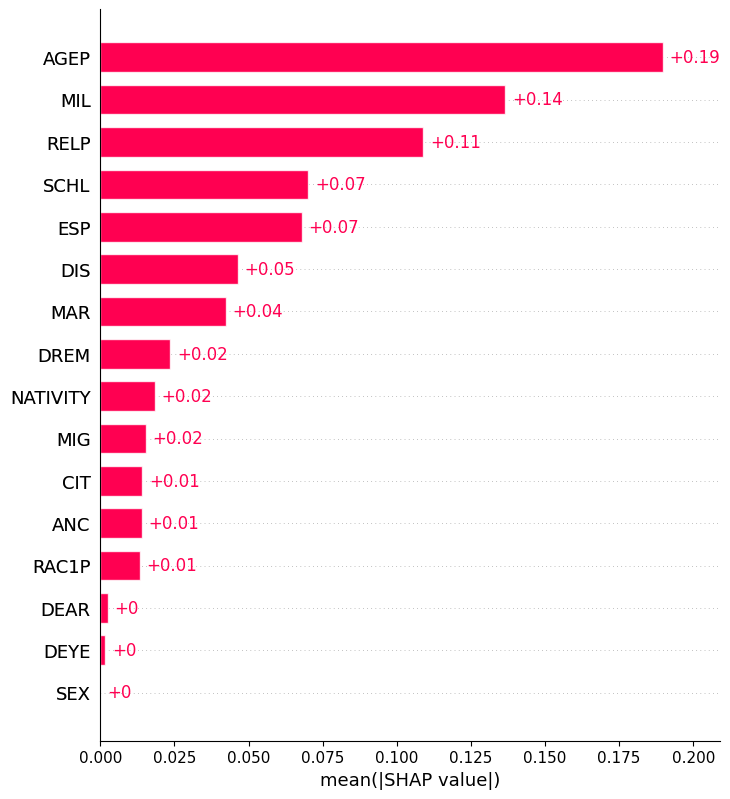

Permutation explainer: 501it [01:11,  6.04it/s]                                 


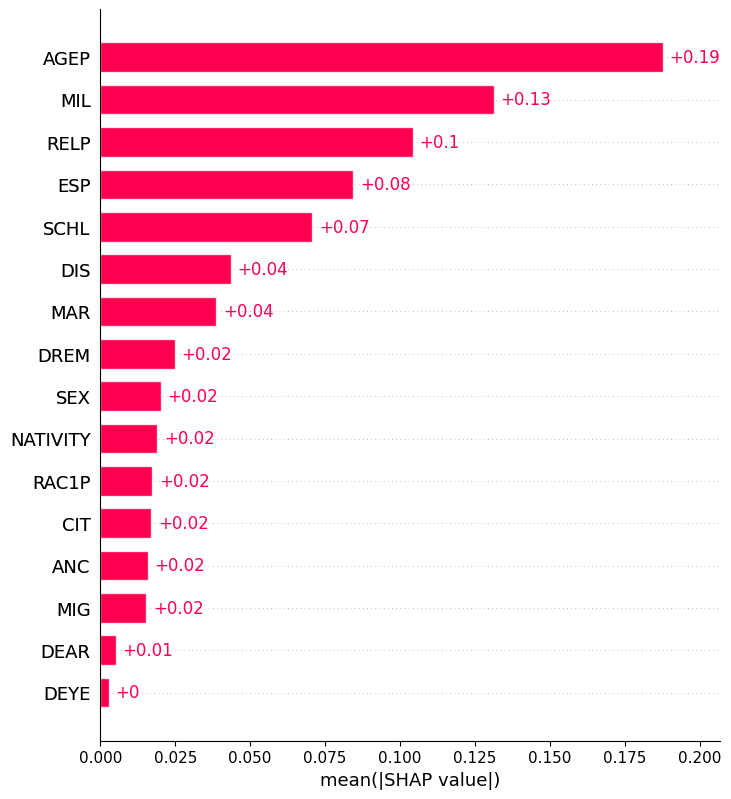

Permutation explainer: 501it [00:18, 12.38it/s]                                 


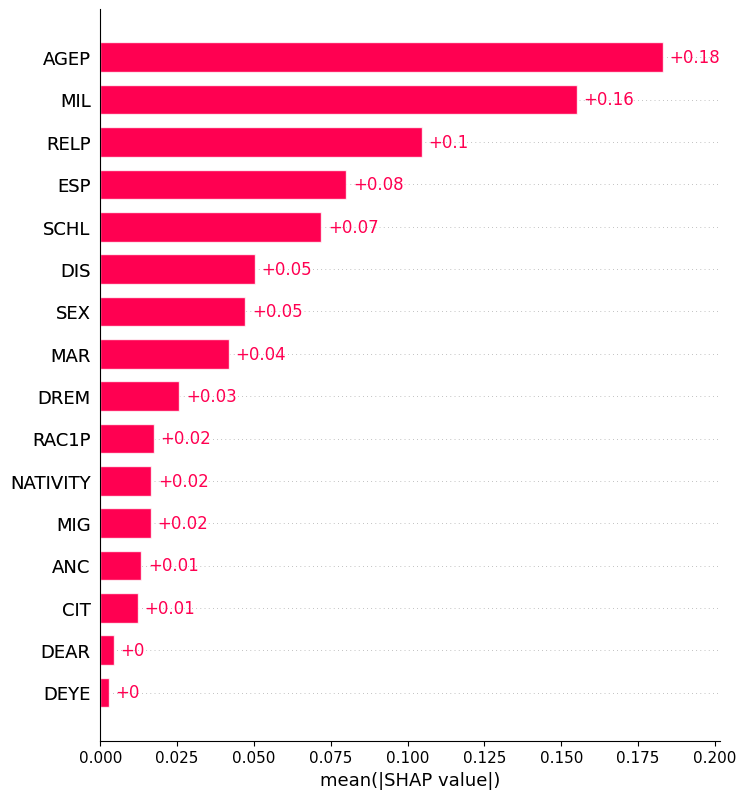

Permutation explainer: 501it [00:12,  8.78it/s]                                 


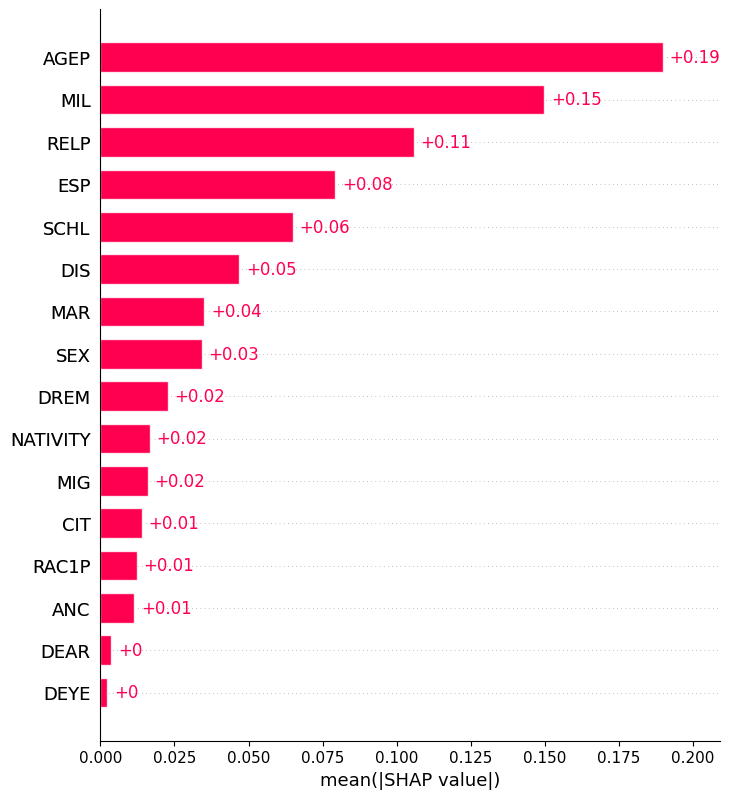

Permutation explainer: 501it [02:43,  2.88it/s]                                 


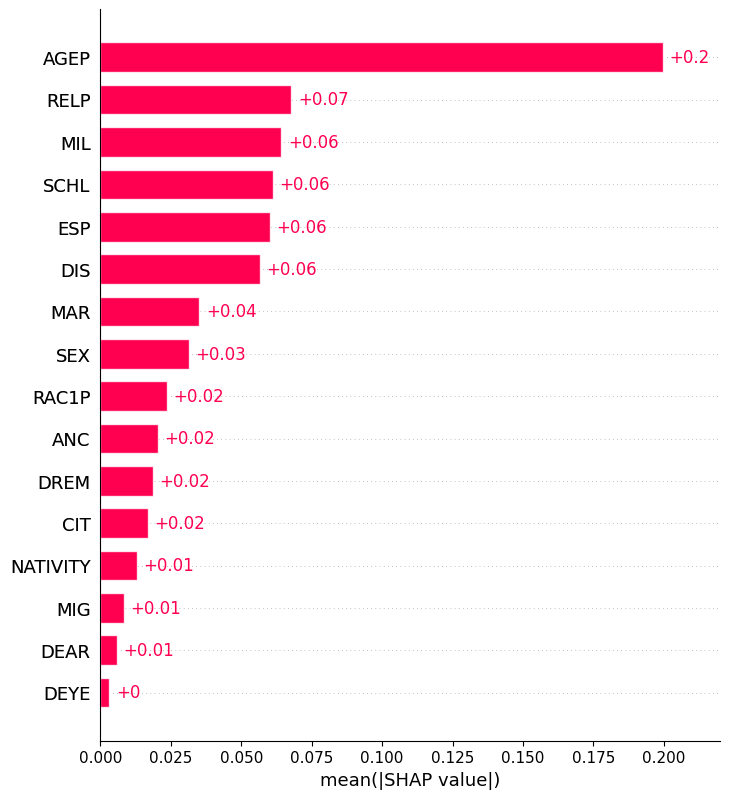

Permutation explainer: 501it [00:11,  5.62it/s]                                 


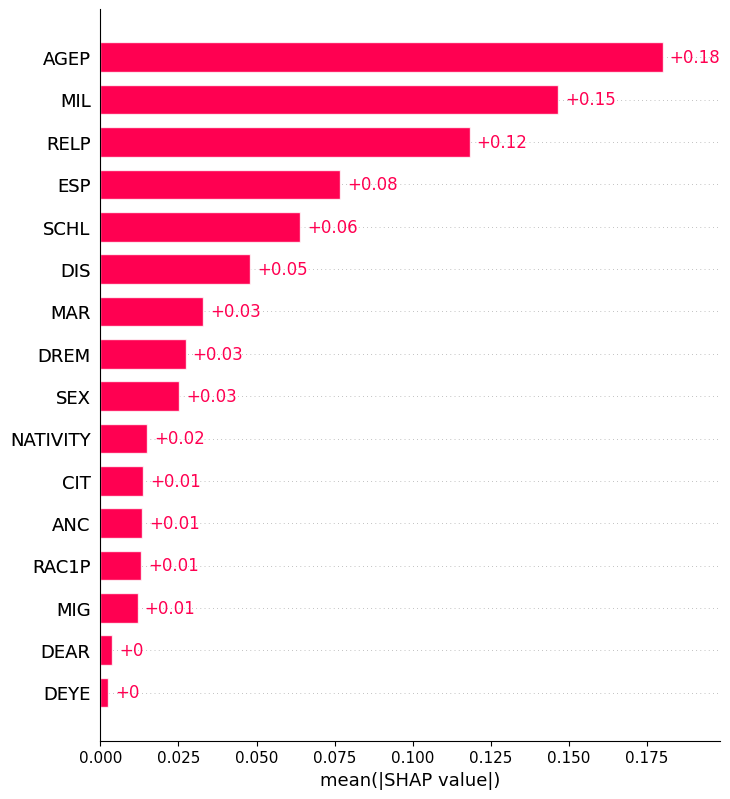

Permutation explainer: 501it [00:11,  6.51it/s]                                 


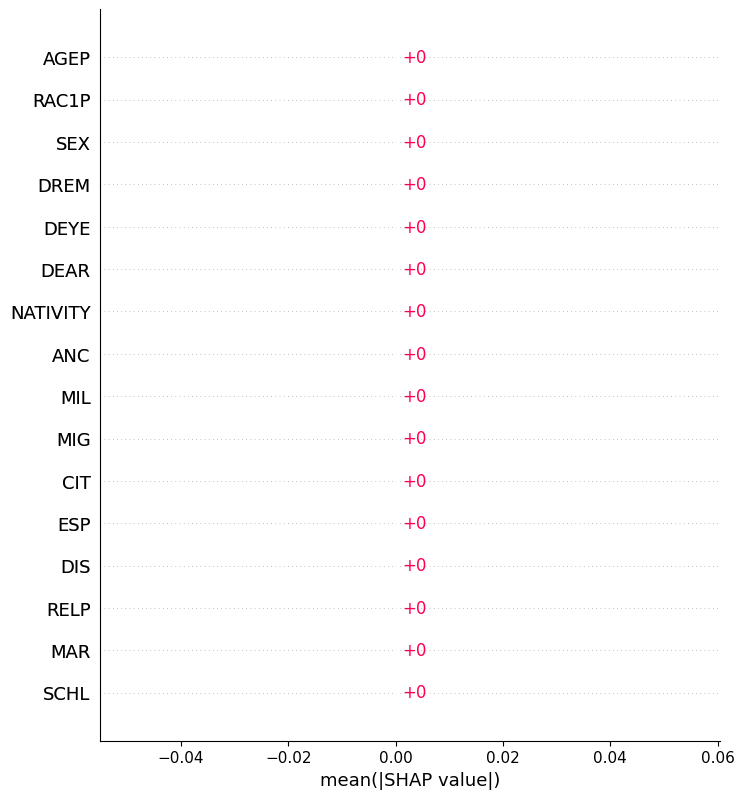

2023-02-20 14:24:46.015303: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 46192 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:b1:00.0, compute capability: 8.6
2023-02-20 14:24:46.015545: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 46192 MB memory:  -> device: 1, name: NVIDIA RTX A6000, pci bus id: 0000:d9:00.0, compute capability: 8.6
Permutation explainer: 501it [00:50,  7.98it/s]                                 


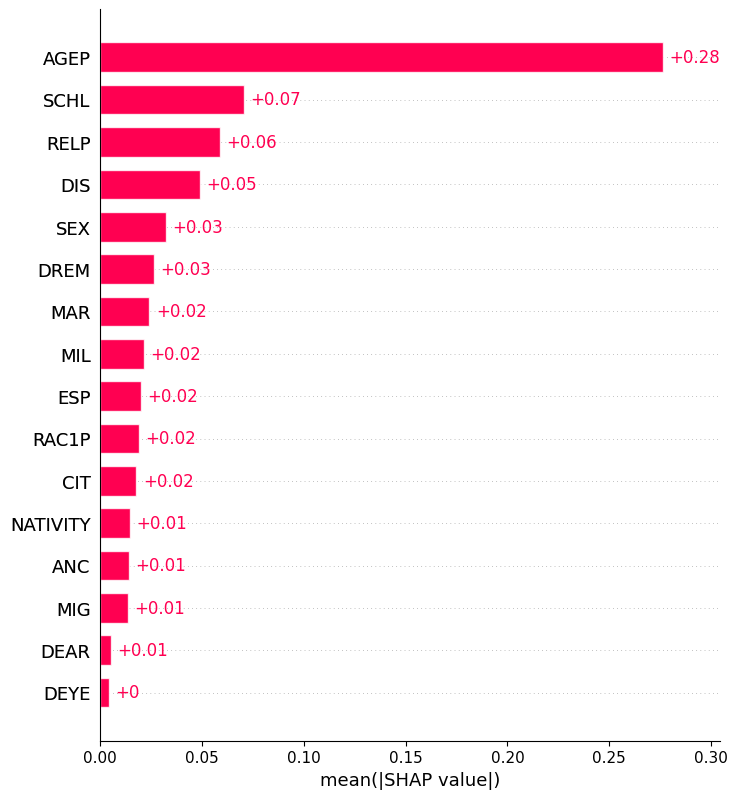

Permutation explainer: 501it [00:31,  9.84it/s]                                 


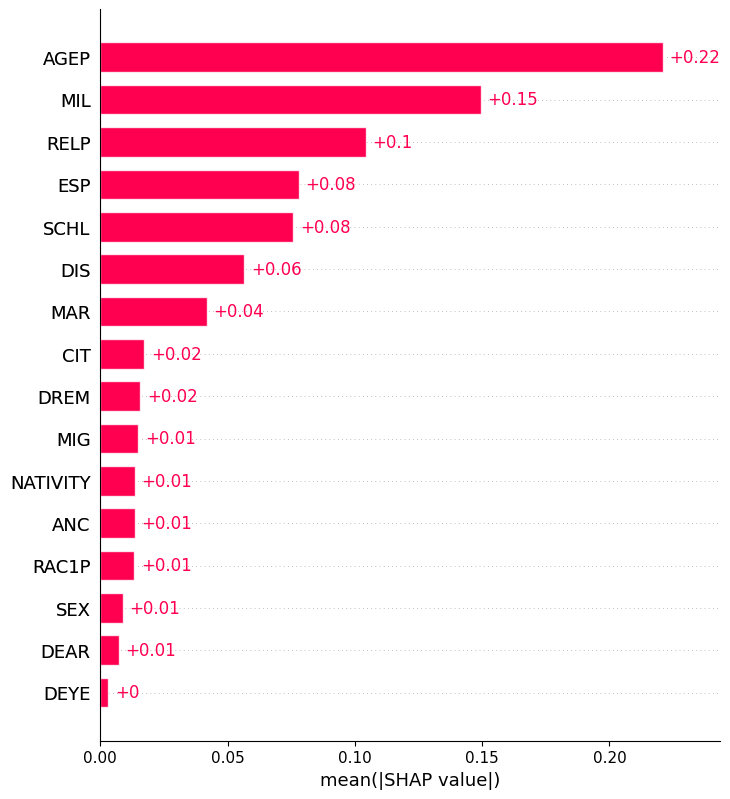

Permutation explainer: 501it [00:15, 11.27it/s]                                 


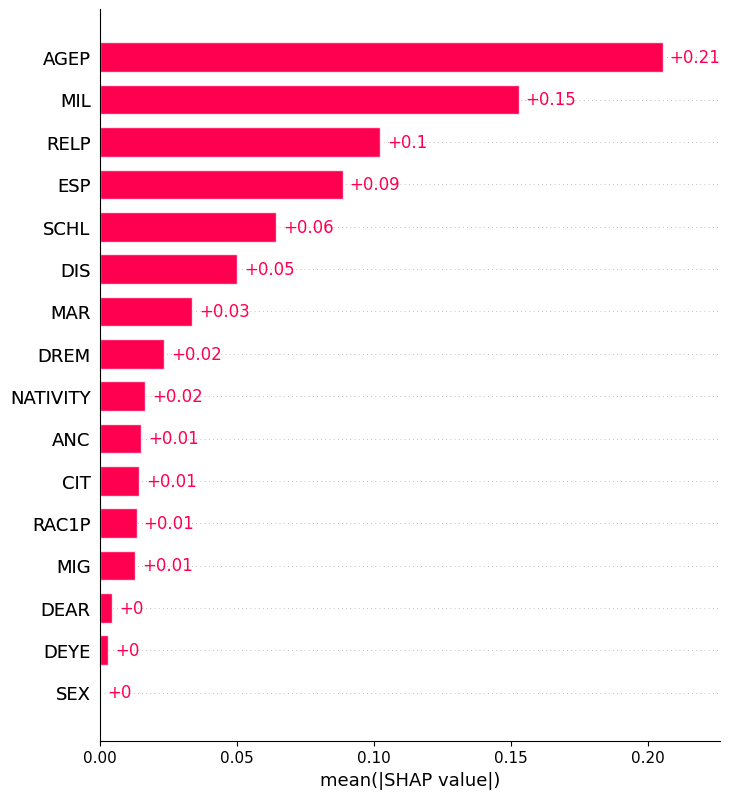

Permutation explainer: 501it [01:12,  5.97it/s]                                 


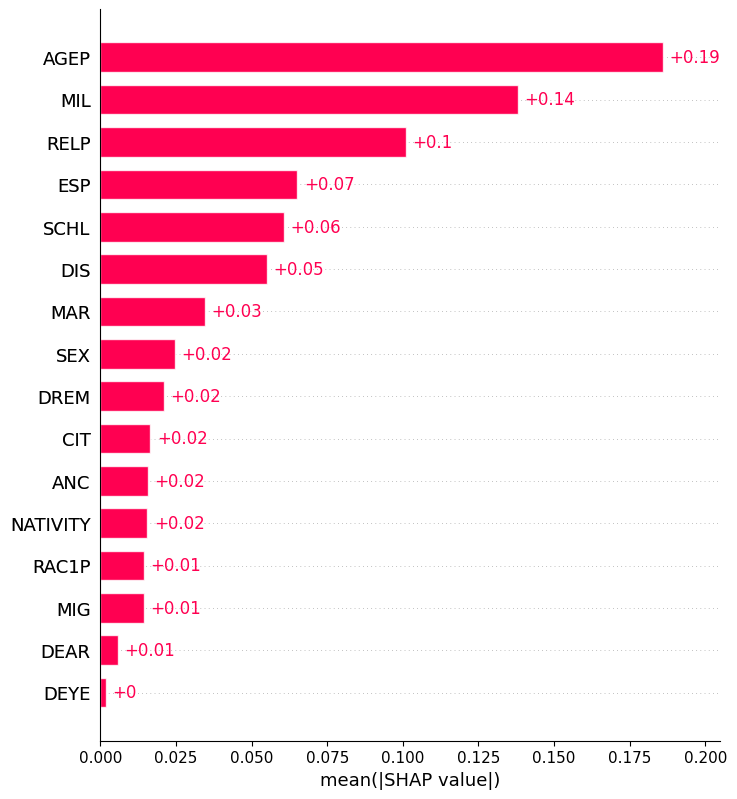

Permutation explainer: 501it [00:18, 12.36it/s]                                 


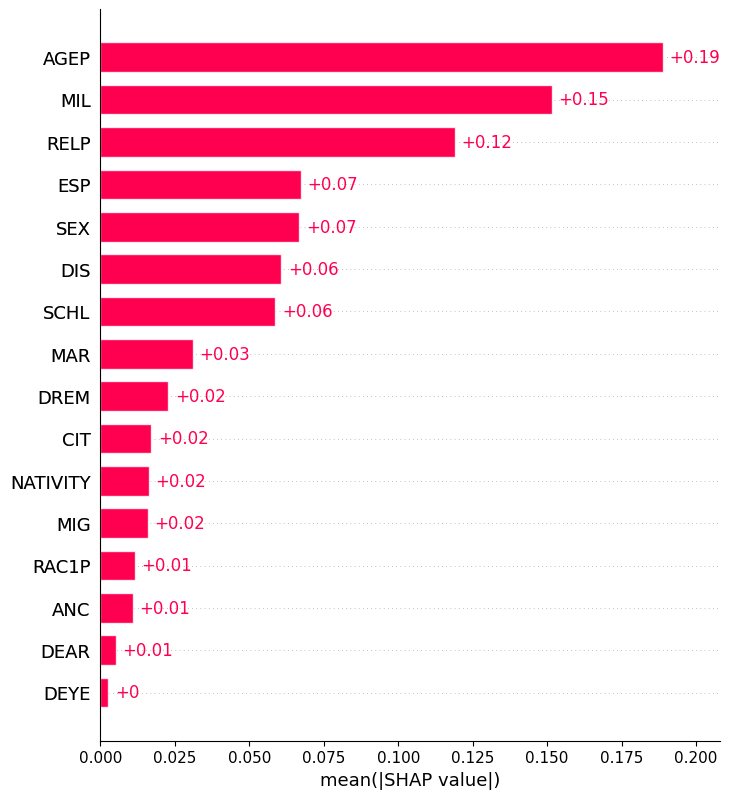

In [24]:
paths = {0:'data/datasets/employment_ca/',
         0.2:'data/datasets/employment_ca/synthetic/gender_flip_labels0.2_version0/',
         0.4:'data/datasets/employment_ca/synthetic/gender_flip_labels0.4_version0/',
         0.6:'data/datasets/employment_ca/synthetic/gender_flip_labels0.6_version0/',
         0.8:'data/datasets/employment_ca/synthetic/gender_flip_labels0.8_version0/'
        }

for frac in paths:
    path = paths[frac]
    
    gname = 'employment_ca'

    train_df = pd.read_csv(path+'train.csv',header=None)

    train_df.columns = ['AGEP', 'SCHL', 'MAR', 'RELP', 'DIS', 'ESP', 'CIT', 'MIG', 'MIL', 'ANC',
       'NATIVITY', 'DEAR', 'DEYE', 'DREM', 'SEX', 'RAC1P', 'ESR']


    train_df.index = train_df['SEX']

    train_df = train_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

    test_df = pd.read_csv(path+'test.csv',header=None)

    test_df.columns = ['AGEP', 'SCHL', 'MAR', 'RELP', 'DIS', 'ESP', 'CIT', 'MIG', 'MIL', 'ANC',
       'NATIVITY', 'DEAR', 'DEYE', 'DREM', 'SEX', 'RAC1P', 'ESR']


    test_df.index = test_df['SEX']

    test_df = test_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
    


    X_train = train_df.drop(['ESR'],axis=1)
    X_test = test_df.drop(['ESR'],axis=1)

    y_train = pd.Series(train_df['ESR'])
    y_test = pd.Series(test_df['ESR'])

    y_train = pd.Series(y_train.factorize(sort=True)[0], index=y_train.index)
    y_test = pd.Series(y_test.factorize(sort=True)[0], index=y_test.index)

    X_merged = pd.concat([X_train,X_test])

    ohe = make_column_transformer(
        (OneHotEncoder(sparse=False), X_merged.dtypes == 'object'),
        remainder='passthrough', verbose_feature_names_out=False)

    X_merged_temp  = pd.DataFrame(ohe.fit_transform(X_merged), columns=ohe.get_feature_names_out(), index=X_merged.index)

    X_train  = pd.DataFrame(ohe.transform(X_train), columns=ohe.get_feature_names_out(), index=X_train.index)
    X_test = pd.DataFrame(ohe.transform(X_test), columns=ohe.get_feature_names_out(), index=X_test.index)

    lr = LogisticRegression(solver='liblinear')
    lr.fit(X_train, y_train)
    
    name = gname+'_baseline_'+str(frac)
    dothings(X_test,lr,name)

    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    
    name = gname+'_randomforest_'+str(frac)
    dothings(X_test,rf,name)
    
    rew = ReweighingMeta(estimator=LogisticRegression(solver='liblinear'),
                     reweigher=Reweighing('SEX'))
    params = {'estimator__C': [1, 10]}

    clf = GridSearchCV(rew, params, scoring='accuracy', cv=5)
    clf.fit(X_train, y_train)
    
    name = gname+'_adv_rew_'+str(frac)
    dothings(X_test,clf,name)
    
    LFR = LearnedFairRepresentations(prot_attr='SEX')
    LFR.fit(X_train, y_train)
    
    name = gname+'_lfr_'+str(frac)
    dothings(X_test,LFR,name)
    
    adv_deb = AdversarialDebiasing(prot_attr='SEX')
    adv_deb.fit(X_train, y_train)
    
    name = gname+'_adv_deb_'+str(frac)
    dothings(X_test,adv_deb,name)
    
    EGR = ExponentiatedGradientReduction(prot_attr=['SEX_Female','SEX_Male'], estimator=LogisticRegression(solver='liblinear'), constraints = 'EqualizedOdds')
    EGR.fit(X_train, y_train)
    
    name = gname+'_egr_'+str(frac)
    dothings(X_test,EGR,name)
    
    GSR = GridSearchReduction(prot_attr=['SEX_Female','SEX_Male'], estimator=LogisticRegression(solver='liblinear'), constraints = 'EqualizedOdds')
    GSR.fit(X_train, y_train)
    
    name = gname+'_gsr_'+str(frac)
    dothings(X_test,GSR,name)
    
    X_train_temp = X_train.set_index(['SEX_Male'], drop = False)
    y_train_temp = y_train.copy()
    y_train_temp.index = X_train_temp.index

    X_test_temp = X_test.set_index(['SEX_Male'], drop = False)
    y_test_temp = y_test.copy()
    y_test_temp.index = X_test_temp.index
    
    cal_eq_odds = CalibratedEqualizedOdds(prot_attr='SEX_Male', cost_constraint='weighted')
    postproc = PostProcessingMeta(estimator=LogisticRegression(solver='liblinear'), postprocessor=cal_eq_odds)
    postproc.fit(X_train_temp, y_train_temp)
    
    name = gname+'_caleq_'+str(frac)
    dothings2(X_train_temp,postproc,name)
    
    rocv = PostProcessingMeta(LogisticRegression(solver='liblinear'), RejectOptionClassifierCV('SEX_Male', scoring='average_odds'))
    rocv.fit(X_train_temp, y_train_temp)
    
    name = gname+'_rocv_'+str(frac)
    dothings2(X_train_temp,rocv,name)



In [ ]:
# explainer = shap.LinearExplainer(lr, X_test)
# shap_values = explainer(X_test)
# clist = list(X_test.columns)
# features = {}
# for i in range(len(clist)):
#     fname = clist[i]
#     item = fname.split('_')[0]
#     if item not in features:
#         features[item]=[]
#     features[item].append(i)
# newshap = {}
# for k in features:
#     nshap = []
#     for x in shap_values.values:
#         val = 0
#         for i in features[k]:
#             val+= x[i]
#         nshap.append(val)
#     newshap[k] = nshap
# new_shap_values = list(zip(*newshap.values()))
# shap_values.values = np.array(new_shap_values)
# shap_values.feature_names = list(features.keys())
# shap.plots.bar(shap_values,max_display=18)

In [ ]:
# path = 'data/datasets/employment/'

# train_df = pd.read_csv(path+'train.csv',header=None)

# train_df.columns = ['AGEP', 'SCHL', 'MAR', 'RELP', 'DIS', 'ESP', 'CIT', 'MIG', 'MIL', 'ANC',
#    'NATIVITY', 'DEAR', 'DEYE', 'DREM', 'SEX', 'RAC1P', 'ESR']


# train_df.index = train_df['SEX']

# train_df = train_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# test_df = pd.read_csv(path+'test.csv',header=None)

# test_df.columns = ['AGEP', 'SCHL', 'MAR', 'RELP', 'DIS', 'ESP', 'CIT', 'MIG', 'MIL', 'ANC',
#    'NATIVITY', 'DEAR', 'DEYE', 'DREM', 'SEX', 'RAC1P', 'ESR']


# test_df.index = test_df['SEX']

# test_df = test_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)



# X_train = train_df.drop(['ESR'],axis=1)
# X_test = test_df.drop(['ESR'],axis=1)

# y_train = pd.Series(train_df['ESR'])
# y_test = pd.Series(test_df['ESR'])

# y_train = pd.Series(y_train.factorize(sort=True)[0], index=y_train.index)
# y_test = pd.Series(y_test.factorize(sort=True)[0], index=y_test.index)

# X_merged = pd.concat([X_train,X_test])

# ohe = make_column_transformer(
#     (OneHotEncoder(sparse=False), X_merged.dtypes == 'object'),
#     remainder='passthrough', verbose_feature_names_out=False)

# X_merged_temp  = pd.DataFrame(ohe.fit_transform(X_merged), columns=ohe.get_feature_names_out(), index=X_merged.index)

# X_train  = pd.DataFrame(ohe.transform(X_train), columns=ohe.get_feature_names_out(), index=X_train.index)
# X_test = pd.DataFrame(ohe.transform(X_test), columns=ohe.get_feature_names_out(), index=X_test.index)

# lr = LogisticRegression(solver='liblinear')
# lr.fit(X_train, y_train)

In [ ]:
# explainer = shap.LinearExplainer(lr, X_test)
# shap_values = explainer(X_test)
# clist = list(X_test.columns)
# features = {}
# for i in range(len(clist)):
#     fname = clist[i]
#     item = fname.split('_')[0]
#     if item not in features:
#         features[item]=[]
#     features[item].append(i)
# newshap = {}
# for k in features:
#     nshap = []
#     for x in shap_values.values:
#         val = 0
#         for i in features[k]:
#             val+= x[i]
#         nshap.append(val)
#     newshap[k] = nshap
# new_shap_values = list(zip(*newshap.values()))
# shap_values.values = np.array(new_shap_values)
# shap_values.feature_names = list(features.keys())
# shap.plots.bar(shap_values,max_display=18)

In [ ]:
# shap.plots.beeswarm(shap_values, order=shap_values.abs.max(0))

In [ ]:
# shap_values.base_values.shape

In [ ]:
# shap_values.data.shape

In [ ]:
# f = lambda x: knn.predict_proba(x)[:,1]
# med = X_train.median().values.reshape((1,X_train.shape[1]))